<a href="https://colab.research.google.com/github/paul821/ra/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Part 1
LTD - CURRENT STD TO ONE VAR

mean of all
within each group, take 45-55%tile and then use that sample to get mean of total and then percentage

clean up
is method effective?
create function for mean % of total debt for class 1 2 3
create groups and do the function thing
combine to create big af pie chart
and waterfall chart

##basic import

In [ ]:
#import
#remove unnecessary rows
df = pd.read_excel('sort24.xlsx', header=4)
df = df.iloc[1:]
df.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                    NaN                   NaN                      NaN   
2               57.50000               229.793                     57.5   
3                    NaN                   NaN                      NaN   
4               24.01861                   NaN                      NaN   
5                    NaN                   NaN                      NaN   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    NaN                      NaN                     NaN   
2                    NaN                232.50000                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                 38.20997                     NaN   
5                    NaN                      NaN                     NaN   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1               NaN             NaN  ...               NaN            NaN   
2            -2.707             NaN  ...               NaN            NaN   
3               NaN             NaN  ...               NaN            NaN   
4               NaN             NaN  ...               NaN            NaN   
5               NaN             NaN  ...               NaN            NaN   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     NaN                       NaN               NaN   
2                     NaN                      45.0             187.5   
3                     NaN                       NaN               NaN   
4                     NaN                       NaN               NaN   
5                     NaN                       NaN               NaN   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                NaN         NaN      0.021037                 NaN   
2                NaN   229.79300   1034.624000           508.00370   
3                NaN         NaN    937.794000          2733.08300   
4                NaN    24.01861    431.818500            64.65463   
5                NaN         NaN           NaN                 NaN   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
#Take care of null values

df.fillna(0, inplace=True)

df.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                0.00000                 0.000                      0.0   
2               57.50000               229.793                     57.5   
3                0.00000                 0.000                      0.0   
4               24.01861                 0.000                      0.0   
5                0.00000                 0.000                      0.0   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    0.0                  0.00000                     0.0   
2                    0.0                232.50000                     0.0   
3                    0.0                  0.00000                     0.0   
4                    0.0                 38.20997                     0.0   
5                    0.0                  0.00000                     0.0   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1             0.000             0.0  ...               0.0            0.0   
2            -2.707             0.0  ...               0.0            0.0   
3             0.000             0.0  ...               0.0            0.0   
4             0.000             0.0  ...               0.0            0.0   
5             0.000             0.0  ...               0.0            0.0   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     0.0                       0.0               0.0   
2                     0.0                      45.0             187.5   
3                     0.0                       0.0               0.0   
4                     0.0                       0.0               0.0   
5                     0.0                       0.0               0.0   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                0.0     0.00000      0.021037             0.00000   
2                0.0   229.79300   1034.624000           508.00370   
3                0.0     0.00000    937.794000          2733.08300   
4                0.0    24.01861    431.818500            64.65463   
5                0.0     0.00000      0.000000             0.00000   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
#Drop unnecessary columns

df = df.drop('Name', axis=1)
print(df.columns)

Index(['Symbol', 'Total Short Term Debt', 'Total Long Term Debt',
       'Current Short Term Debt', 'Total Fixed Rate Debt',
       'Total Variabl Rate Debt', 'Total Zero Coupon Debt', 'Total Other Debt',
       'Short Term Adj', 'Current Portion LT Debt', 'Unsec Short Term Revolv',
       'Other Unsec Borrow', 'Unsec Comm Paper', 'Notes Payable',
       'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
       'Total Term Loans', 'Total Notes Bonds', 'Total Debt', 'Total Assets',
       'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


In [ ]:
df['LTD sans current STD'] = df['Total Long Term Debt'] - df['Current Short Term Debt']
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('LTD sans current STD')))
df = df[cols]
df = df.drop(['Total Long Term Debt', 'Current Short Term Debt'], axis=1)

In [ ]:
df['Short term and other'] = df['Short Term Adj'] + df['Current Portion LT Debt'] + df['Other Unsec Borrow']
df['Revolving'] = df['Unsec Short Term Revolv'] + df['ST Borrow LTSec Revolv'] + df['Total Revolv- ing Credit']
df['Notes and paper'] = df['Unsec Comm Paper'] + df['Notes Payable'] + df['Total Notes Bonds']

df = df.drop(['Short Term Adj', 'Current Portion LT Debt', 'Other Unsec Borrow',
              'Unsec Short Term Revolv', 'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
              'Unsec Comm Paper', 'Notes Payable', 'Total Notes Bonds'], axis=1)

cols = list(df.columns)
cols.insert(7, cols.pop(cols.index('Short term and other')))
cols.insert(8, cols.pop(cols.index('Revolving')))
cols.insert(9, cols.pop(cols.index('Notes and paper')))
df = df[cols]
print(df.columns)

Index(['Symbol', 'Total Short Term Debt', 'LTD sans current STD',
       'Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt', 'Short term and other',
       'Revolving', 'Notes and paper', 'Total Term Loans', 'Total Debt',
       'Total Assets', 'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


## Three classifications

In [ ]:
#three classification mechanisms

#short term long term current std
class_1 = df.columns[1:3]
group1 = df[class_1]

#fixed variable zero other
class_2 = df.columns[3:7]
group2 = df[class_2]

#more granular ones
class_3 = df.columns[7:11]
group3 = df[class_3]



#### How accurate are these classifications?

In [ ]:
#copy to keep original data
df_copy = df.copy()

df_copy['Group1_Sum'] = df_copy[class_1].sum(axis=1)
df_copy['Group1_Diff'] = df_copy['Total Debt'] - df_copy['Group1_Sum']
diff_1 = df_copy['Group1_Diff'].describe()

diff_1

count     9821.000000
mean         4.334568
std        391.101017
min         -0.007000
25%          0.000000
50%          0.000000
75%          0.000000
max      38551.000000
Name: Group1_Diff, dtype: float64

In [ ]:
#same for class 2

df_copy['Group2_Sum'] = df_copy[class_2].sum(axis=1)
df_copy['Group2_Diff'] = df_copy['Total Debt'] - df_copy['Group2_Sum']
diff_2 = df_copy['Group2_Diff'].describe()

diff_2

count    9.821000e+03
mean    -2.261161e+02
std      4.197908e+04
min     -4.096347e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.954430e+05
Name: Group2_Diff, dtype: float64

In [ ]:
df_copy['Group3_Sum'] = df_copy[class_3].sum(axis=1)
df_copy['Group3_Diff'] = df_copy['Total Debt'] - df_copy['Group3_Sum']
diff_3 = df_copy['Group3_Diff'].describe()

diff_3

count      9821.000000
mean        142.065732
std        8733.176059
min     -112147.500000
25%           0.000000
50%           0.000000
75%           0.000000
max      507286.000000
Name: Group3_Diff, dtype: float64

In [ ]:
# get the rows where the above differences are greater than a certain % of the total debt

threshold_percentage = 0.01  # 1% threshold

def extract_rows_above_threshold(df, difference_column, total_debt_column, symbol_column):
    df['Threshold'] = df[total_debt_column] * threshold_percentage
    filtered_df = df[abs(df[difference_column]) > df['Threshold']]
    return filtered_df[[symbol_column, total_debt_column, difference_column]].copy()

filtered_1 = extract_rows_above_threshold(df_copy, 'Group1_Diff', 'Total Debt', 'Symbol')
filtered_2 = extract_rows_above_threshold(df_copy, 'Group2_Diff', 'Total Debt', 'Symbol')
filtered_3 = extract_rows_above_threshold(df_copy, 'Group3_Diff', 'Total Debt', 'Symbol')

print("Filtered DataFrame (Comparison 1):")
print(filtered_1)

print("\nFiltered DataFrame (Comparison 2):")
print(filtered_2)

print("\nFiltered DataFrame (Comparison 3):")
print(filtered_3)

Filtered DataFrame (Comparison 1):
     Symbol  Total Debt  Group1_Diff
3163    XOM   42550.000     4009.000
3860     GS  672863.000    38551.000
7738   SCSC     143.649        9.736

Filtered DataFrame (Comparison 2):
     Symbol   Total Debt  Group2_Diff
4        YI    24.018610   -14.191360
19     SRCE   263.661000   -32.785000
41     RNWR     1.031825    -1.000000
52     AMRK   347.688000    10.688000
53      AOS   119.700000  -134.900000
...     ...          ...          ...
9758   ZEOX     0.674000    -0.725000
9760   ZEPP   111.866500    -9.587400
9761   ZRFY     5.662000    -3.543513
9774  ZHYBF     1.599640    -0.082646
9786   ZION  3467.000000  2019.000000

[854 rows x 3 columns]

Filtered DataFrame (Comparison 3):
     Symbol  Total Debt  Group3_Diff
2      FLWS   229.79300    -60.20700
4        YI    24.01861    -21.31783
14     BCOW    75.79200     -5.49700
19     SRCE   263.66100    155.43600
28      DDD   211.68200     -2.69600
...     ...         ...          ...
9796  

mean of all within each group, take 45-55%tile and then use that sample to get mean of total and then percentage

#### Total Debt visualization for all rows

Summary Statistics for Total Debt:
count    9.821000e+03
mean     2.259296e+03
std      5.634748e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.423200e+01
max      4.217778e+06
Name: Total Debt, dtype: float64

Mean of Total Debt within 45th-55th Percentile: 0.0


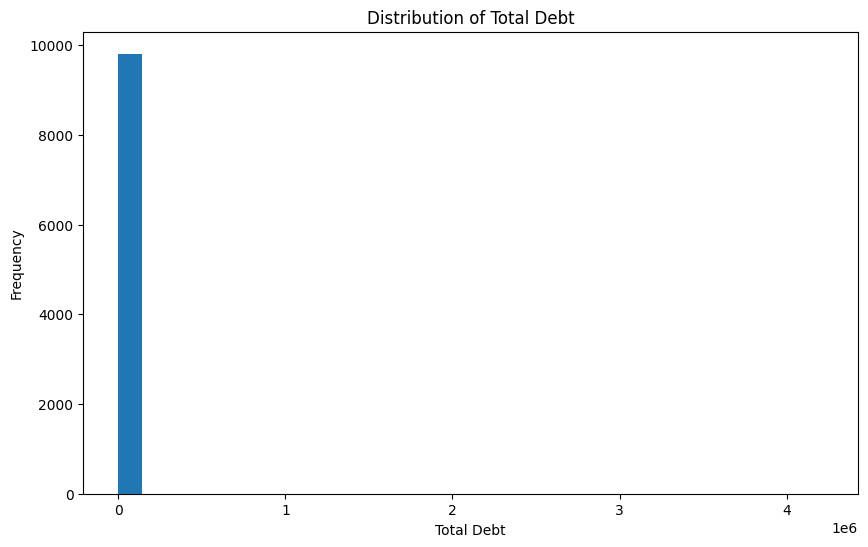

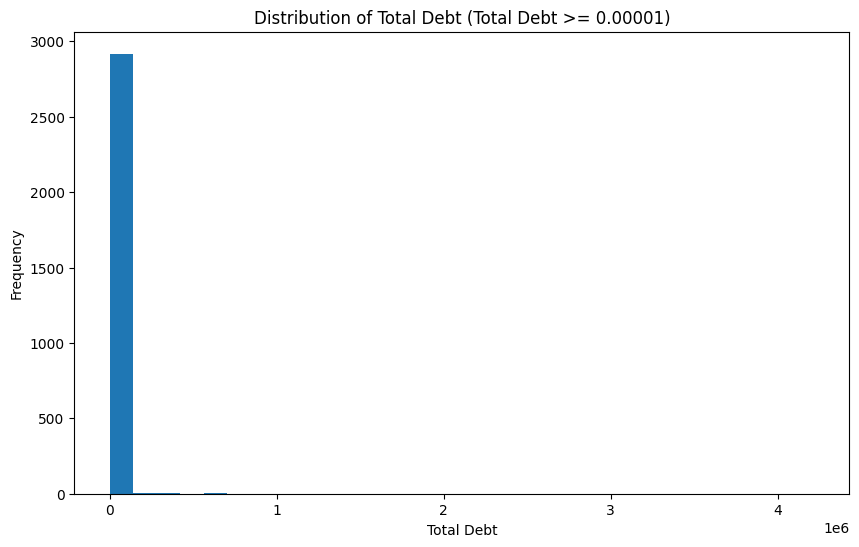

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics for 'Total Debt'
total_debt_stats = df['Total Debt'].describe()
print("Summary Statistics for Total Debt:")
print(total_debt_stats)

# Calculate the mean of total debt within the 45th to 55th percentile
lower_percentile = df['Total Debt'].quantile(0.45)
upper_percentile = df['Total Debt'].quantile(0.55)
filtered_df = df[(df['Total Debt'] >= lower_percentile) & (df['Total Debt'] <= upper_percentile)]
mean_total_debt_within_percentile = filtered_df['Total Debt'].mean()
print("\nMean of Total Debt within 45th-55th Percentile:", mean_total_debt_within_percentile)

# Graph a distribution of Total Debt
plt.figure(figsize=(10, 6))
plt.hist(df['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt')
plt.show()

# Graph another where Total Debt >= 0.00001
plt.figure(figsize=(10, 6))
plt.hist(df[df['Total Debt'] >= 0.00001]['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt (Total Debt >= 0.00001)')
plt.show()

In [ ]:
def get_percentile_stats(df, column_name, total_debt_column, low = 0, high = 1):
  lower_bound = df[total_debt_column].quantile(low)
  upper_bound = df[total_debt_column].quantile(high)

  filtered_df = df.loc[(df[total_debt_column] >= lower_bound) & (df[total_debt_column] <= upper_bound)]


  filtered_df = filtered_df.copy()
  filtered_df.loc[:, 'Percentage'] = (filtered_df[column_name] / filtered_df[total_debt_column]) * 100

  summary_stats = filtered_df['Percentage'].describe()
  mean_percentage = filtered_df['Percentage'].mean()
  median_percentage = filtered_df['Percentage'].median()
  results = {
      'Summary Statistics': summary_stats,
      'Mean': mean_percentage,
      'Median': median_percentage
  }
  return results

Since total debt is very close to 0 for almost all the rows, getting a whole sample statistic is meaningless

In [ ]:
import matplotlib.pyplot as plt
means = []
summary_1 = []

iszero = False
df_nonzero = df[df['Total Debt'] >= 0.01]

for column in group1.columns:
  results = get_percentile_stats(df, column, 'Total Debt', 0.45, 0.55)
  if results['Mean'] < 0.001:
    iszero = True
    break

if iszero:
  for column in group1.columns:
    results = get_percentile_stats(df_nonzero, column, 'Total Debt', 0.45, 0.55)
    means.append(results['Mean'])
    summary_1.append(results['Summary Statistics'])
else:
  for column in group1.columns:
    results = get_percentile_stats(df, column, 'Total Debt', 0.45, 0.55)
    means.append(results['Mean'])
    summary_1.append(results['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means, labels=group1.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 1')
plt.show()



ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>

In [ ]:
#summary stats
print("Summary Statistics for Class 1:")
summary_table1 = pd.DataFrame(summary_1, index=group1.columns)
summary_table1

In [ ]:
means_2 = []
summary_2 = []

iszero_2 = False

for column in group2.columns:
  results_2 = get_percentile_stats(df, column, 'Total Debt', 0.45, 0.55)
  if results_2['Mean'] < 0.01:
    iszero_2 = True
    break

if iszero_2:
  for column in group2.columns:
    results_2 = get_percentile_stats(df_nonzero, column, 'Total Debt', 0.45, 0.55)
    means_2.append(results_2['Mean'])
    summary_2.append(results_2['Summary Statistics'])
else:
  for column in group2.columns:
    results_2 = get_percentile_stats(df, column, 'Total Debt', 0.45, 0.55)
    means_2.append(results_2['Mean'])
    summary_2.append(results_2['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means_2, labels=group2.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 2')
plt.show()

In [ ]:

#summary stats
print("Summary Statistics for Class 2:")
summary_table2 = pd.DataFrame(summary_2, index=group2.columns)
summary_table2


In [ ]:
means_3 = []
summary_3 = []

iszero_3 = False

for column in group3.columns:
  results_3 = get_percentile_stats(df, column, 'Total Debt')
  if results_3['Mean'] < 0.01:
    iszero_3 = True

if iszero_3:
  for column in group3.columns:
    results_3 = get_percentile_stats(df_nonzero, column, 'Total Debt')
    means_3.append(results_3['Mean'])
    summary_3.append(results_3['Summary Statistics'])
else:
  for column in group3.columns:
    results_3 = get_percentile_stats(df, column, 'Total Debt')
    means_3.append(results_3['Mean'])
    summary_3.append(results_3['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means_3, labels=group3.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 3')
plt.show()



In [ ]:
#summary stats
print("Summary Statistics for Class 3:")
summary_table3 = pd.DataFrame(summary_3, index=group3.columns)
summary_table3

Note that since some values are negative, it can't be made into a pie chart relative to the total debt. So some accommodation should be made. for now, we use either mean or median depending on positive or negative values.

#### Total debt visualization using groups

In [ ]:
def divide_into_groups(df, sort_column, n_groups):
  """Divides the DataFrame into groups with equal row counts after sorting."""

  # 1. Sort the DataFrame by the specified column
  df_sorted = df.sort_values(by=sort_column)

  # 2. Divide the sorted DataFrame into groups
  groups = np.array_split(df_sorted, n_groups)

  return groups

In [ ]:
# prompt: a = divide_into_groups(df, 'Total Assets', 3)
# a
# for each group in a, display row count, and display total row count for df

a = divide_into_groups(df, 'Total Assets', 3)

for i, group in enumerate(a):
  print(f"Group {i + 1}:")
  print(f"  Row Count: {len(group)}")
  print(f"  Total Row Count (df): {len(df)}")
  print("---")

Group 1:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 2:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 3:
  Row Count: 3273
  Total Row Count (df): 9821
---


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# prompt: the analyze function but stacked bar chart instead of pie chart

def analyze(df, group_columns, asset_column, n_groups):
  all_means = []

  groups = divide_into_groups(df, asset_column, n_groups)

  for i, group_df in enumerate(groups):
    print(f"\nFor Group {i + 1}")
    means = []
    summary_statistics = []
    try:
      for column in group_columns:
        results = get_percentile_stats(group_df, column, 'Total Debt', 0.45, 0.55)
        means.append(results['Mean'])
        summary_statistics.append(results['Summary Statistics'])

      summary_table = pd.DataFrame(summary_statistics, index=group_columns)

      mean_modified = False

      total_mean = sum(means)

      print(f"Initial Means: {means}")
      print(f"Total Mean: {total_mean}")
      if total_mean != 100:
        difference = 100 - total_mean
        print(f"Difference to be added: {difference}")
        for j, column in enumerate(group_columns):
          if column in ['Short term and other', 'Total Other Debt']:
            print(f"Before modification - Means for {column}: {means[j]}")
            means[j] += difference
            print(f"After modification - Means for {column}: {means[j]}")
            mean_modified = True
            break

      total_mean = sum(means)
      print(f"Total Mean after adjustments: {total_mean}")
      if total_mean != 100 or any(mean < 0 for mean in means):
        print(f"Means before setting negatives to 0: {means}")
        means = [0 if mean < 0 else mean for mean in means]
        print(f"Means after setting negatives to 0: {means}")
        total_mean = sum(means)
        means = [mean / total_mean * 100 for mean in means]
        print(f"Normalized Means: {means}")
        mean_modified = True

      if mean_modified:
        modified_means_table = pd.DataFrame({'Modified Means': means}, index=group_columns)

      all_means.append(means if not mean_modified else means)

      plt.figure(figsize=(10, 6))
      bottom = np.zeros(1)
      plt.axhline(0, color='black', linewidth=1, linestyle='--')
      for j, mean in enumerate(means):
        plt.bar(0, mean, bottom=bottom, label=group_columns[j])
        bottom += mean
      plt.ylabel('Mean Percentage of Total Debt')
      if group_df[asset_column].max() == df[asset_column].max():
        plt.title(f'Mean Percentage of Total Debt for Biggest Group')
      else:
        plt.title(f'Mean Percentage of Total Debt for Group {i+1}')
      plt.legend()
      plt.show()

      # table
      print(f"Summary Statistics for {group_columns} - Group {i+1}:")

      print(summary_table)
      print(f"\nSum of the means: {sum(means)}")
      if mean_modified:
        print(modified_means_table)

    except Exception as e:
      print(f"Error analyzing Group {i+1}: {e}")
      print(f"Summary Statistics for Group {i+1}:")
      summary_table = pd.DataFrame(summary_statistics, index=group_columns)
      print(summary_table)
      print("Skipping this group and continuing with the next...")

  combined_means = pd.DataFrame(all_means, columns=group_columns)
  combined_means.index = range(1, len(combined_means) + 1)
  combined_means.index.name = 'Group'
  return combined_means


For Group 1
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


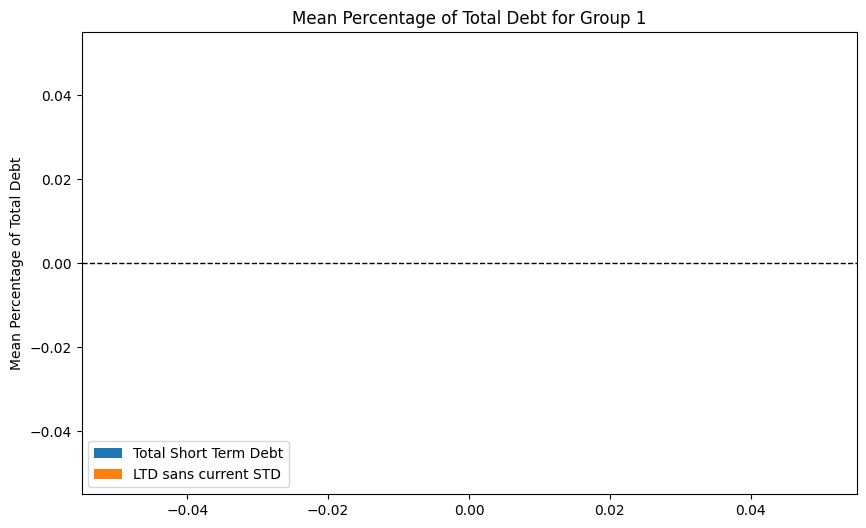

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 2
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


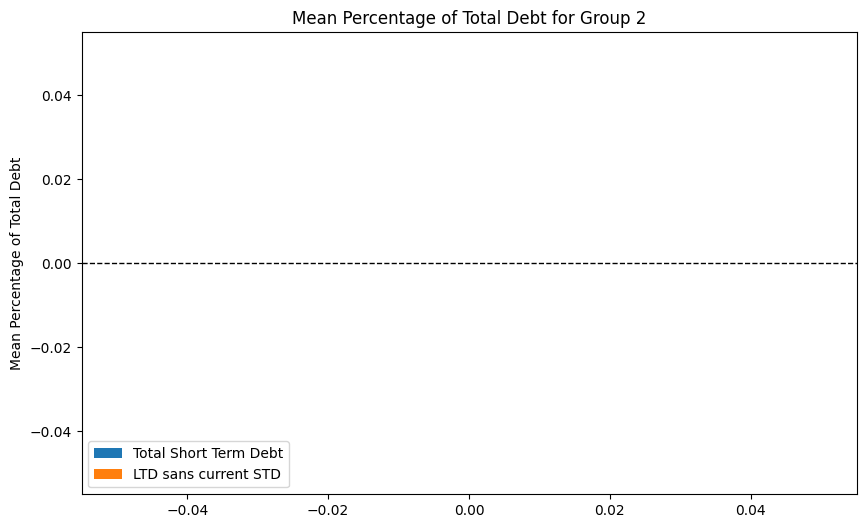

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 3
Initial Means: [14.50552797500357, 85.49447203344572]
Total Mean: 100.00000000844929
Difference to be added: -8.449291044598795e-09
Total Mean after adjustments: 100.00000000844929
Means before setting negatives to 0: [14.50552797500357, 85.49447203344572]
Means after setting negatives to 0: [14.50552797500357, 85.49447203344572]
Normalized Means: [14.505527973777957, 85.49447202622204]


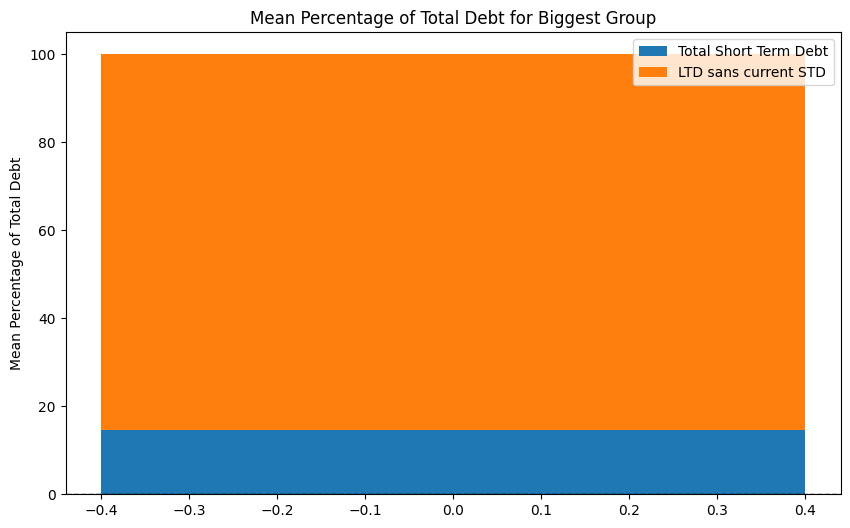

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count       mean       std  min        25%        50%  \
Total Short Term Debt  327.0  14.505528  26.00338  0.0   0.000000   1.925289   
LTD sans current STD   327.0  85.494472  26.00338  0.0  86.482151  98.074711   

                              75%    max  
Total Short Term Debt   13.517849  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt       14.505528
LTD sans current STD        85.494472


Total Short Term Debt  LTD sans current STD
Group                                             
1                        NaN                   NaN
2                        NaN                   NaN
3                  14.505528             85.494472

In [ ]:
#now we do it
analyze(df, class_1, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Total Other Debt: nan
After modification - Means for Total Other Debt: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan, nan, nan]
Means after setting negatives to 0: [nan, nan, nan, nan]
Normalized Means: [nan, nan, nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


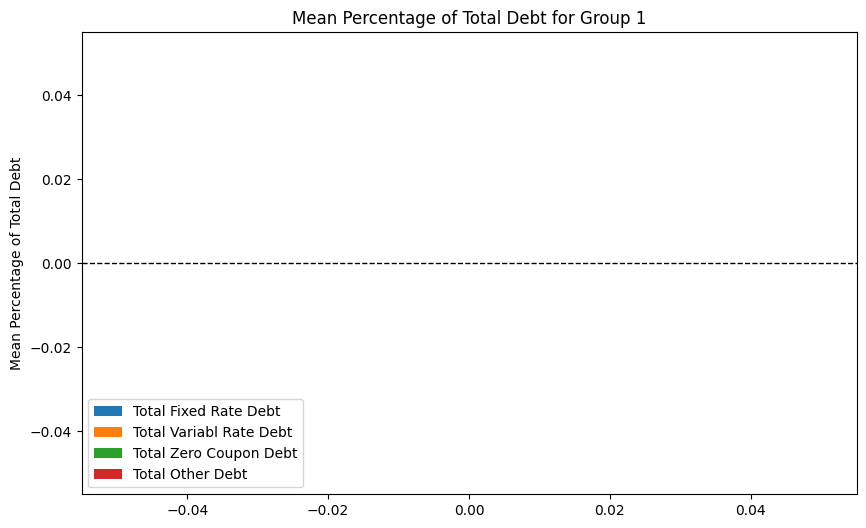

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 1:
                         count  mean  std  min  25%  50%  75%  max
Total Fixed Rate Debt      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Variabl Rate Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Zero Coupon Debt     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Other Debt           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                         Modified Means
Total Fixed Rate Debt               NaN
Total Variabl Rate Debt             NaN
Total Zero Coupon Debt              NaN
Total Other Debt                    NaN

For Group 2
Initial Means: [nan, inf, nan, -inf]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Total Other Debt: -inf
After modification - Means for Total Other Debt: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


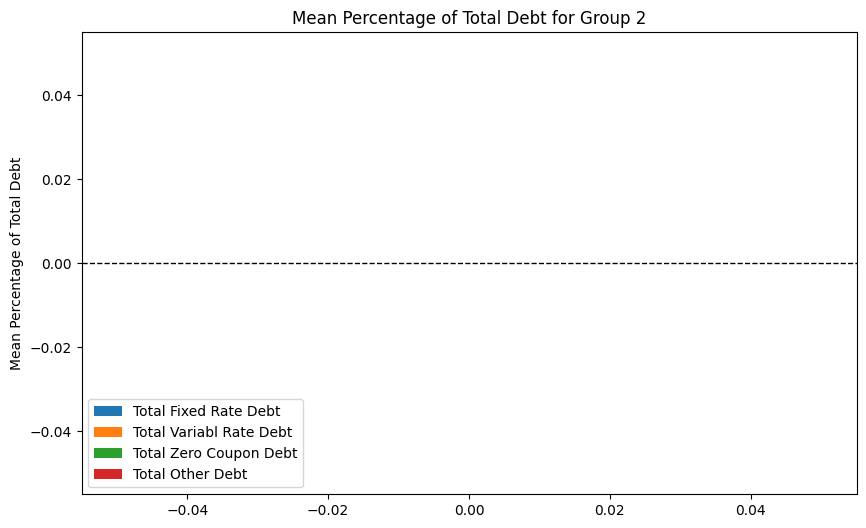

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 2:
                         count  mean  std  min  25%  50%  75%  max
Total Fixed Rate Debt      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Variabl Rate Debt    1.0   inf  NaN  inf  NaN  NaN  NaN  inf
Total Zero Coupon Debt     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Other Debt           1.0  -inf  NaN -inf  NaN  NaN  NaN -inf

Sum of the means: nan
                         Modified Means
Total Fixed Rate Debt               NaN
Total Variabl Rate Debt             NaN
Total Zero Coupon Debt              NaN
Total Other Debt                    NaN

For Group 3
Initial Means: [45.05519231941136, 52.17283114393816, 0.7097553773911205, -0.311296501039611]
Total Mean: 97.62648233970104
Difference to be added: 2.3735176602989583
Before modification - Means for Total Other Debt: -0.311296501039611
After modification - Mea

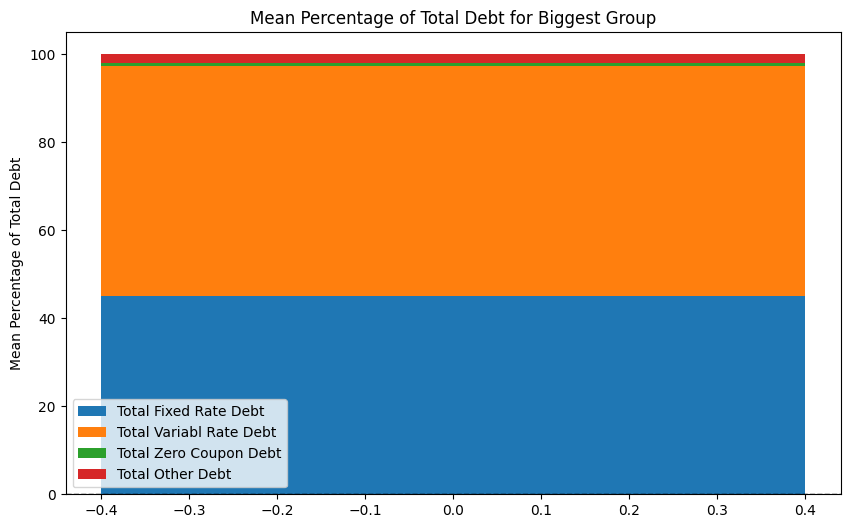

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 3:
                         count       mean        std        min       25%  \
Total Fixed Rate Debt    327.0  45.055192  43.676001   0.000000  0.000000   
Total Variabl Rate Debt  327.0  52.172831  43.844486   0.000000  0.508811   
Total Zero Coupon Debt   327.0   0.709755   7.361439   0.000000  0.000000   
Total Other Debt         327.0  -0.311297   7.349476 -50.914363 -1.682408   

                               50%         75%         max  
Total Fixed Rate Debt    34.222591   95.687997  127.121384  
Total Variabl Rate Debt  55.666971  100.000000  136.939933  
Total Zero Coupon Debt    0.000000    0.000000   99.172534  
Total Other Debt         -0.663546    0.000000   43.869210  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         45.055192
Total Variabl Rate Debt       52.17

Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
Group                                                                           
1                        NaN                      NaN                     NaN   
2                        NaN                      NaN                     NaN   
3                  45.055192                52.172831                0.709755   

       Total Other Debt  
Group                    
1                   NaN  
2                   NaN  
3              2.062221

In [ ]:
analyze(df, class_2, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Short term and other: nan
After modification - Means for Short term and other: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan, nan, nan]
Means after setting negatives to 0: [nan, nan, nan, nan]
Normalized Means: [nan, nan, nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


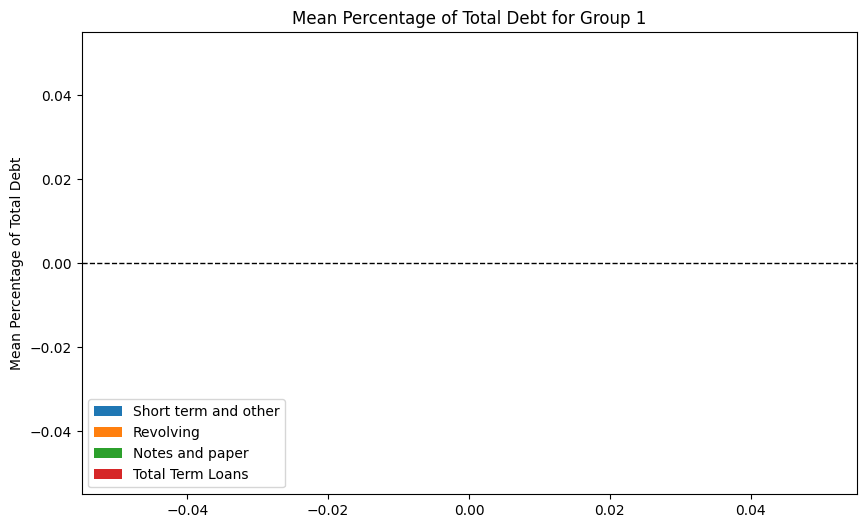

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 1:
                      count  mean  std  min  25%  50%  75%  max
Short term and other    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Revolving               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Notes and paper         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Term Loans        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                      Modified Means
Short term and other             NaN
Revolving                        NaN
Notes and paper                  NaN
Total Term Loans                 NaN

For Group 2
Initial Means: [nan, inf, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Short term and other: nan
After modification - Means for Short term and other: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, inf, nan, nan]
Means after setting negat

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


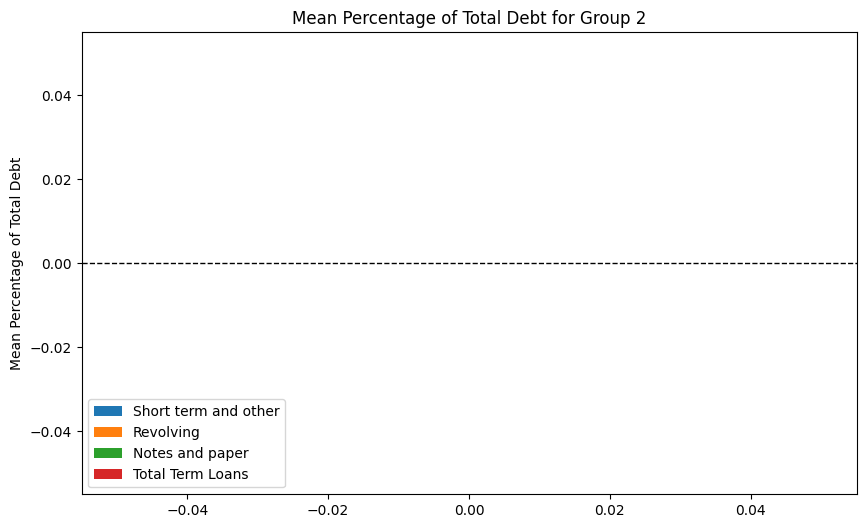

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 2:
                      count  mean  std  min  25%  50%  75%  max
Short term and other    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Revolving               1.0   inf  NaN  inf  NaN  NaN  NaN  inf
Notes and paper         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Term Loans        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                      Modified Means
Short term and other             NaN
Revolving                        NaN
Notes and paper                  NaN
Total Term Loans                 NaN

For Group 3
Initial Means: [5.975712906997003, 12.612770904574546, 40.588292502695445, 40.66181260821245]
Total Mean: 99.83858892247945
Difference to be added: 0.1614110775205546
Before modification - Means for Short term and other: 5.975712906997003
After modification - Means for Short term and other: 6.137123984517558
To

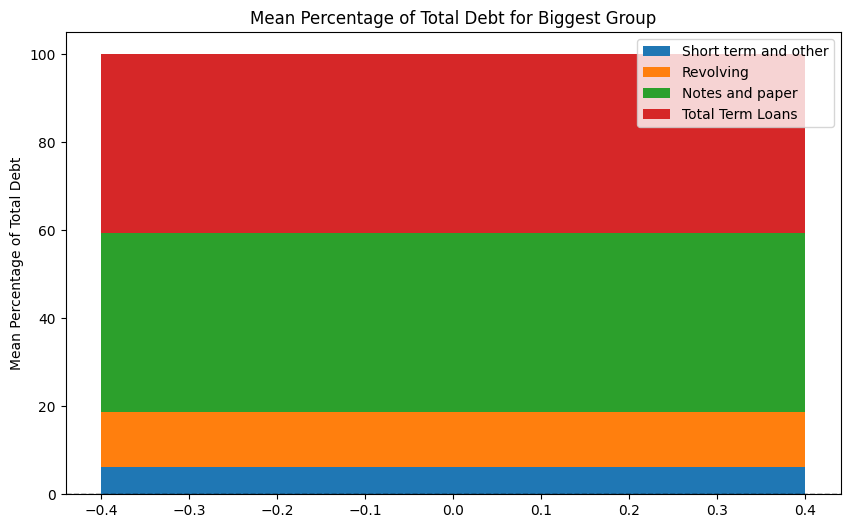

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 3:
                      count       mean        std      min  25%        50%  \
Short term and other  327.0   5.975713  15.804292 -0.04237  0.0   0.232321   
Revolving             327.0  12.612771  26.299622  0.00000  0.0   0.000000   
Notes and paper       327.0  40.588293  43.502685  0.00000  0.0  20.569250   
Total Term Loans      327.0  40.661813  42.142766  0.00000  0.0  24.240603   

                            75%         max  
Short term and other   3.654618  100.000000  
Revolving             10.486595  101.345361  
Notes and paper       92.307890  127.121384  
Total Term Loans      84.730905  136.939933  

Sum of the means: 100.0
                      Modified Means
Short term and other        6.137124
Revolving                  12.612771
Notes and paper            40.588293
Total Term Loans           40.661813


Short term and other  Revolving  Notes and paper  Total Term Loans
Group                                                                    
1                       NaN        NaN              NaN               NaN
2                       NaN        NaN              NaN               NaN
3                  6.137124  12.612771        40.588293         40.661813

In [ ]:
analyze(df, class_3, 'Total Assets', 3)

#### Total debt visualization using groups - NONZERO DEBT

There are just way too many companies with zero (or close to zero) debt.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



For Group 1
Initial Means: [33.60615261164109, 66.3938476416767]
Total Mean: 100.0000002533178
Difference to be added: -2.533177934083142e-07
Total Mean after adjustments: 100.0000002533178
Means before setting negatives to 0: [33.60615261164109, 66.3938476416767]
Means after setting negatives to 0: [33.60615261164109, 66.3938476416767]
Normalized Means: [33.606152526510726, 66.39384747348927]


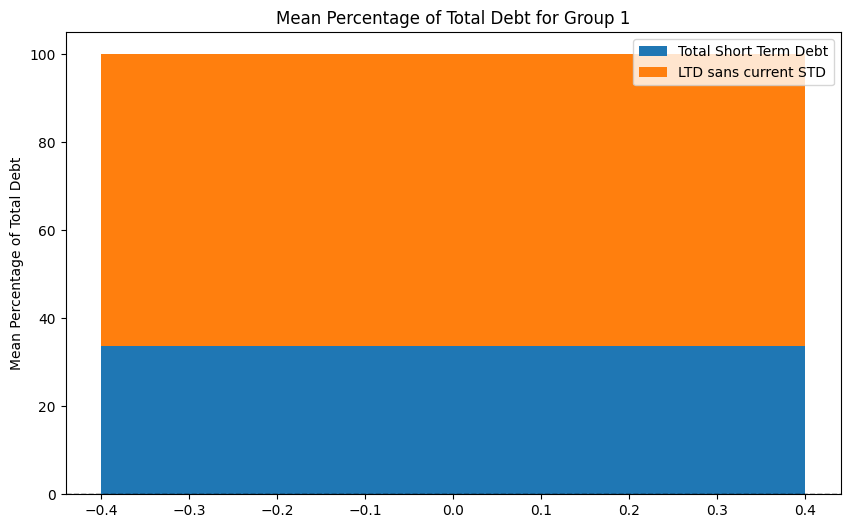

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count       mean        std  min        25%        50%  \
Total Short Term Debt   98.0  33.606153  39.462698  0.0   0.000000  13.286728   
LTD sans current STD    98.0  66.393848  39.462698  0.0  25.638446  86.713272   

                              75%    max  
Total Short Term Debt   74.361561  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt       33.606153
LTD sans current STD        66.393847

For Group 2
Initial Means: [10.493408277432057, 89.50659172256795]
Total Mean: 100.0
Total Mean after adjustments: 100.0


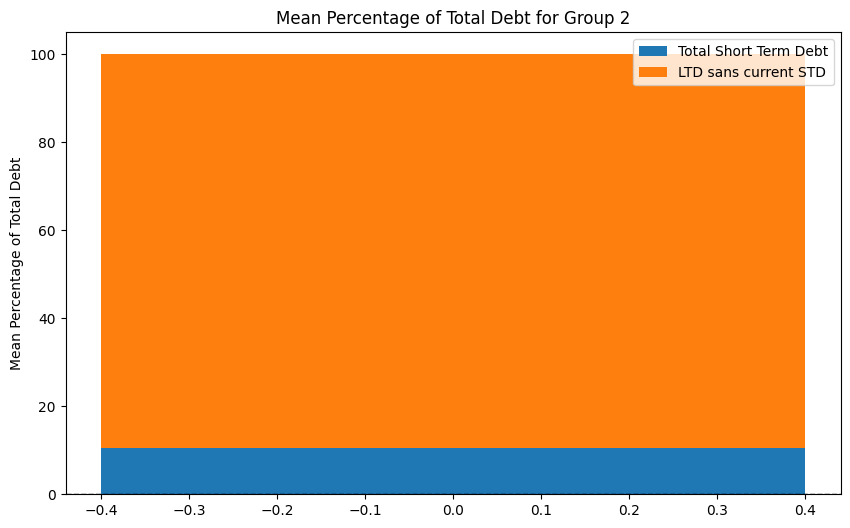

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count       mean       std  min       25%        50%  \
Total Short Term Debt   98.0  10.493408  21.89787  0.0   0.00000   1.649337   
LTD sans current STD    98.0  89.506592  21.89787  0.0  91.59223  98.350663   

                             75%    max  
Total Short Term Debt    8.40777  100.0  
LTD sans current STD   100.00000  100.0  

Sum of the means: 100.0

For Group 3
Initial Means: [14.945615284933607, 85.05438471506639]
Total Mean: 100.0
Total Mean after adjustments: 100.0


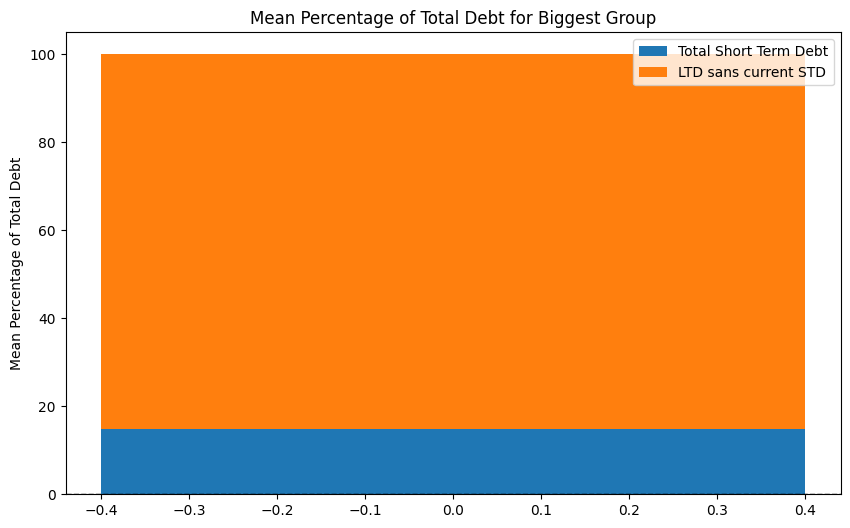

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count       mean        std  min        25%      50%  \
Total Short Term Debt   98.0  14.945615  25.921567  0.0   0.000000   2.5782   
LTD sans current STD    98.0  85.054385  25.921567  0.0  82.543492  97.4218   

                              75%    max  
Total Short Term Debt   17.456508  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.0


In [ ]:
a1 = analyze(df_nonzero, class_1, 'Total Assets', 3)

In [ ]:
a1

Total Short Term Debt  LTD sans current STD
Group                                             
1                  33.606153             66.393847
2                  10.493408             89.506592
3                  14.945615             85.054385


For Group 1
Initial Means: [30.348046453357526, 56.81873787189257, 0.1794661930212003, 7.659878887393774]
Total Mean: 95.00612940566506
Difference to be added: 4.993870594334936
Before modification - Means for Total Other Debt: 7.659878887393774
After modification - Means for Total Other Debt: 12.65374948172871
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


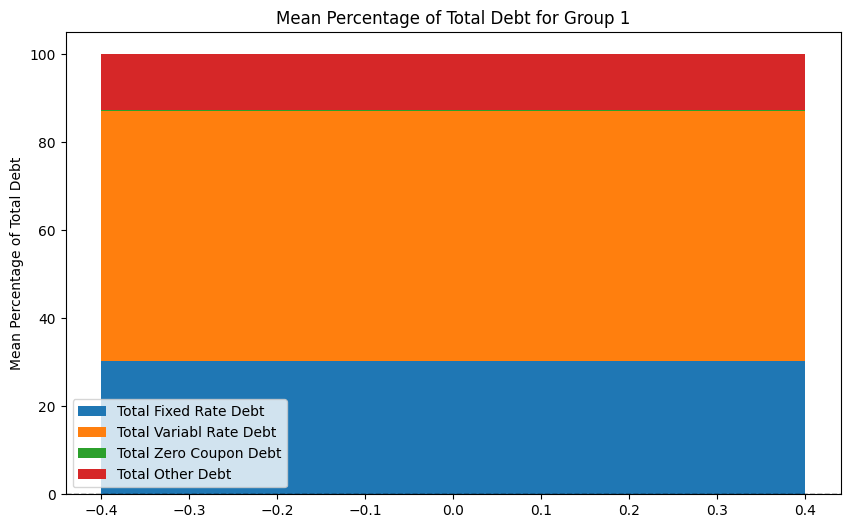

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 1:
                         count       mean        std        min       25%  \
Total Fixed Rate Debt     98.0  30.348046  42.137944   0.000000  0.000000   
Total Variabl Rate Debt   98.0  56.818738  44.577311   0.000000  0.000000   
Total Zero Coupon Debt    98.0   0.179466   1.088955   0.000000  0.000000   
Total Other Debt          98.0   7.659879  30.287859 -73.847978 -1.292535   

                               50%         75%         max  
Total Fixed Rate Debt     5.424135   58.738134  153.387226  
Total Variabl Rate Debt  73.051886  100.000000  141.502965  
Total Zero Coupon Debt    0.000000    0.000000    9.795424  
Total Other Debt          0.000000    1.293309  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         30.348046
Total Variabl Rate Debt       56.81

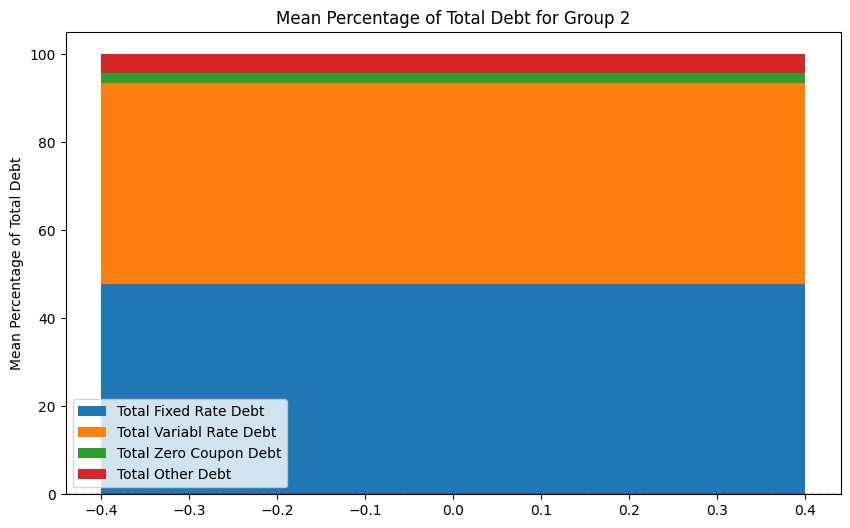

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 2:
                         count       mean        std        min       25%  \
Total Fixed Rate Debt     98.0  47.706002  37.917210   0.000000  0.338096   
Total Variabl Rate Debt   98.0  45.708146  38.506503   0.000000  2.186807   
Total Zero Coupon Debt    98.0   2.359295  13.731136   0.000000  0.000000   
Total Other Debt          98.0   2.684607  15.564755 -18.360751 -1.547918   

                               50%        75%         max  
Total Fixed Rate Debt    50.771982  77.474409  101.944793  
Total Variabl Rate Debt  42.585137  87.936344  109.035895  
Total Zero Coupon Debt    0.000000   0.000000   94.032219  
Total Other Debt         -0.658301   0.000000   87.869310  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         47.706002
Total Variabl Rate Debt       45.708146


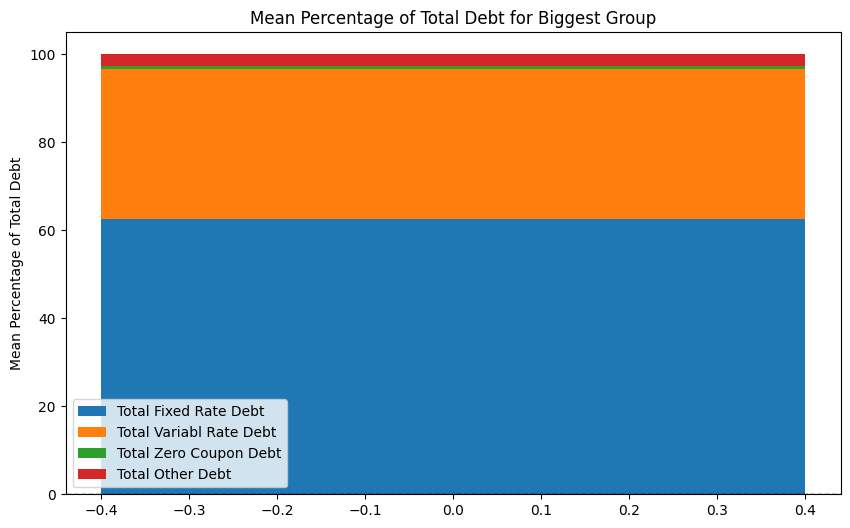

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 3:
                         count       mean        std        min        25%  \
Total Fixed Rate Debt     98.0  62.522860  31.999791   0.000000  43.956655   
Total Variabl Rate Debt   98.0  34.157454  32.901427   0.000000   4.147955   
Total Zero Coupon Debt    98.0   0.549994   3.060748   0.000000   0.000000   
Total Other Debt          98.0   0.213410   4.282870 -18.886777  -0.801810   

                               50%        75%         max  
Total Fixed Rate Debt    70.349465  91.047059  101.777260  
Total Variabl Rate Debt  24.874503  52.576132  120.376707  
Total Zero Coupon Debt    0.000000   0.000000   24.926065  
Total Other Debt         -0.320695   0.915937   18.635111  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         62.522860
Total Variabl Rate Debt       34.15

In [ ]:
a2 = analyze(df_nonzero, class_2, 'Total Assets', 3)

In [ ]:
a2

Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
Group                                                                           
1                  30.348046                56.818738                0.179466   
2                  47.706002                45.708146                2.359295   
3                  62.522860                34.157454                0.549994   

       Total Other Debt  
Group                    
1             12.653749  
2              4.226557  
3              2.769692


For Group 1
Initial Means: [20.635382083958604, 17.05880742615809, 20.06498263256253, 51.512512437082265]
Total Mean: 109.27168457976148
Difference to be added: -9.271684579761484
Before modification - Means for Short term and other: 20.635382083958604
After modification - Means for Short term and other: 11.36369750419712
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


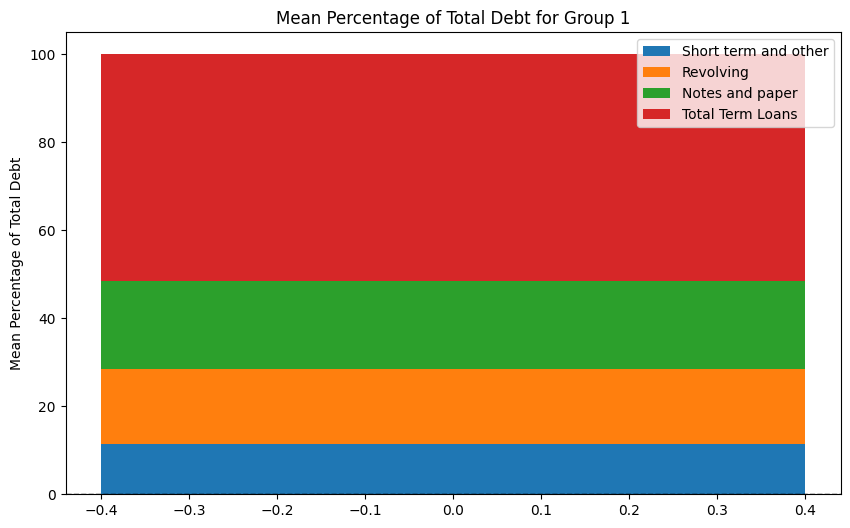

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 1:
                      count       mean        std  min  25%        50%  \
Short term and other   98.0  20.635382  33.582463  0.0  0.0   2.440601   
Revolving              98.0  17.058807  32.916713  0.0  0.0   0.000000   
Notes and paper        98.0  20.064983  38.699294  0.0  0.0   0.000000   
Total Term Loans       98.0  51.512512  47.116609  0.0  0.0  55.731402   

                            75%         max  
Short term and other  23.574381  100.000000  
Revolving             11.978768  100.000000  
Notes and paper       11.952026  166.037736  
Total Term Loans      99.833779  153.387226  

Sum of the means: 100.0
                      Modified Means
Short term and other       11.363698
Revolving                  17.058807
Notes and paper            20.064983
Total Term Loans           51.512512

For Group 2
Initial Means: [9.46734116043

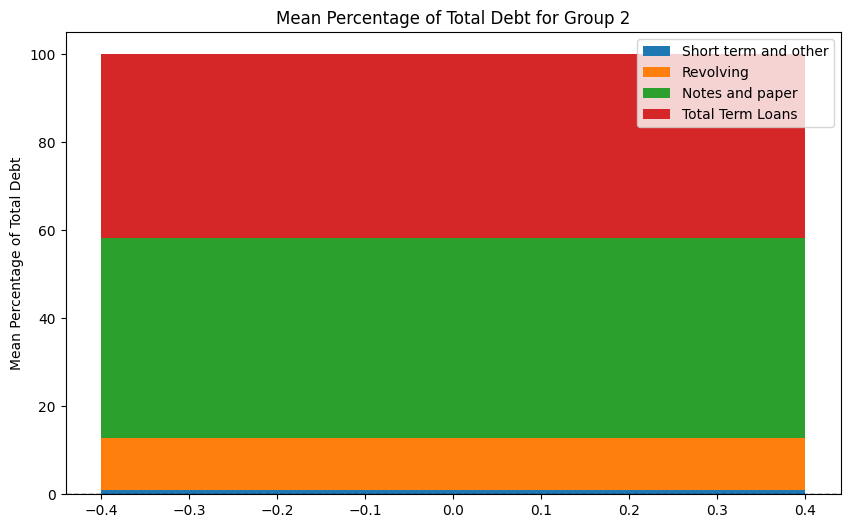

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 2:
                      count       mean        std  min       25%        50%  \
Short term and other   98.0   9.467341  21.839401  0.0  0.000000   1.130579   
Revolving              98.0  11.968587  23.289892  0.0  0.000000   0.000000   
Notes and paper        98.0  45.384439  39.358689  0.0  0.000000  48.762976   
Total Term Loans       98.0  41.747253  39.157816  0.0  0.058596  37.232537   

                            75%         max  
Short term and other   4.688986  100.000000  
Revolving             13.122915  100.000000  
Notes and paper       82.133020  101.944793  
Total Term Loans      82.745398  109.035895  

Sum of the means: 100.0
                      Modified Means
Short term and other        0.899721
Revolving                  11.968587
Notes and paper            45.384439
Total Term Loans           41.747253

For Group 3
Init

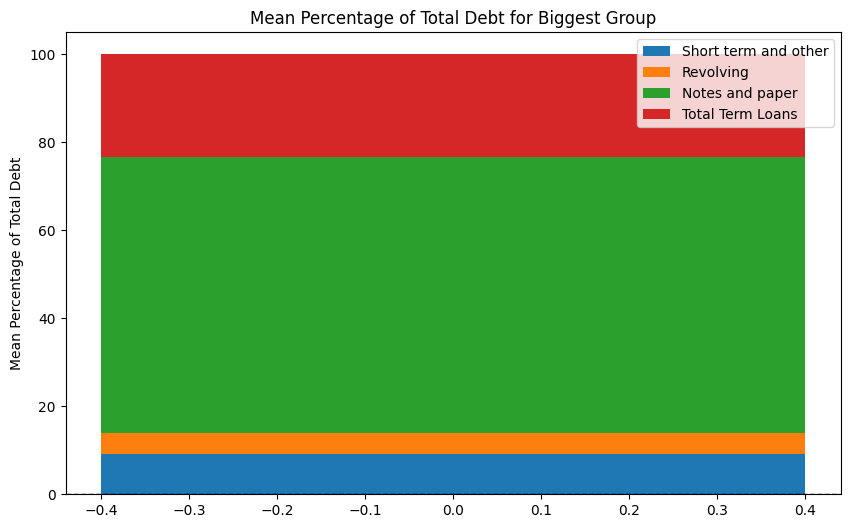

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 3:
                      count       mean        std       min        25%  \
Short term and other   98.0   4.590055   9.189966 -2.396089   0.000000   
Revolving              98.0   4.810156  10.166018  0.000000   0.000000   
Notes and paper        98.0  62.762382  33.023626  0.000000  43.173921   
Total Term Loans       98.0  23.311172  28.475667  0.000000   0.024224   

                            50%        75%         max  
Short term and other   0.859245   4.649390   65.511719  
Revolving              0.000000   3.695972   50.753048  
Notes and paper       72.916766  91.591066  102.680412  
Total Term Loans      14.610112  39.952471  118.942150  

Sum of the means: 100.0
                      Modified Means
Short term and other        9.116290
Revolving                   4.810156
Notes and paper            62.762382
Total Term Loans        

In [ ]:
a3 = analyze(df_nonzero, class_3, 'Total Assets', 3)

In [ ]:
a3

Short term and other  Revolving  Notes and paper  Total Term Loans
Group                                                                    
1                 11.363698  17.058807        20.064983         51.512512
2                  0.899721  11.968587        45.384439         41.747253
3                  9.116290   4.810156        62.762382         23.311172

#### Combined visualizations

In [ ]:
a1

Total Short Term Debt  LTD sans current STD
Group                                             
1                  33.606153             66.393847
2                  10.493408             89.506592
3                  14.945615             85.054385

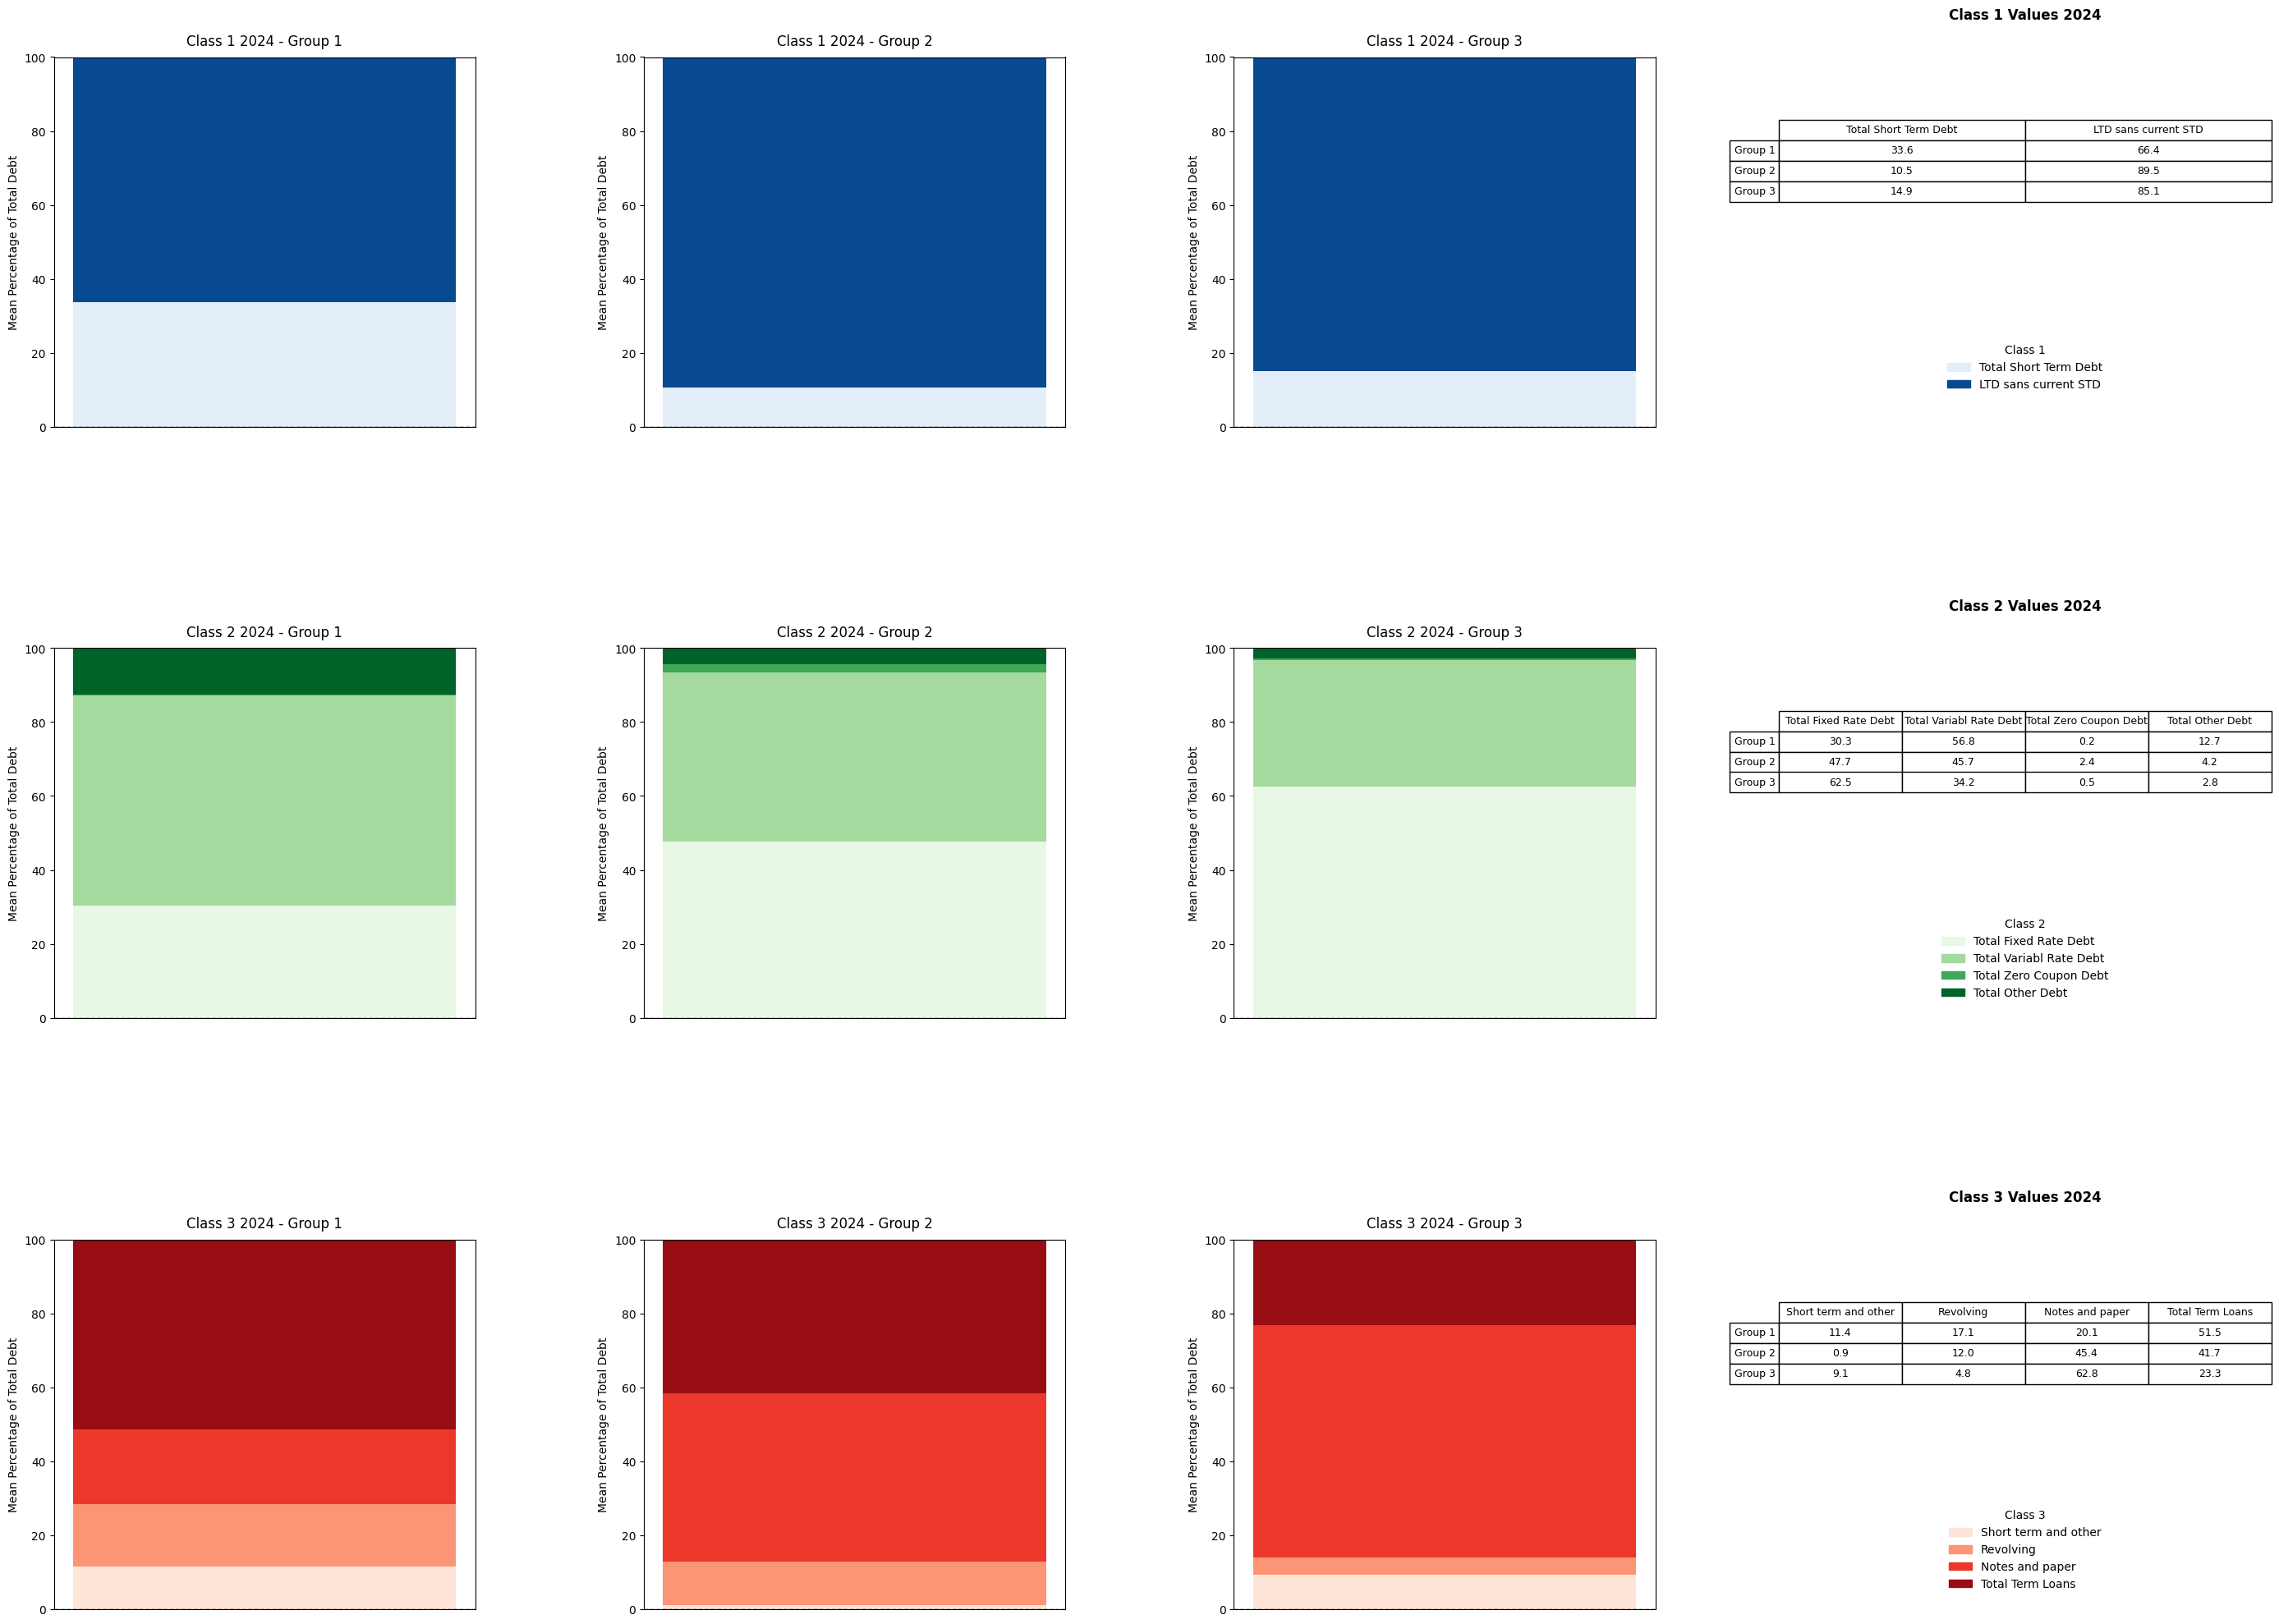

In [ ]:

import matplotlib.patches as mpatches


# Nice color palettes for consistency
colors_class1 = plt.cm.Blues(np.linspace(0.1, 0.9, len(class_1)))
colors_class2 = plt.cm.Greens(np.linspace(0.1, 0.9, len(class_2)))
colors_class3 = plt.cm.Reds(np.linspace(0.1, 0.9, len(class_3)))

combined_data = [a1, a2, a3]  # Combined data for ease of loop
colors_combined = [colors_class1, colors_class2, colors_class3]  # Corresponding colors
group_names = ['Class 1', 'Class 2', 'Class 3']  # Group names


#create grid
fig, axes = plt.subplots(3, 3, figsize=(30, 21))

fig.subplots_adjust(left=0.05, right=0.7, bottom=0.05, top=0.95, hspace=0.6, wspace = 0.4)

legend_handles = [[], [], []]


# Loop through each dataset (a1, a2, a3)
for i, (data, group_name, colors) in enumerate(zip(combined_data, group_names, colors_combined)):

    # Iterate through each row in the dataset
    for j in range(3):
        ax = axes[i, j]  # Access the correct subplot (3x3 grid)
        row_data = data.iloc[j].values  # Extract values for the j-th row of the i-th dataset
        bottom = 0  # Initialize bottom for stacking

        # Plot the stacked bars for the current row
        for k, value in enumerate(row_data):
            height = value
            ax.bar(0, height, bottom=bottom, color=colors[k], label=data.columns[k] if j == 0 else "")

            bottom += height

        ax.set_title(f'{group_name} 2024 - Group {j + 1}', pad=10)
        ax.set_ylabel('Mean Percentage of Total Debt')
        ax.set_xticks([])  # No x-ticks needed
        ax.axhline(0, color='black', linewidth=1, linestyle='--')  # Horizontal line at y=0
        ax.set_ylim(0, 100)  # Set y-axis limits to go from 0 to 100

        # Collect legend handles only for the first plot in each row (i.e., j == 0)
        if j == 0:
            for k in range(len(row_data)):
                legend_handles[i].append(mpatches.Patch(color=colors[k], label=data.columns[k]))

legend_ax = fig.add_axes([0.75, 0.1, 0.2, 0.8])
legend_ax.axis('off')

number_of_subplots = 3  # For each class
table_height = 0.12
legend_height = 0.06
legend_spacing = 0.03  # Reduced spacing between table and legend

# Calculate alignments for the top of each subplot
alignments_top_subplots = [ax.get_position().y1 for ax in axes[:,0]]

for i,(data ,group_name)in enumerate(zip(combined_data ,group_names)):
    # Table position aligned with subplot title
    table_pos=[ .75 ,alignments_top_subplots[i]-table_height , .2 ,table_height ]

    # Add table
    table_ax=fig.add_axes(table_pos)
    table_ax.axis('off')
    table=table_ax.table(cellText=data.values.round(1),colLabels=data.columns,rowLabels=[f'Group {j+1}'for j in range(3)],cellLoc='center',loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.,1.5)
    table_ax.set_title(f'{group_name} Values 2024',fontweight='bold', y=1.15) # Align table title with subplot title

    # Legend position directly below each table
    legend_pos = [0.75, table_pos[1] - legend_height - legend_spacing, 0.2, legend_height]

    legend_ax=fig.add_axes(legend_pos)
    legend_ax.axis('off')
    legend_ax.legend(handles=legend_handles[i],loc='center',title=group_name ,frameon=False)

plt.show()

# Part 2: 2021

####basic import

In [ ]:
df21 = pd.read_excel('sort.xlsx', header=4)
df21 = df21.iloc[1:]
df21.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                    NaN                   NaN                      NaN   
2               17.50000               183.713                     17.5   
3                    NaN                   NaN                      NaN   
4               17.15002                 0.000                      NaN   
5                    NaN                   NaN                      NaN   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    NaN                      NaN                     NaN   
2                    NaN                187.50000                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                 15.47473                     NaN   
5                    NaN                      NaN                     NaN   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1               NaN             NaN  ...               NaN            NaN   
2            -3.787             NaN  ...               NaN            NaN   
3               NaN             NaN  ...               NaN            NaN   
4               NaN             NaN  ...               NaN            NaN   
5               NaN             NaN  ...               NaN            NaN   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     NaN                       NaN               NaN   
2                     NaN                       0.0             187.5   
3                     NaN                       NaN               NaN   
4                     NaN                       0.0               NaN   
5                     NaN                       NaN               NaN   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                NaN         NaN           NaN                 NaN   
2                NaN   183.71300     1107.3200           1987.3600   
3                NaN         NaN      990.5720          16237.5600   
4                NaN    17.15002      484.5688            510.1171   
5                NaN         NaN           NaN                 NaN   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
df21.fillna(0, inplace=True)

df21.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                0.00000                 0.000                      0.0   
2               17.50000               183.713                     17.5   
3                0.00000                 0.000                      0.0   
4               17.15002                 0.000                      0.0   
5                0.00000                 0.000                      0.0   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    0.0                  0.00000                     0.0   
2                    0.0                187.50000                     0.0   
3                    0.0                  0.00000                     0.0   
4                    0.0                 15.47473                     0.0   
5                    0.0                  0.00000                     0.0   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1             0.000             0.0  ...               0.0            0.0   
2            -3.787             0.0  ...               0.0            0.0   
3             0.000             0.0  ...               0.0            0.0   
4             0.000             0.0  ...               0.0            0.0   
5             0.000             0.0  ...               0.0            0.0   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     0.0                       0.0               0.0   
2                     0.0                       0.0             187.5   
3                     0.0                       0.0               0.0   
4                     0.0                       0.0               0.0   
5                     0.0                       0.0               0.0   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                0.0     0.00000        0.0000              0.0000   
2                0.0   183.71300     1107.3200           1987.3600   
3                0.0     0.00000      990.5720          16237.5600   
4                0.0    17.15002      484.5688            510.1171   
5                0.0     0.00000        0.0000              0.0000   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
df21 = df21.drop('Name', axis=1)
print(df21.columns)

Index(['Symbol', 'Total Short Term Debt', 'Total Long Term Debt',
       'Current Short Term Debt', 'Total Fixed Rate Debt',
       'Total Variabl Rate Debt', 'Total Zero Coupon Debt', 'Total Other Debt',
       'Short Term Adj', 'Current Portion LT Debt', 'Unsec Short Term Revolv',
       'Other Unsec Borrow', 'Unsec Comm Paper', 'Notes Payable',
       'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
       'Total Term Loans', 'Total Notes Bonds', 'Total Debt', 'Total Assets',
       'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


In [ ]:
df21['LTD sans current STD'] = df21['Total Long Term Debt'] - df21['Current Short Term Debt']
cols21 = list(df21.columns)
cols21.insert(3, cols21.pop(cols21.index('LTD sans current STD')))
df21 = df21[cols21]
df21 = df21.drop(['Total Long Term Debt', 'Current Short Term Debt'], axis=1)

In [ ]:
df21['Short term and other'] = df21['Short Term Adj'] + df21['Current Portion LT Debt'] + df21['Other Unsec Borrow']
df21['Revolving'] = df21['Unsec Short Term Revolv'] + df21['ST Borrow LTSec Revolv'] + df21['Total Revolv- ing Credit']
df21['Notes and paper'] = df21['Unsec Comm Paper'] + df21['Notes Payable'] + df21['Total Notes Bonds']

df21 = df21.drop(['Short Term Adj', 'Current Portion LT Debt', 'Other Unsec Borrow',
              'Unsec Short Term Revolv', 'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
              'Unsec Comm Paper', 'Notes Payable', 'Total Notes Bonds'], axis=1)

cols = list(df21.columns)
cols.insert(7, cols.pop(cols.index('Short term and other')))
cols.insert(8, cols.pop(cols.index('Revolving')))
cols.insert(9, cols.pop(cols.index('Notes and paper')))
df21 = df21[cols]
print(df21.columns)

Index(['Symbol', 'Total Short Term Debt', 'LTD sans current STD',
       'Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt', 'Short term and other',
       'Revolving', 'Notes and paper', 'Total Term Loans', 'Total Debt',
       'Total Assets', 'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


###Three classifications

In [ ]:
class_1_21 = df21.columns[1:3]
group1_21 = df21[class_1_21]

class_2_21 = df21.columns[3:7]
group2_21 = df21[class_2_21]

class_3_21 = df21.columns[7:11]
group3_21 = df21[class_3_21]

#### How accurate?

In [ ]:
#copy to keep original data
df21_copy = df21.copy()

df21_copy['Group1_Sum'] = df21_copy[class_1].sum(axis=1)
df21_copy['Group1_Diff'] = df21_copy['Total Debt'] - df21_copy['Group1_Sum']
diff21_1 = df21_copy['Group1_Diff'].describe()

diff21_1

count     9821.000000
mean         2.293913
std        216.680275
min      -3166.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20631.000000
Name: Group1_Diff, dtype: float64

In [ ]:

df21_copy['Group2_Sum'] = df21_copy[class_2].sum(axis=1)
df21_copy['Group2_Diff'] = df21_copy['Total Debt'] - df21_copy['Group2_Sum']
diff21_2 = df21_copy['Group2_Diff'].describe()

diff21_2

count    9.821000e+03
mean    -2.758236e+02
std      3.975943e+04
min     -3.908014e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.898510e+05
Name: Group2_Diff, dtype: float64

In [ ]:
df21_copy['Group3_Sum'] = df21_copy[class_3].sum(axis=1)
df21_copy['Group3_Diff'] = df21_copy['Total Debt'] - df21_copy['Group3_Sum']
diff21_3 = df21_copy['Group1_Diff'].describe()

diff21_3

count     9821.000000
mean         2.293913
std        216.680275
min      -3166.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20631.000000
Name: Group1_Diff, dtype: float64

In [ ]:
# get the rows where the above differences are greater than a certain % of the total debt

threshold_percentage = 0.01  # 1% threshold

filtered21_1 = extract_rows_above_threshold(df21_copy, 'Group1_Diff', 'Total Debt', 'Symbol')
filtered21_2 = extract_rows_above_threshold(df21_copy, 'Group2_Diff', 'Total Debt', 'Symbol')
filtered21_3 = extract_rows_above_threshold(df21_copy, 'Group3_Diff', 'Total Debt', 'Symbol')

print("Filtered DataFrame (Comparison 1):")
print(filtered21_1)

print("\nFiltered DataFrame (Comparison 2):")
print(filtered21_2)

print("\nFiltered DataFrame (Comparison 3):")
print(filtered21_3)

Filtered DataFrame (Comparison 1):
     Symbol  Total Debt  Group1_Diff
3087   EVKG   -3098.152    -3166.000
3632     GE   62888.000     5044.000
3860     GS  520328.000    20631.000
8241   SSTT      84.825       19.527

Filtered DataFrame (Comparison 2):
     Symbol   Total Debt  Group2_Diff
4        YI    17.150020     1.675290
12     EFSH     6.863903    -0.239211
19     SRCE   355.730000    18.671000
30     DDDX     0.995917    -0.535141
41     RNWR     1.097965    -1.000000
...     ...          ...          ...
9761   ZRFY     4.704000    -4.087513
9779     ZD  1678.753000   485.000000
9780      Z  4440.573000  2466.009000
9786   ZION  1599.000000   579.000000
9789   ZTTO     0.005335     0.005335

[1262 rows x 3 columns]

Filtered DataFrame (Comparison 3):
     Symbol   Total Debt  Group3_Diff
2      FLWS   183.713000   -21.287000
4        YI    17.150020    -9.064170
12     EFSH     6.863903     1.320364
14     BCOW    55.934000    -8.972000
17     FCOB    10.431000    -0.319000

#### Visualize - Total Debt

Summary Statistics for Total Debt:
count    9.821000e+03
mean     1.950537e+03
std      5.254554e+04
min     -3.098152e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.977975e+01
max      4.142832e+06
Name: Total Debt, dtype: float64

Mean of Total Debt within 45th-55th Percentile: 0.0


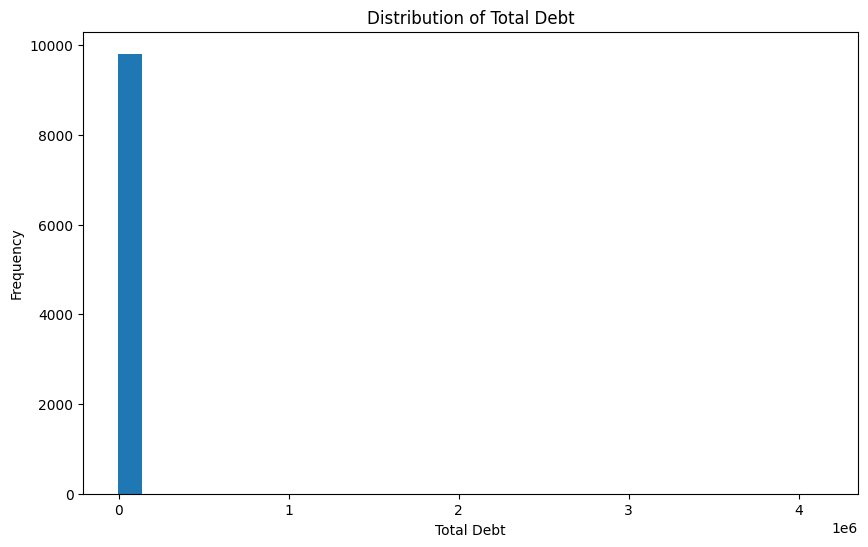

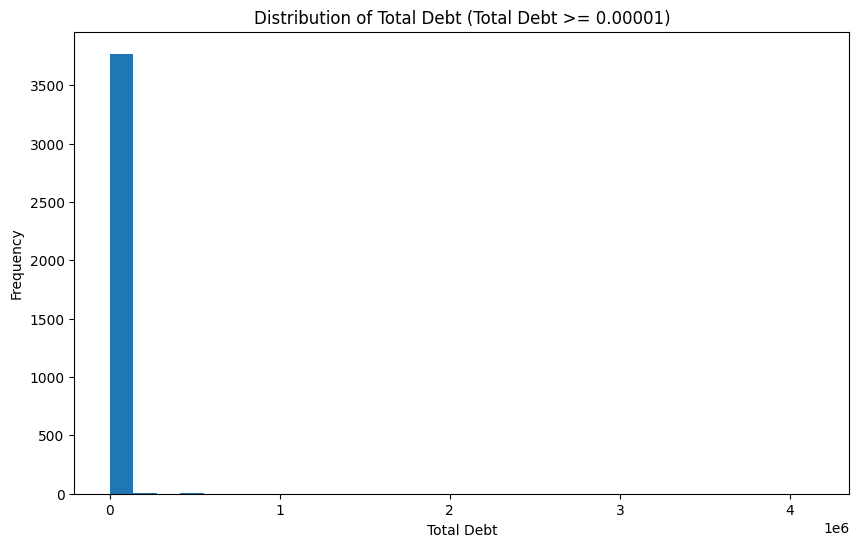

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics for 'Total Debt'
total_debt_stats21 = df21['Total Debt'].describe()
print("Summary Statistics for Total Debt:")
print(total_debt_stats21)

# Calculate the mean of total debt within the 45th to 55th percentile
lower_percentile21 = df21['Total Debt'].quantile(0.45)
upper_percentile21 = df21['Total Debt'].quantile(0.55)
filtered_df21 = df21[(df21['Total Debt'] >= lower_percentile21) & (df21['Total Debt'] <= upper_percentile21)]
mean_total_debt_within_percentile21 = filtered_df21['Total Debt'].mean()
print("\nMean of Total Debt within 45th-55th Percentile:", mean_total_debt_within_percentile21)

# Graph a distribution of Total Debt
plt.figure(figsize=(10, 6))
plt.hist(df21['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt')
plt.show()

# Graph another where Total Debt >= 0.00001
plt.figure(figsize=(10, 6))
plt.hist(df21[df21['Total Debt'] >= 0.00001]['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt (Total Debt >= 0.00001)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
means21 = []
summary21_1 = []

iszero = False
df21_nonzero = df21[df21['Total Debt'] >= 0.01]

for column in group1_21.columns:
  results = get_percentile_stats(df21, column, 'Total Debt', 0.45, 0.55)
  if results['Mean'] < 0.001:
    iszero = True
    break

if iszero:
  for column in group1_21.columns:
    results = get_percentile_stats(df21_nonzero, column, 'Total Debt', 0.45, 0.55)
    means21.append(results['Mean'])
    summary21_1.append(results['Summary Statistics'])
else:
  for column in group1_21.columns:
    results = get_percentile_stats(df21, column, 'Total Debt', 0.45, 0.55)
    means21.append(results['Mean'])
    summary21_1.append(results['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means, labels=group1_21.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 1')
plt.show()



ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>

In [ ]:
#summary stats
print("Summary Statistics for Class 1:")
summary21_table1 = pd.DataFrame(summary21_1, index=group1_21.columns)
summary21_table1

In [ ]:
means21_2 = []
summary21_2 = []

iszero_2 = False

for column in group2_21.columns:
  results_2 = get_percentile_stats(df21, column, 'Total Debt', 0.45, 0.55)
  if results_2['Mean'] < 0.01:
    iszero_2 = True
    break

if iszero_2:
  for column in group2_21.columns:
    results_2 = get_percentile_stats(df21_nonzero, column, 'Total Debt', 0.45, 0.55)
    means21_2.append(results_2['Mean'])
    summary21_2.append(results_2['Summary Statistics'])
else:
  for column in group2_21.columns:
    results_2 = get_percentile_stats(df21, column, 'Total Debt', 0.45, 0.55)
    means21_2.append(results_2['Mean'])
    summary21_2.append(results_2['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means21_2, labels=group2_21.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 2')
plt.show()

In [ ]:
#summary stats
print("Summary Statistics for Class 2:")
summary21_table2 = pd.DataFrame(summary21_2, index=group2_21.columns)
summary21_table2

In [ ]:
means21_3 = []
summary21_3 = []

iszero_3 = False

for column in group3_21.columns:
  results_3 = get_percentile_stats(df21, column, 'Total Debt')
  if results_3['Mean'] < 0.01:
    iszero_3 = True

if iszero_3:
  for column in group3_21.columns:
    results_3 = get_percentile_stats(df21_nonzero, column, 'Total Debt')
    means21_3.append(results_3['Mean'])
    summary21_3.append(results_3['Summary Statistics'])
else:
  for column in group3_21.columns:
    results_3 = get_percentile_stats(df21, column, 'Total Debt')
    means21_3.append(results_3['Mean'])
    summary21_3.append(results_3['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means21_3, labels=group3_21.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 3')
plt.show()



In [ ]:
#summary stats
print("Summary Statistics for Class 3:")
summary21_table3 = pd.DataFrame(summary21_3, index=group3_21.columns)
summary21_table3

#### Per Asset

In [ ]:
# prompt: a = divide_into_groups(df, 'Total Assets', 3)
# a
# for each group in a, display row count, and display total row count for df

a = divide_into_groups(df21, 'Total Assets', 3)

for i, group in enumerate(a):
  print(f"Group {i + 1}:")
  print(f"  Row Count: {len(group)}")
  print(f"  Total Row Count (df): {len(df)}")
  print("---")

Group 1:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 2:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 3:
  Row Count: 3273
  Total Row Count (df): 9821
---


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



For Group 1
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


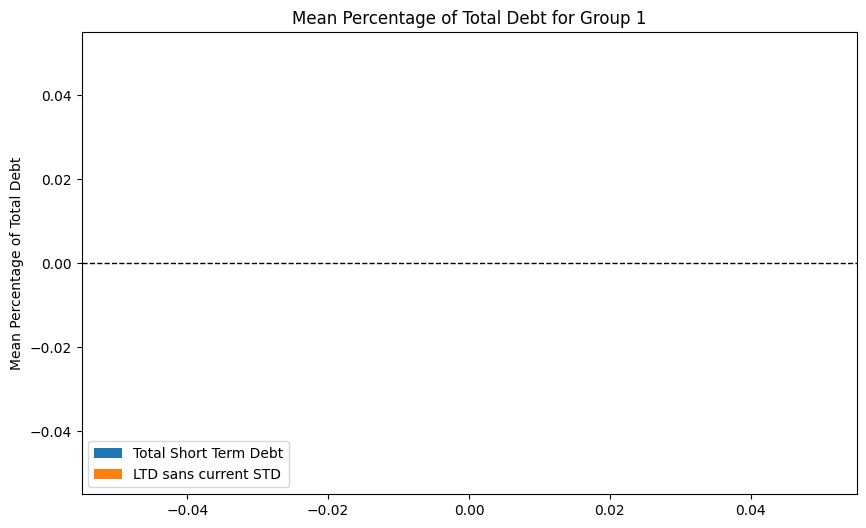

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 2
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


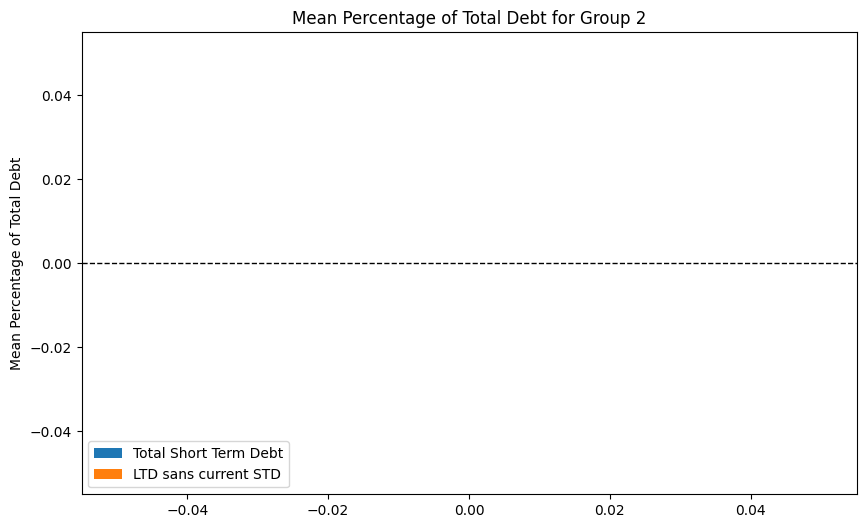

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 3
Initial Means: [15.20746991967737, 84.7925304407841]
Total Mean: 100.00000036046147
Difference to be added: -3.604614704499909e-07
Total Mean after adjustments: 100.00000036046147
Means before setting negatives to 0: [15.20746991967737, 84.7925304407841]
Means after setting negatives to 0: [15.20746991967737, 84.7925304407841]
Normalized Means: [15.2074698648603, 84.79253013513971]


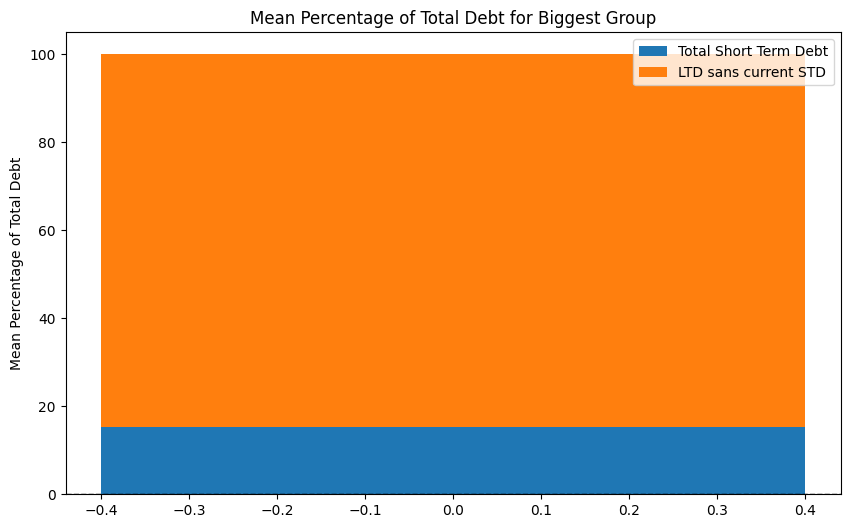

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count      mean        std  min       25%        50%  \
Total Short Term Debt  327.0  15.20747  27.940119  0.0   0.00000   1.361222   
LTD sans current STD   327.0  84.79253  27.940119  0.0  84.96625  98.638778   

                             75%    max  
Total Short Term Debt   15.03376  100.0  
LTD sans current STD   100.00000  100.0  

Sum of the means: 100.00000000000001
                       Modified Means
Total Short Term Debt        15.20747
LTD sans current STD         84.79253


Total Short Term Debt  LTD sans current STD
Group                                             
1                        NaN                   NaN
2                        NaN                   NaN
3                   15.20747              84.79253

In [ ]:
#now we do it
analyze(df21, class_1_21, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


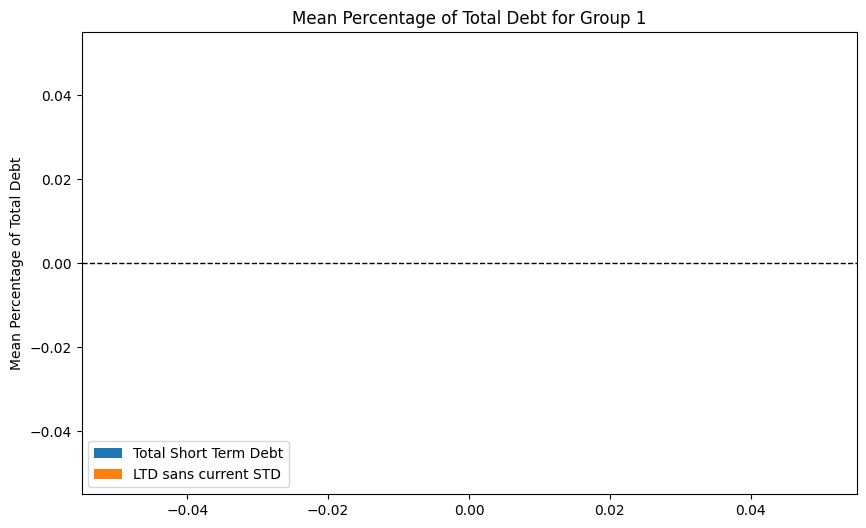

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 2
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


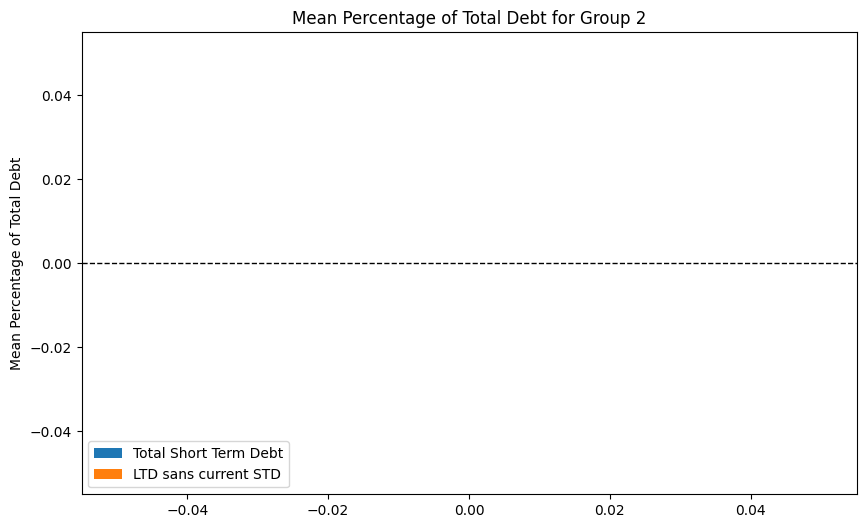

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 3
Initial Means: [15.20746991967737, 84.7925304407841]
Total Mean: 100.00000036046147
Difference to be added: -3.604614704499909e-07
Total Mean after adjustments: 100.00000036046147
Means before setting negatives to 0: [15.20746991967737, 84.7925304407841]
Means after setting negatives to 0: [15.20746991967737, 84.7925304407841]
Normalized Means: [15.2074698648603, 84.79253013513971]


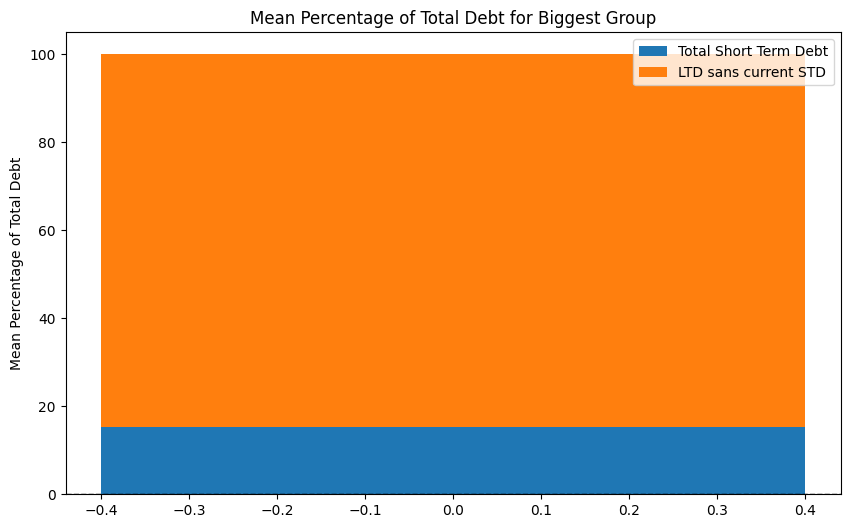

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count      mean        std  min       25%        50%  \
Total Short Term Debt  327.0  15.20747  27.940119  0.0   0.00000   1.361222   
LTD sans current STD   327.0  84.79253  27.940119  0.0  84.96625  98.638778   

                             75%    max  
Total Short Term Debt   15.03376  100.0  
LTD sans current STD   100.00000  100.0  

Sum of the means: 100.00000000000001
                       Modified Means
Total Short Term Debt        15.20747
LTD sans current STD         84.79253


Total Short Term Debt  LTD sans current STD
Group                                             
1                        NaN                   NaN
2                        NaN                   NaN
3                   15.20747              84.79253

In [ ]:

analyze(df21, class_1_21, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


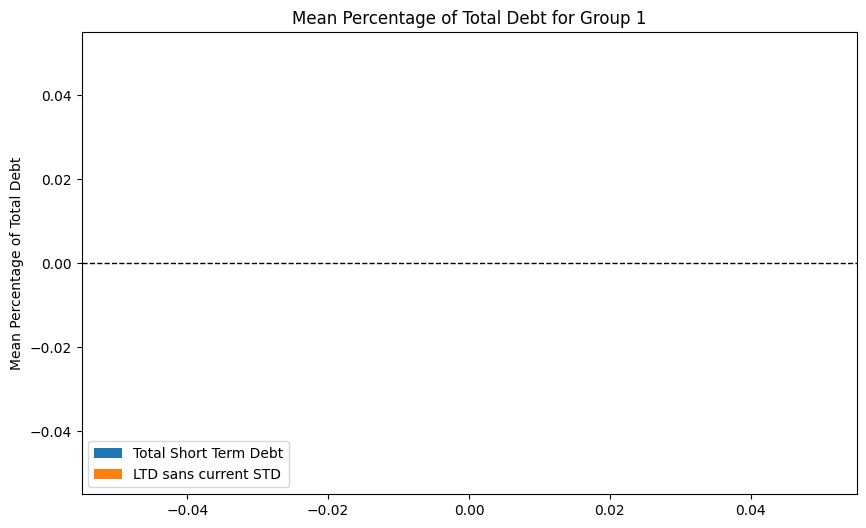

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 2
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


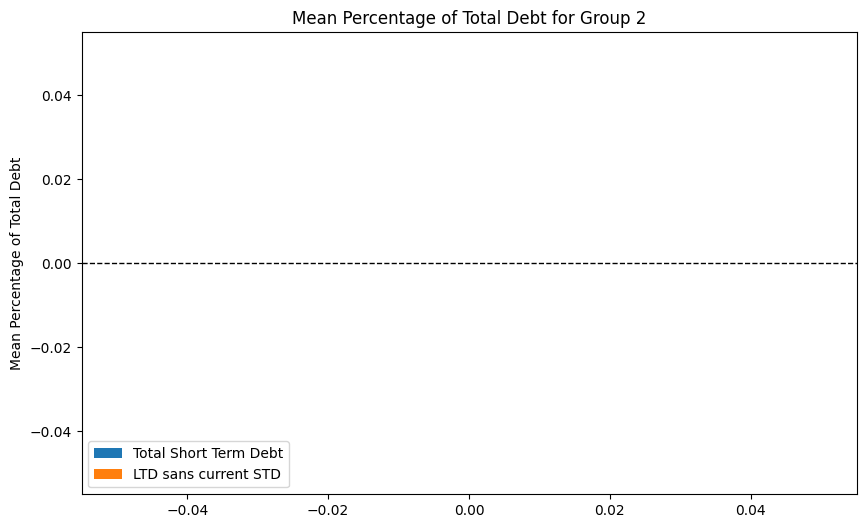

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 3
Initial Means: [15.20746991967737, 84.7925304407841]
Total Mean: 100.00000036046147
Difference to be added: -3.604614704499909e-07
Total Mean after adjustments: 100.00000036046147
Means before setting negatives to 0: [15.20746991967737, 84.7925304407841]
Means after setting negatives to 0: [15.20746991967737, 84.7925304407841]
Normalized Means: [15.2074698648603, 84.79253013513971]


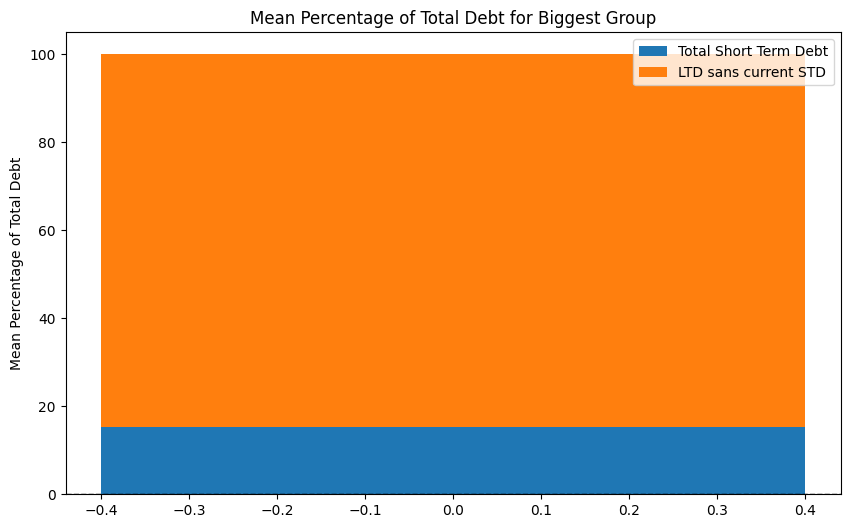

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count      mean        std  min       25%        50%  \
Total Short Term Debt  327.0  15.20747  27.940119  0.0   0.00000   1.361222   
LTD sans current STD   327.0  84.79253  27.940119  0.0  84.96625  98.638778   

                             75%    max  
Total Short Term Debt   15.03376  100.0  
LTD sans current STD   100.00000  100.0  

Sum of the means: 100.00000000000001
                       Modified Means
Total Short Term Debt        15.20747
LTD sans current STD         84.79253


Total Short Term Debt  LTD sans current STD
Group                                             
1                        NaN                   NaN
2                        NaN                   NaN
3                   15.20747              84.79253

In [ ]:

analyze(df21, class_1_21, 'Total Assets', 3)

#### Nonzero asset

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



For Group 1
Initial Means: [69.40641027440348, 30.593589725596505]
Total Mean: 99.99999999999999
Difference to be added: 1.4210854715202004e-14
Total Mean after adjustments: 99.99999999999999
Means before setting negatives to 0: [69.40641027440348, 30.593589725596505]
Means after setting negatives to 0: [69.40641027440348, 30.593589725596505]
Normalized Means: [69.4064102744035, 30.59358972559651]


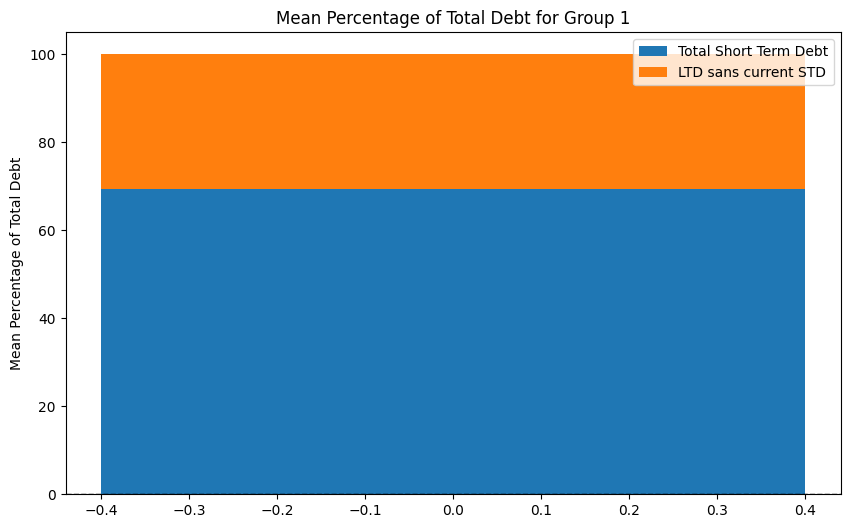

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count      mean        std  min        25%        50%  \
Total Short Term Debt  127.0  69.40641  35.314769  0.0  41.669995  87.673361   
LTD sans current STD   127.0  30.59359  35.314769  0.0   0.000000  12.326639   

                              75%    max  
Total Short Term Debt  100.000000  100.0  
LTD sans current STD    58.330005  100.0  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt        69.40641
LTD sans current STD         30.59359

For Group 2
Initial Means: [15.106465110287505, 84.8935352363875]
Total Mean: 100.00000034667501
Difference to be added: -3.4667500870000367e-07
Total Mean after adjustments: 100.00000034667501
Means before setting negatives to 0: [15.106465110287505, 84.8935352363875]
Means after setting negatives to 0: [15.106465110287505, 84.8935352363875]
Normalized Means: [15.106465057917164,

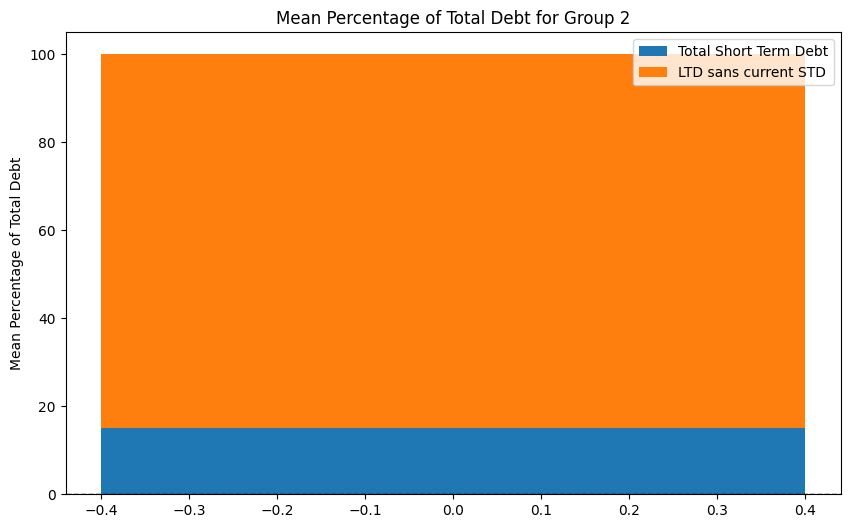

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count       mean        std  min        25%        50%  \
Total Short Term Debt  126.0  15.106465  27.434072  0.0   0.000000   2.270592   
LTD sans current STD   126.0  84.893535  27.434072  0.0  89.560034  97.729408   

                              75%    max  
Total Short Term Debt   10.439966  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt       15.106465
LTD sans current STD        84.893535

For Group 3
Initial Means: [10.463624913818506, 89.5363750861815]
Total Mean: 100.0
Total Mean after adjustments: 100.0


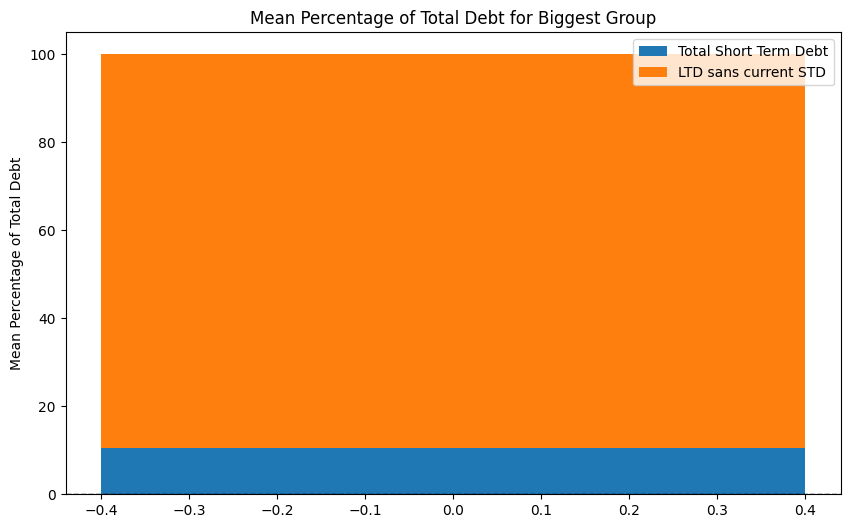

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count       mean        std  min        25%        50%  \
Total Short Term Debt  126.0  10.463625  20.608748  0.0   0.001559   1.603065   
LTD sans current STD   126.0  89.536375  20.608748  0.0  91.014612  98.396935   

                             75%    max  
Total Short Term Debt   8.985388  100.0  
LTD sans current STD   99.998441  100.0  

Sum of the means: 100.0


In [ ]:
b1 = analyze(df21_nonzero, class_1_21, 'Total Assets', 3)


For Group 1
Initial Means: [57.006838846370236, 23.698299765260966, 6.651752260328887, 13.588653069791674]
Total Mean: 100.94554394175177
Difference to be added: -0.9455439417517653
Before modification - Means for Total Other Debt: 13.588653069791674
After modification - Means for Total Other Debt: 12.643109128039908
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


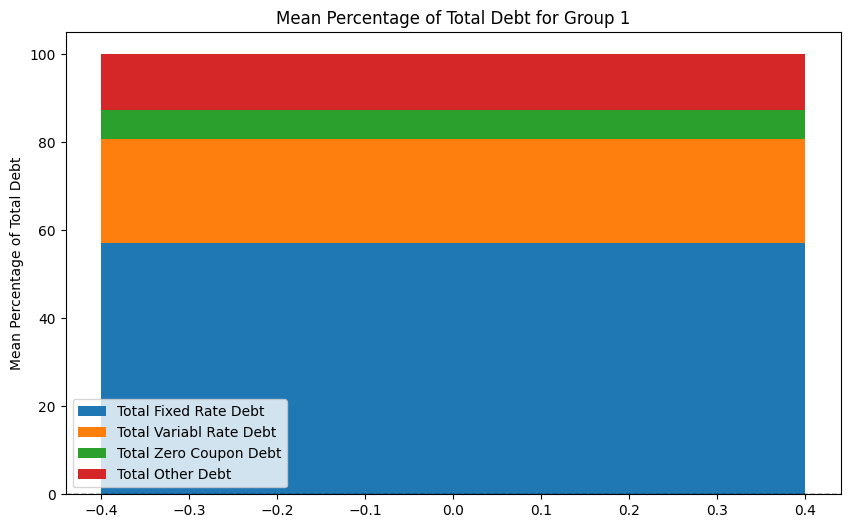

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 1:
                         count       mean        std         min       25%  \
Total Fixed Rate Debt    127.0  57.006839  48.692997    0.000000  1.809945   
Total Variabl Rate Debt  127.0  23.698300  48.895576    0.000000  0.000000   
Total Zero Coupon Debt   127.0   6.651752  19.507416    0.000000  0.000000   
Total Other Debt         127.0  13.588653  45.434049 -300.641026  0.000000   

                               50%        75%         max  
Total Fixed Rate Debt    58.901477  97.923440  210.421864  
Total Variabl Rate Debt   0.000000  22.021846  400.641026  
Total Zero Coupon Debt    0.000000   0.226810  100.000000  
Total Other Debt          3.104136  28.764895  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         57.006839
Total Variabl Rate Debt       23.69

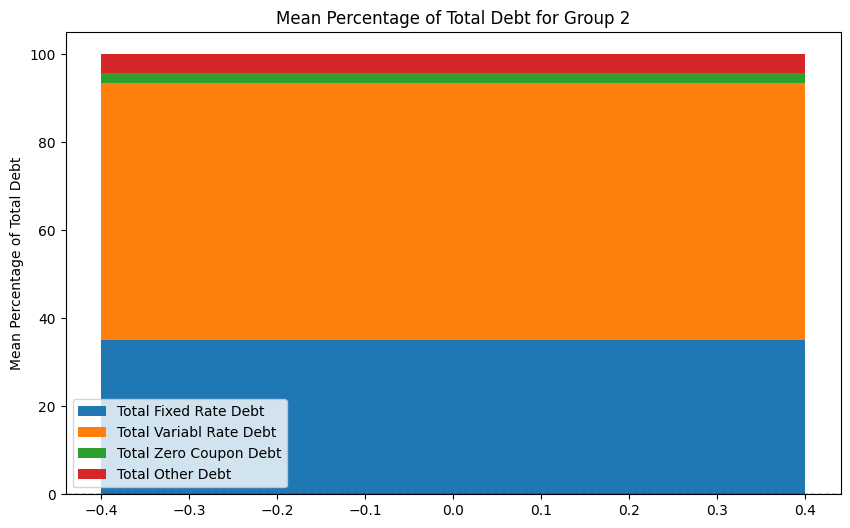

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 2:
                         count       mean        std        min       25%  \
Total Fixed Rate Debt    126.0  35.132935  46.218333   0.000000  0.000000   
Total Variabl Rate Debt  126.0  58.444826  46.325131   0.000000  0.000000   
Total Zero Coupon Debt   126.0   2.104218  13.575864   0.000000  0.000000   
Total Other Debt         126.0   1.029870  17.153148 -33.008786 -1.930885   

                               50%         75%         max  
Total Fixed Rate Debt     0.000000   78.967709  133.008786  
Total Variabl Rate Debt  87.584434  100.269637  116.046437  
Total Zero Coupon Debt    0.000000    0.000000  109.913059  
Total Other Debt         -0.463211    0.000000  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         35.132935
Total Variabl Rate Debt       58.44

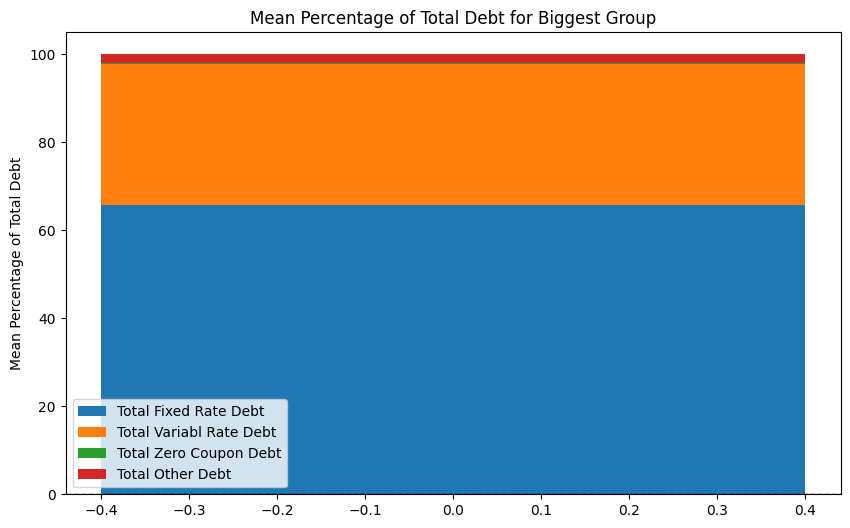

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 3:
                         count       mean        std        min        25%  \
Total Fixed Rate Debt    126.0  65.847076  32.825206   0.000000  40.522674   
Total Variabl Rate Debt  126.0  31.875346  31.458085   0.000000   2.758921   
Total Zero Coupon Debt   126.0   0.365552   2.908913   0.000000   0.000000   
Total Other Debt         126.0  -0.604294   3.488959 -16.805445  -1.093718   

                               50%        75%         max  
Total Fixed Rate Debt    77.094928  94.917983  101.335849  
Total Variabl Rate Debt  23.019984  55.598839  100.883892  
Total Zero Coupon Debt    0.000000   0.000000   25.855147  
Total Other Debt         -0.666033  -0.049430   10.632196  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         65.847076
Total Variabl Rate Debt       31.87

In [ ]:
b2 = analyze(df21_nonzero, class_2_21, 'Total Assets', 3)


For Group 1
Initial Means: [39.43620027231431, 3.8138534653038723, 23.305000803212437, 35.30254353606227]
Total Mean: 101.85759807689288
Difference to be added: -1.8575980768928844
Before modification - Means for Short term and other: 39.43620027231431
After modification - Means for Short term and other: 37.578602195421425
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


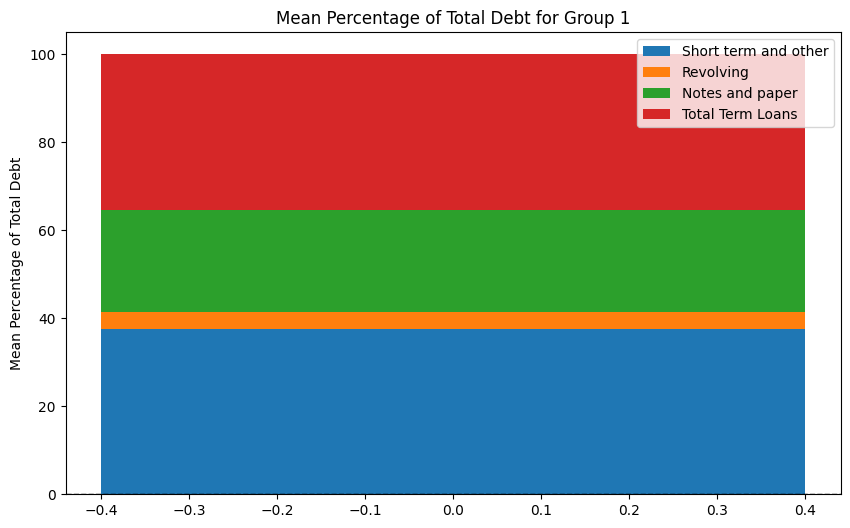

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 1:
                      count       mean        std        min       25%  \
Short term and other  127.0  39.436200  37.146742 -64.457203  6.597044   
Revolving             127.0   3.813853  15.164415   0.000000  0.000000   
Notes and paper       127.0  23.305001  39.093012   0.000000  0.000000   
Total Term Loans      127.0  35.302544  50.070586   0.000000  0.000000   

                            50%        75%         max  
Short term and other  34.748572  67.623302  100.000000  
Revolving              0.000000   0.000000  100.000000  
Notes and paper        0.000000  33.101840  170.489904  
Total Term Loans      13.401251  67.244173  400.641026  

Sum of the means: 100.0
                      Modified Means
Short term and other       37.578602
Revolving                   3.813853
Notes and paper            23.305001
Total Term Loans        

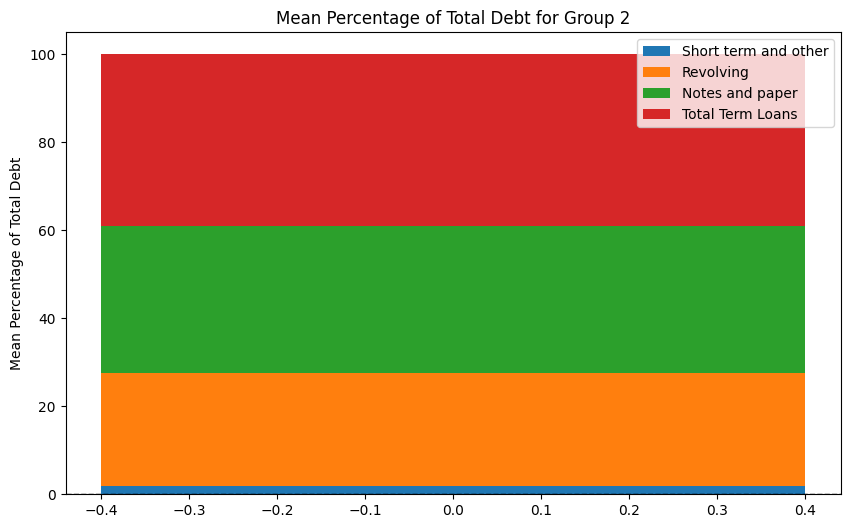

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 2:
                      count       mean        std       min  25%       50%  \
Short term and other  126.0   9.781811  22.198135 -0.145933  0.0  1.261773   
Revolving             126.0  25.839598  38.487799  0.000000  0.0  0.000000   
Notes and paper       126.0  33.280944  46.206059  0.000000  0.0  0.000000   
Total Term Loans      126.0  39.048990  44.533490  0.000000  0.0  4.171993   

                            75%         max  
Short term and other   6.479206  100.000000  
Revolving             41.988076  102.826962  
Notes and paper       75.180883  133.008786  
Total Term Loans      89.189883  116.046437  

Sum of the means: 100.0
                      Modified Means
Short term and other        1.830467
Revolving                  25.839598
Notes and paper            33.280944
Total Term Loans           39.048990

For Group 3
Initial M

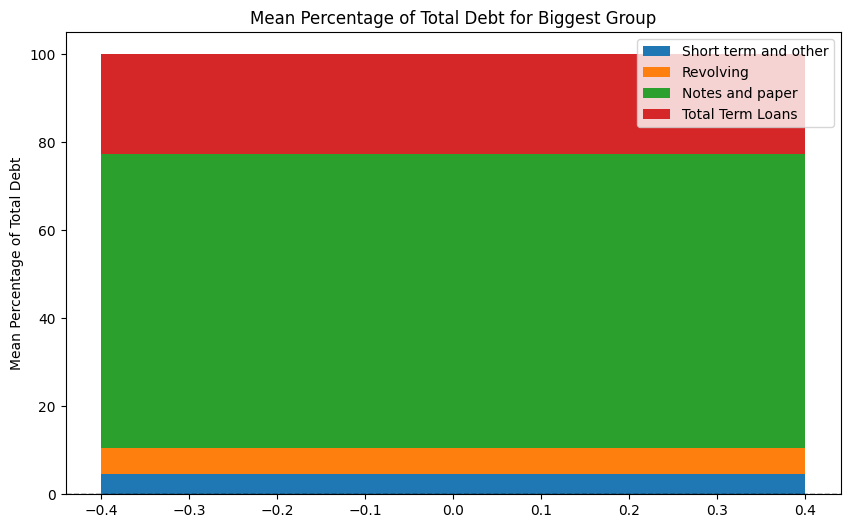

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 3:
                      count       mean        std       min        25%  \
Short term and other  126.0   4.964069  12.080043 -0.069599   0.000000   
Revolving             126.0   5.917576  12.487193  0.000000   0.000000   
Notes and paper       126.0  66.874518  32.749190  0.000000  42.712391   
Total Term Loans      126.0  22.661913  29.748893  0.000000   0.000000   

                            50%        75%         max  
Short term and other   0.331432   2.709238   81.936326  
Revolving              0.000000   6.921864   69.983724  
Notes and paper       77.384646  96.363145  101.575456  
Total Term Loans       8.796206  37.532403  115.085645  

Sum of the means: 100.0
                      Modified Means
Short term and other        4.545993
Revolving                   5.917576
Notes and paper            66.874518
Total Term Loans        

In [ ]:
b3 = analyze(df21_nonzero, class_3_21, 'Total Assets', 3)

#### Combined visual

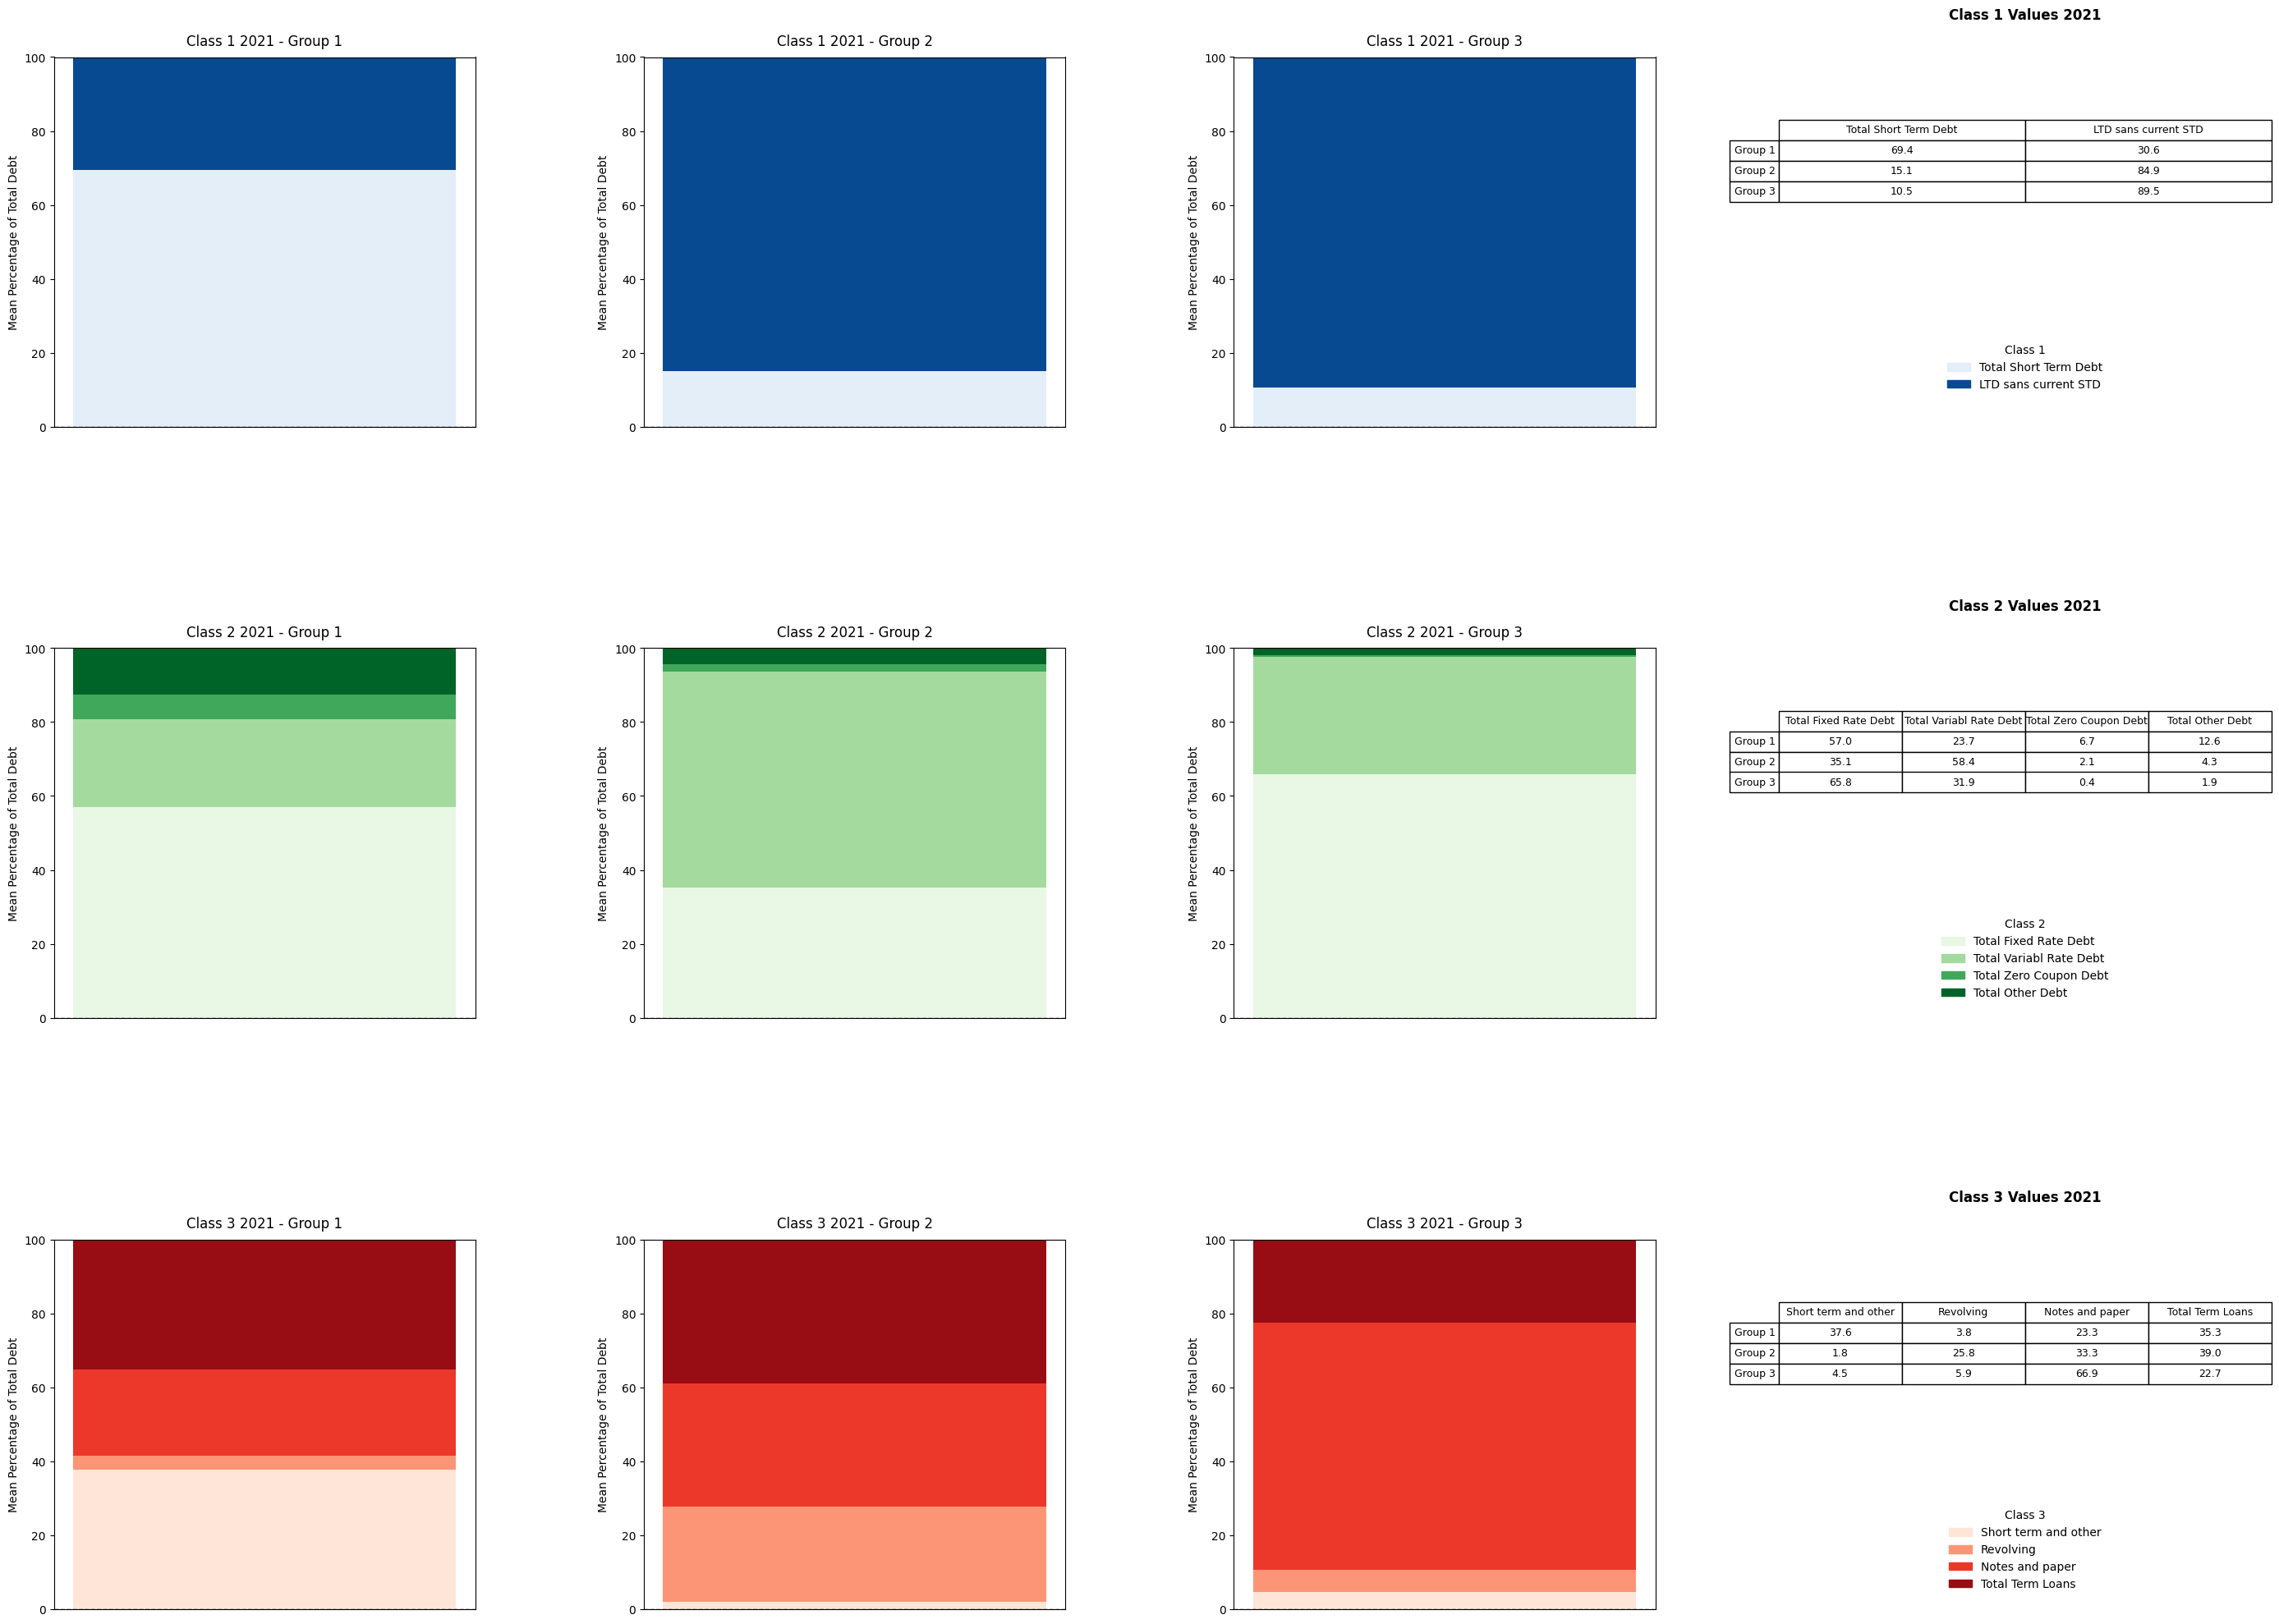

In [ ]:

import matplotlib.patches as mpatches


# Nice color palettes for consistency
colors_class1 = plt.cm.Blues(np.linspace(0.1, 0.9, len(class_1)))
colors_class2 = plt.cm.Greens(np.linspace(0.1, 0.9, len(class_2)))
colors_class3 = plt.cm.Reds(np.linspace(0.1, 0.9, len(class_3)))

combined_data = [b1, b2, b3]  # Combined data for ease of loop
colors_combined = [colors_class1, colors_class2, colors_class3]  # Corresponding colors
group_names = ['Class 1', 'Class 2', 'Class 3']  # Group names


#create grid
fig, axes = plt.subplots(3, 3, figsize=(30, 21))

fig.subplots_adjust(left=0.05, right=0.7, bottom=0.05, top=0.95, hspace=0.6, wspace = 0.4)

legend_handles = [[], [], []]


# Loop through each dataset (a1, a2, a3)
for i, (data, group_name, colors) in enumerate(zip(combined_data, group_names, colors_combined)):

    # Iterate through each row in the dataset
    for j in range(3):
        ax = axes[i, j]  # Access the correct subplot (3x3 grid)
        row_data = data.iloc[j].values  # Extract values for the j-th row of the i-th dataset
        bottom = 0  # Initialize bottom for stacking

        # Plot the stacked bars for the current row
        for k, value in enumerate(row_data):
            height = value
            ax.bar(0, height, bottom=bottom, color=colors[k], label=data.columns[k] if j == 0 else "")

            bottom += height

        ax.set_title(f'{group_name} 2021 - Group {j + 1}', pad=10)
        ax.set_ylabel('Mean Percentage of Total Debt')
        ax.set_xticks([])  # No x-ticks needed
        ax.axhline(0, color='black', linewidth=1, linestyle='--')  # Horizontal line at y=0
        ax.set_ylim(0, 100)  # Set y-axis limits to go from 0 to 100

        # Collect legend handles only for the first plot in each row (i.e., j == 0)
        if j == 0:
            for k in range(len(row_data)):
                legend_handles[i].append(mpatches.Patch(color=colors[k], label=data.columns[k]))

legend_ax = fig.add_axes([0.75, 0.1, 0.2, 0.8])
legend_ax.axis('off')

number_of_subplots = 3  # For each class
table_height = 0.12
legend_height = 0.06
legend_spacing = 0.03  # Reduced spacing between table and legend

# Calculate alignments for the top of each subplot
alignments_top_subplots = [ax.get_position().y1 for ax in axes[:,0]]

for i,(data ,group_name)in enumerate(zip(combined_data ,group_names)):
    # Table position aligned with subplot title
    table_pos=[ .75 ,alignments_top_subplots[i]-table_height , .2 ,table_height ]

    # Add table
    table_ax=fig.add_axes(table_pos)
    table_ax.axis('off')
    table=table_ax.table(cellText=data.values.round(1),colLabels=data.columns,rowLabels=[f'Group {j+1}'for j in range(3)],cellLoc='center',loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.,1.5)
    table_ax.set_title(f'{group_name} Values 2021',fontweight='bold', y=1.15) # Align table title with subplot title

    # Legend position directly below each table
    legend_pos = [0.75, table_pos[1] - legend_height - legend_spacing, 0.2, legend_height]

    legend_ax=fig.add_axes(legend_pos)
    legend_ax.axis('off')
    legend_ax.legend(handles=legend_handles[i],loc='center',title=group_name ,frameon=False)

plt.show()

#Part 3: 19

### basic import

In [ ]:
df19 = pd.read_excel('sort19.xlsx', header=4)
df19 = df19.iloc[1:]
df19.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                    NaN                   NaN                      NaN   
2                5.00000                96.973                    5.000   
3                9.88200                29.719                    9.882   
4               13.64988                   NaN                      NaN   
5                    NaN                   NaN                      NaN   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    NaN                      NaN                     NaN   
2                    NaN                100.00000                     NaN   
3                    NaN                 30.00000                     NaN   
4                    NaN                 13.64988                     NaN   
5                    NaN                      NaN                     NaN   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1               NaN             NaN  ...               NaN            NaN   
2            -3.027             NaN  ...               NaN            NaN   
3            -0.281             NaN  ...               NaN            NaN   
4               NaN             NaN  ...               NaN            NaN   
5               NaN             NaN  ...               NaN            NaN   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     NaN                       NaN               NaN   
2                     NaN                       0.0             100.0   
3                     NaN                       0.0              30.0   
4                     NaN                       NaN               NaN   
5                     NaN                       NaN               NaN   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                NaN         NaN           NaN                 NaN   
2                NaN    96.97300      615.3370            937.3090   
3                NaN    29.71900      605.9230           7338.4520   
4                NaN    13.64988      231.1746            552.2638   
5                NaN         NaN           NaN                 NaN   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
df19.fillna(0, inplace=True)

df19.head()

Symbol                                              Name  \
1  LNXGF                                 0187279 B.C. Ltd.   
2   FLWS                   1-800-FLOWERS.COM, Inc. Class A   
3    TXG                          10x Genomics Inc Class A   
4     YI                   111, Inc. Sponsored ADR Class A   
5   YSGG  1399 Internet Technology Application Group, Inc.   

   Total Short Term Debt  Total Long Term Debt  Current Short Term Debt  \
1                0.00000                 0.000                    0.000   
2                5.00000                96.973                    5.000   
3                9.88200                29.719                    9.882   
4               13.64988                 0.000                    0.000   
5                0.00000                 0.000                    0.000   

   Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
1                    0.0                  0.00000                     0.0   
2                    0.0                100.00000                     0.0   
3                    0.0                 30.00000                     0.0   
4                    0.0                 13.64988                     0.0   
5                    0.0                  0.00000                     0.0   

   Total Other Debt  Short Term Adj  ...  Unsec Comm Paper  Notes Payable  \
1             0.000             0.0  ...               0.0            0.0   
2            -3.027             0.0  ...               0.0            0.0   
3            -0.281             0.0  ...               0.0            0.0   
4             0.000             0.0  ...               0.0            0.0   
5             0.000             0.0  ...               0.0            0.0   

   ST Borrow LTSec Revolv  Total Revolv- ing Credit  Total Term Loans  \
1                     0.0                       0.0               0.0   
2                     0.0                       0.0             100.0   
3                     0.0                       0.0              30.0   
4                     0.0                       0.0               0.0   
5                     0.0                       0.0               0.0   

   Total Notes Bonds  Total Debt  Total Assets  Market Value Qtrly  \
1                0.0     0.00000        0.0000              0.0000   
2                0.0    96.97300      615.3370            937.3090   
3                0.0    29.71900      605.9230           7338.4520   
4                0.0    13.64988      231.1746            552.2638   
5                0.0     0.00000        0.0000              0.0000   

         GICS Sector Name  
1                     @NA  
2  Consumer Discretionary  
3             Health Care  
4        Consumer Staples  
5                     @NA  

[5 rows x 23 columns]

In [ ]:
df19 = df19.drop('Name', axis=1)
print(df19.columns)

Index(['Symbol', 'Total Short Term Debt', 'Total Long Term Debt',
       'Current Short Term Debt', 'Total Fixed Rate Debt',
       'Total Variabl Rate Debt', 'Total Zero Coupon Debt', 'Total Other Debt',
       'Short Term Adj', 'Current Portion LT Debt', 'Unsec Short Term Revolv',
       'Other Unsec Borrow', 'Unsec Comm Paper', 'Notes Payable',
       'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
       'Total Term Loans', 'Total Notes Bonds', 'Total Debt', 'Total Assets',
       'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


In [ ]:
df19['LTD sans current STD'] = df19['Total Long Term Debt'] - df19['Current Short Term Debt']
cols19 = list(df19.columns)
cols19.insert(3, cols19.pop(cols19.index('LTD sans current STD')))
df19 = df19[cols19]
df19 = df19.drop(['Total Long Term Debt', 'Current Short Term Debt'], axis=1)

In [ ]:
df19['Short term and other'] = df19['Short Term Adj'] + df19['Current Portion LT Debt'] + df19['Other Unsec Borrow']
df19['Revolving'] = df19['Unsec Short Term Revolv'] + df19['ST Borrow LTSec Revolv'] + df19['Total Revolv- ing Credit']
df19['Notes and paper'] = df19['Unsec Comm Paper'] + df19['Notes Payable'] + df19['Total Notes Bonds']

df19 = df19.drop(['Short Term Adj', 'Current Portion LT Debt', 'Other Unsec Borrow',
              'Unsec Short Term Revolv', 'ST Borrow LTSec Revolv', 'Total Revolv- ing Credit',
              'Unsec Comm Paper', 'Notes Payable', 'Total Notes Bonds'], axis=1)

cols = list(df19.columns)
cols.insert(7, cols.pop(cols.index('Short term and other')))
cols.insert(8, cols.pop(cols.index('Revolving')))
cols.insert(9, cols.pop(cols.index('Notes and paper')))
df19 = df19[cols]
print(df19.columns)

Index(['Symbol', 'Total Short Term Debt', 'LTD sans current STD',
       'Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt', 'Short term and other',
       'Revolving', 'Notes and paper', 'Total Term Loans', 'Total Debt',
       'Total Assets', 'Market Value Qtrly', 'GICS Sector Name'],
      dtype='object')


### Three class

In [ ]:
class_1_19 = df19.columns[1:3]
group1_19 = df19[class_1_19]

class_2_19 = df19.columns[3:7]
group2_19 = df19[class_2_19]

class_3_19 = df19.columns[7:11]
group3_19 = df19[class_3_19]

#### How accurate

In [ ]:
df19_copy = df19.copy()

df19_copy['Group1_Sum'] = df19_copy[class_1_19].sum(axis=1)
df19_copy['Group1_Diff'] = df19_copy['Total Debt'] - df19_copy['Group1_Sum']
diff19_1 = df19_copy['Group1_Diff'].describe()

diff19_1

count     9821.000000
mean         6.585825
std        378.266725
min      -3166.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30636.000000
Name: Group1_Diff, dtype: float64

In [ ]:
df19_copy['Group2_Sum'] = df19_copy[class_2_19].sum(axis=1)
df19_copy['Group2_Diff'] = df19_copy['Total Debt'] - df19_copy['Group2_Sum']
diff19_2 = df19_copy['Group2_Diff'].describe()

diff19_2

count    9.821000e+03
mean    -2.377192e+02
std      3.339971e+04
min     -3.285537e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.031030e+05
Name: Group2_Diff, dtype: float64

In [ ]:
df19_copy['Group3_Sum'] = df19_copy[class_3_19].sum(axis=1)
df19_copy['Group3_Diff'] = df19_copy['Total Debt'] - df19_copy['Group3_Sum']
diff19_3 = df19_copy['Group3_Diff'].describe()

diff19_3

count      9821.000000
mean         45.073858
std        4317.176277
min      -91368.800000
25%           0.000000
50%           0.000000
75%           0.000000
max      231124.000000
Name: Group3_Diff, dtype: float64

In [ ]:
# get the rows where the above differences are greater than a certain % of the total debt

threshold_percentage = 0.01  # 1% threshold

filtered19_1 = extract_rows_above_threshold(df19_copy, 'Group1_Diff', 'Total Debt', 'Symbol')
filtered19_2 = extract_rows_above_threshold(df19_copy, 'Group2_Diff', 'Total Debt', 'Symbol')
filtered19_3 = extract_rows_above_threshold(df19_copy, 'Group3_Diff', 'Total Debt', 'Symbol')

print("Filtered DataFrame (Comparison 1):")
print(filtered19_1)

print("\nFiltered DataFrame (Comparison 2):")
print(filtered19_2)

print("\nFiltered DataFrame (Comparison 3):")
print(filtered19_3)

Filtered DataFrame (Comparison 1):
     Symbol  Total Debt  Group1_Diff
1133  BRK.B  114538.100    10419.950
1704    CAT   37657.000     6210.000
3087   EVKG   -3136.069    -3166.000
3163    XOM   46920.000     1701.000
3632     GE   90882.000    17465.000
3860     GS  407381.000    30636.000
6772   PEBO     400.100       23.009
7133    PRU   31534.000     1371.000
8241   SSTT      88.653       19.527

Filtered DataFrame (Comparison 2):
     Symbol    Total Debt  Group2_Diff
12     EFSH     11.395910    -4.039114
19     SRCE    276.296000    17.972000
30     DDDX      0.799207    -0.591071
31      MMM  20313.000000   706.005000
53      AOS    284.000000  -120.000000
...     ...           ...          ...
9760   ZEPP      0.313536     0.313536
9761   ZRFY      9.914447    -4.158613
9780      Z   2274.990000   691.524000
9786   ZION   3776.000000  1053.000000
9821   ZZLL      0.523375     0.505543

[1226 rows x 3 columns]

Filtered DataFrame (Comparison 3):
     Symbol   Total Debt  Grou

#### Visual of total debt

Summary Statistics for Total Debt:
count    9.821000e+03
mean     1.721807e+03
std      4.294084e+04
min     -3.136069e+03
25%      0.000000e+00
50%      0.000000e+00
75%      1.050690e+01
max      3.467864e+06
Name: Total Debt, dtype: float64

Mean of Total Debt within 45th-55th Percentile: 0.0


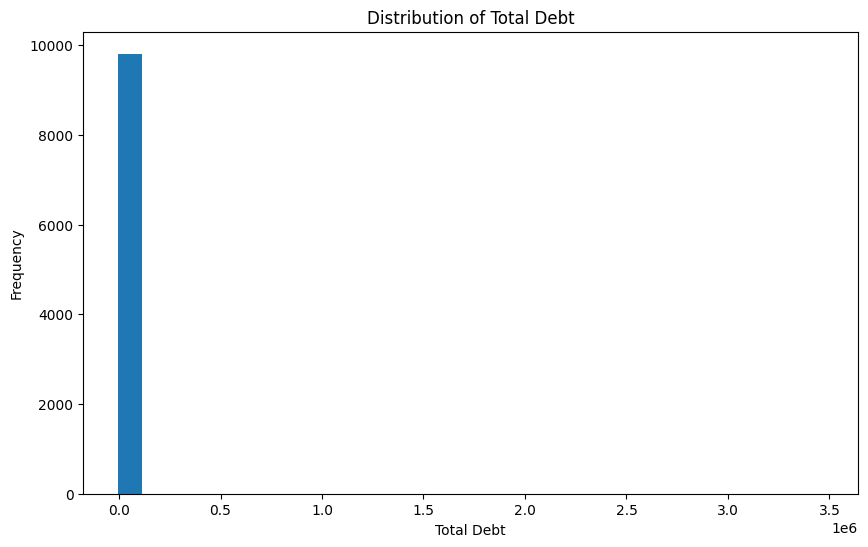

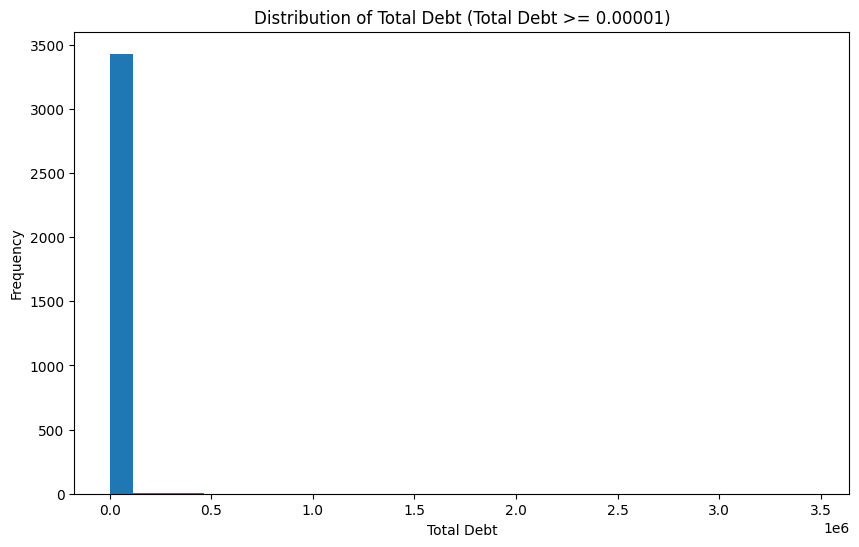

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics for 'Total Debt'
total_debt_stats19 = df19['Total Debt'].describe()
print("Summary Statistics for Total Debt:")
print(total_debt_stats19)

# Calculate the mean of total debt within the 45th to 55th percentile
lower_percentile19 = df19['Total Debt'].quantile(0.45)
upper_percentile19 = df19['Total Debt'].quantile(0.55)
filtered_df19 = df19[(df19['Total Debt'] >= lower_percentile19) & (df19['Total Debt'] <= upper_percentile19)]
mean_total_debt_within_percentile19 = filtered_df19['Total Debt'].mean()
print("\nMean of Total Debt within 45th-55th Percentile:", mean_total_debt_within_percentile19)

# Graph a distribution of Total Debt
plt.figure(figsize=(10, 6))
plt.hist(df19['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt')
plt.show()

# Graph another where Total Debt >= 0.00001
plt.figure(figsize=(10, 6))
plt.hist(df19[df19['Total Debt'] >= 0.00001]['Total Debt'], bins=30)
plt.xlabel('Total Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Total Debt (Total Debt >= 0.00001)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
means19 = []
summary19_1 = []

iszero = False
df19_nonzero = df19[df19['Total Debt'] >= 0.01]

for column in group1_19.columns:
  results = get_percentile_stats(df19, column, 'Total Debt', 0.45, 0.55)
  if results['Mean'] < 0.001:
    iszero = True
    break

if iszero:
  for column in group1_19.columns:
    results = get_percentile_stats(df19_nonzero, column, 'Total Debt', 0.45, 0.55)
    means19.append(results['Mean'])
    summary19_1.append(results['Summary Statistics'])
else:
  for column in group1_19.columns:
    results = get_percentile_stats(df19, column, 'Total Debt', 0.45, 0.55)
    means19.append(results['Mean'])
    summary19_1.append(results['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means, labels=group1_19.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 1')
plt.show()



ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>

In [ ]:
#summary stats
print("Summary Statistics for Class 1:")
summary19_table1 = pd.DataFrame(summary19_1, index=group1_19.columns)
summary19_table1

In [ ]:
means19_2 = []
summary19_2 = []

iszero_2 = False

for column in group2_19.columns:
  results_2 = get_percentile_stats(df19, column, 'Total Debt', 0.45, 0.55)
  if results_2['Mean'] < 0.01:
    iszero_2 = True
    break

if iszero_2:
  for column in group2_19.columns:
    results_2 = get_percentile_stats(df19_nonzero, column, 'Total Debt', 0.45, 0.55)
    means19_2.append(results_2['Mean'])
    summary19_2.append(results_2['Summary Statistics'])
else:
  for column in group2_19.columns:
    results_2 = get_percentile_stats(df19, column, 'Total Debt', 0.45, 0.55)
    means19_2.append(results_2['Mean'])
    summary19_2.append(results_2['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means19_2, labels=group2_19.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 2')
plt.show()

In [ ]:
#summary stats
print("Summary Statistics for Class 1:")
summary19_table2 = pd.DataFrame(summary19_2, index=group2_19.columns)
summary19_table2

In [ ]:
means19_3 = []
summary19_3 = []

iszero_3 = False

for column in group3_19.columns:
  results_3 = get_percentile_stats(df19, column, 'Total Debt')
  if results_3['Mean'] < 0.01:
    iszero_3 = True

if iszero_3:
  for column in group3_19.columns:
    results_3 = get_percentile_stats(df19_nonzero, column, 'Total Debt')
    means19_3.append(results_3['Mean'])
    summary19_3.append(results_3['Summary Statistics'])
else:
  for column in group3_19.columns:
    results_3 = get_percentile_stats(df19, column, 'Total Debt')
    means19_3.append(results_3['Mean'])
    summary19_3.append(results_3['Summary Statistics'])

#pie chart of median
plt.figure(figsize=(8, 8))
plt.pie(means19_3, labels=group3_19.columns, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Total Debt for Class 3')
plt.show()



#### Per Asset

In [ ]:
# prompt: a = divide_into_groups(df, 'Total Assets', 3)
# a
# for each group in a, display row count, and display total row count for df

a = divide_into_groups(df19, 'Total Assets', 3)

for i, group in enumerate(a):
  print(f"Group {i + 1}:")
  print(f"  Row Count: {len(group)}")
  print(f"  Total Row Count (df): {len(df)}")
  print("---")

Group 1:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 2:
  Row Count: 3274
  Total Row Count (df): 9821
---
Group 3:
  Row Count: 3273
  Total Row Count (df): 9821
---


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



For Group 1
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


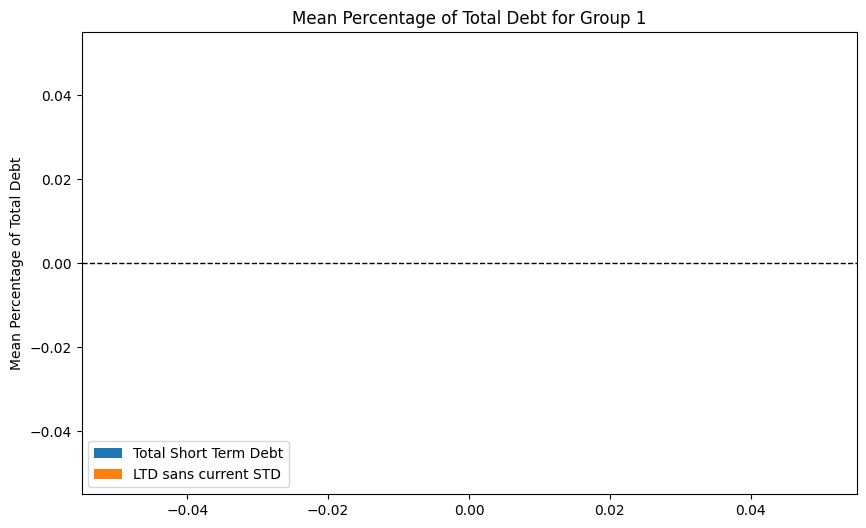

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 2
Initial Means: [nan, nan]
Total Mean: nan
Difference to be added: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan]
Means after setting negatives to 0: [nan, nan]
Normalized Means: [nan, nan]


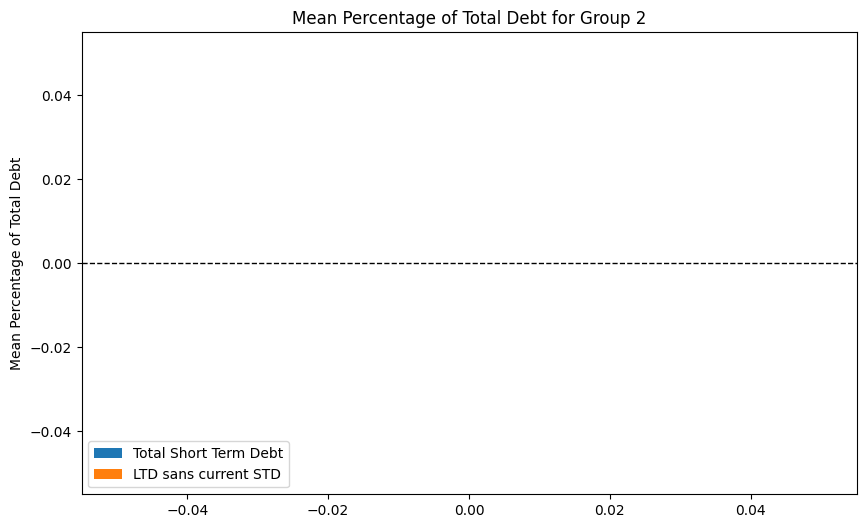

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count  mean  std  min  25%  50%  75%  max
Total Short Term Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LTD sans current STD     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                       Modified Means
Total Short Term Debt             NaN
LTD sans current STD              NaN

For Group 3
Initial Means: [20.354322932139844, 79.64567718989363]
Total Mean: 100.00000012203347
Difference to be added: -1.220334695517522e-07
Total Mean after adjustments: 100.00000012203347
Means before setting negatives to 0: [20.354322932139844, 79.64567718989363]
Means after setting negatives to 0: [20.354322932139844, 79.64567718989363]
Normalized Means: [20.354322907300755, 79.64567709269926]


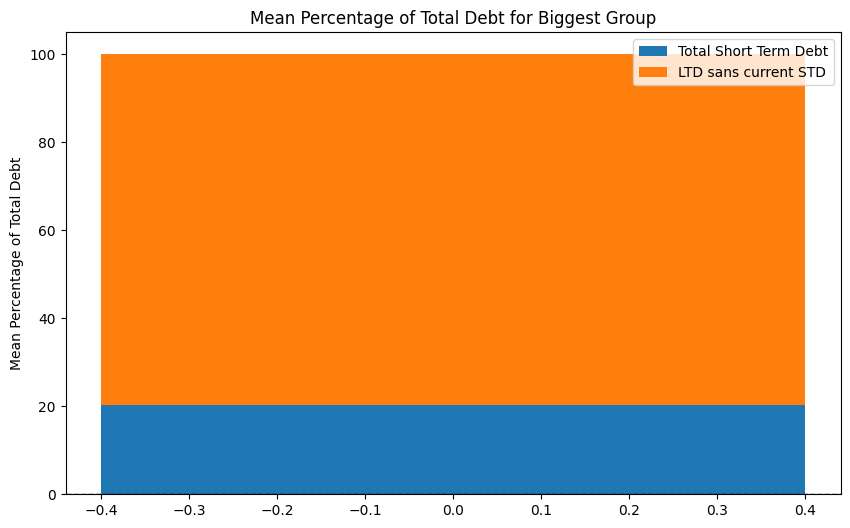

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count       mean        std  min        25%        50%  \
Total Short Term Debt  327.0  20.354323  30.715812  0.0   0.000000   4.494565   
LTD sans current STD   327.0  79.645677  30.715812  0.0  72.307604  95.505435   

                              75%    max  
Total Short Term Debt   27.692396  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.00000000000001
                       Modified Means
Total Short Term Debt       20.354323
LTD sans current STD        79.645677


Total Short Term Debt  LTD sans current STD
Group                                             
1                        NaN                   NaN
2                        NaN                   NaN
3                  20.354323             79.645677

In [ ]:
analyze(df19, class_1_19, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Total Other Debt: nan
After modification - Means for Total Other Debt: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan, nan, nan]
Means after setting negatives to 0: [nan, nan, nan, nan]
Normalized Means: [nan, nan, nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


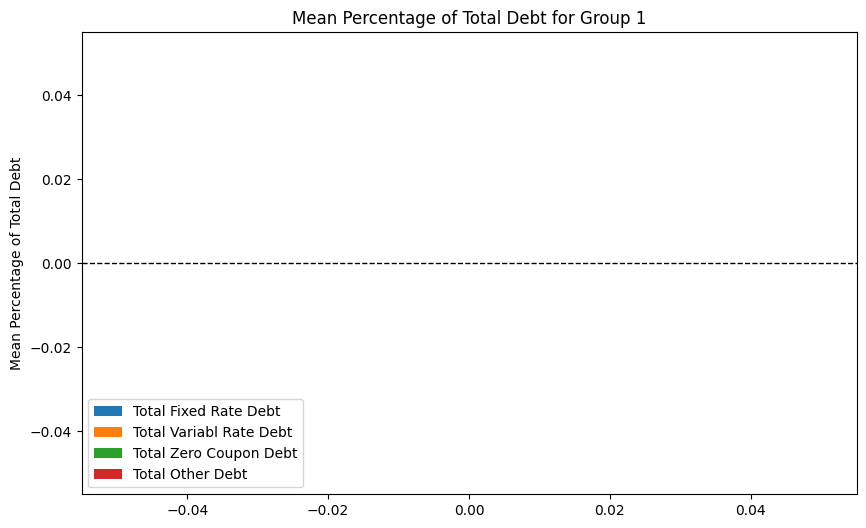

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 1:
                         count  mean  std  min  25%  50%  75%  max
Total Fixed Rate Debt      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Variabl Rate Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Zero Coupon Debt     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Other Debt           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                         Modified Means
Total Fixed Rate Debt               NaN
Total Variabl Rate Debt             NaN
Total Zero Coupon Debt              NaN
Total Other Debt                    NaN

For Group 2
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Total Other Debt: nan
After modification - Means for Total Other Debt: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [n

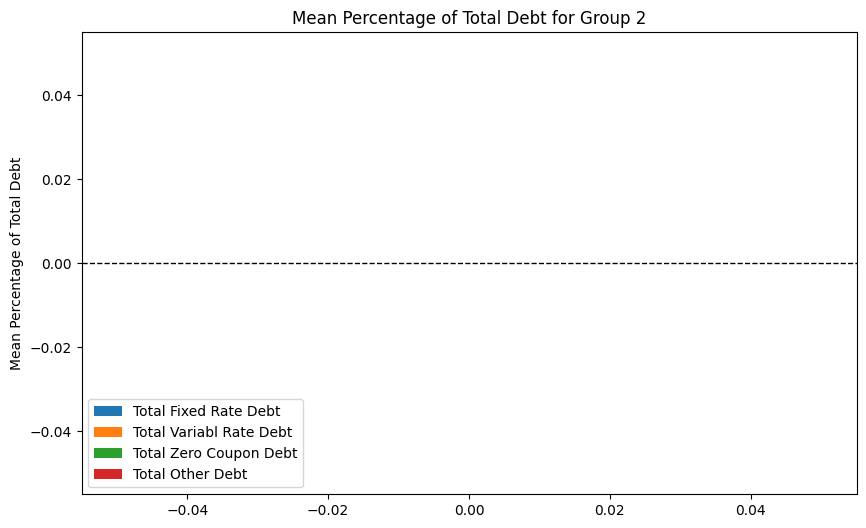

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 2:
                         count  mean  std  min  25%  50%  75%  max
Total Fixed Rate Debt      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Variabl Rate Debt    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Zero Coupon Debt     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Other Debt           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                         Modified Means
Total Fixed Rate Debt               NaN
Total Variabl Rate Debt             NaN
Total Zero Coupon Debt              NaN
Total Other Debt                    NaN

For Group 3
Initial Means: [38.71099510508812, 58.48215913373617, 0.18130051160078509, -1.6072569498577447]
Total Mean: 95.76719780056733
Difference to be added: 4.232802199432669
Before modification - Means for Total Other Debt: -1.6072569498577447
After modification - M

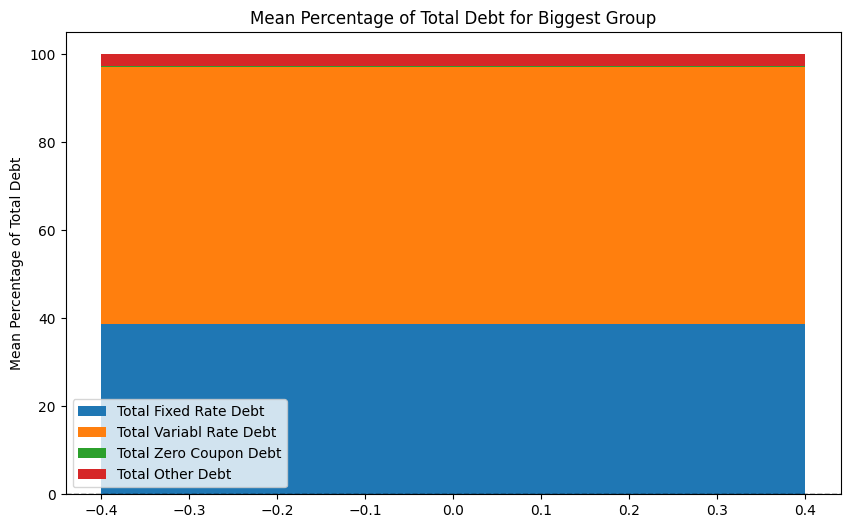

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 3:
                         count       mean        std         min       25%  \
Total Fixed Rate Debt    327.0  38.710995  44.257493    0.000000  0.000000   
Total Variabl Rate Debt  327.0  58.482159  57.502174    0.000000  7.828520   
Total Zero Coupon Debt   327.0   0.181301   1.884075    0.000000  0.000000   
Total Other Debt         327.0  -1.607257  39.385535 -663.124687 -1.715102   

                               50%         75%         max  
Total Fixed Rate Debt    14.348602   84.618302  134.725497  
Total Variabl Rate Debt  60.979608  100.000000  763.124687  
Total Zero Coupon Debt    0.000000    0.000000   26.033223  
Total Other Debt         -0.069045    0.000000  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         38.710995
Total Variabl Rate Debt       

Total Fixed Rate Debt  Total Variabl Rate Debt  Total Zero Coupon Debt  \
Group                                                                           
1                        NaN                      NaN                     NaN   
2                        NaN                      NaN                     NaN   
3                  38.710995                58.482159                0.181301   

       Total Other Debt  
Group                    
1                   NaN  
2                   NaN  
3              2.625545

In [ ]:
analyze(df19, class_2_19, 'Total Assets', 3)


For Group 1
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Short term and other: nan
After modification - Means for Short term and other: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan, nan, nan]
Means after setting negatives to 0: [nan, nan, nan, nan]
Normalized Means: [nan, nan, nan, nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


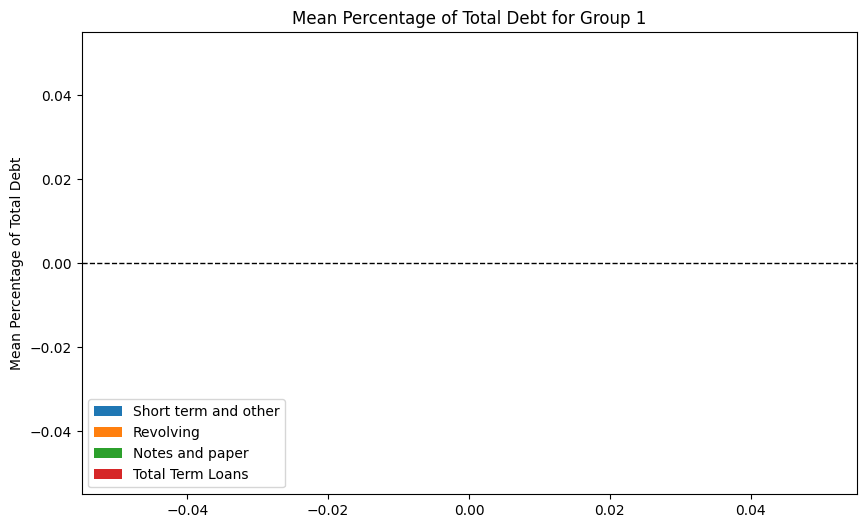

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 1:
                      count  mean  std  min  25%  50%  75%  max
Short term and other    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Revolving               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Notes and paper         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Term Loans        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                      Modified Means
Short term and other             NaN
Revolving                        NaN
Notes and paper                  NaN
Total Term Loans                 NaN

For Group 2
Initial Means: [nan, nan, nan, nan]
Total Mean: nan
Difference to be added: nan
Before modification - Means for Short term and other: nan
After modification - Means for Short term and other: nan
Total Mean after adjustments: nan
Means before setting negatives to 0: [nan, nan, nan, nan]
Means after setting negat

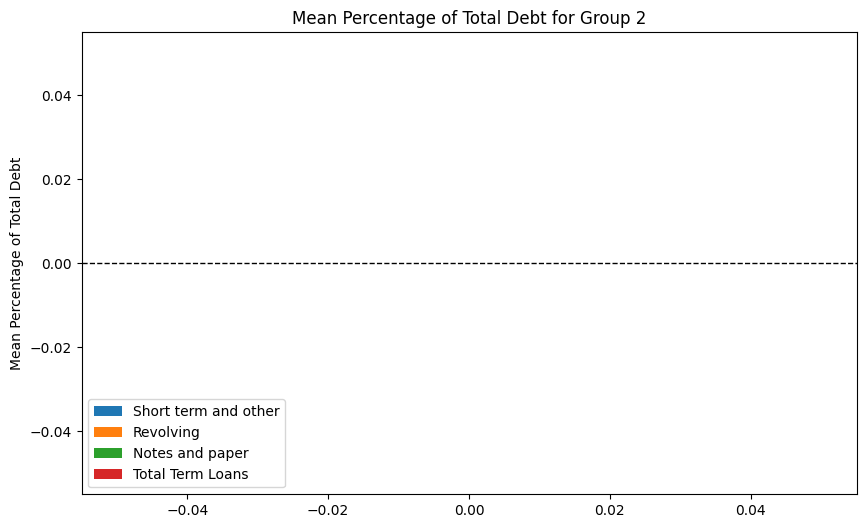

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 2:
                      count  mean  std  min  25%  50%  75%  max
Short term and other    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Revolving               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Notes and paper         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total Term Loans        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

Sum of the means: nan
                      Modified Means
Short term and other             NaN
Revolving                        NaN
Notes and paper                  NaN
Total Term Loans                 NaN

For Group 3
Initial Means: [8.868469007112395, 21.899827134831064, 31.073646927922752, 39.87941259400535]
Total Mean: 101.72135566387156
Difference to be added: -1.721355663871563
Before modification - Means for Short term and other: 8.868469007112395
After modification - Means for Short term and other: 7.147113343240832
T

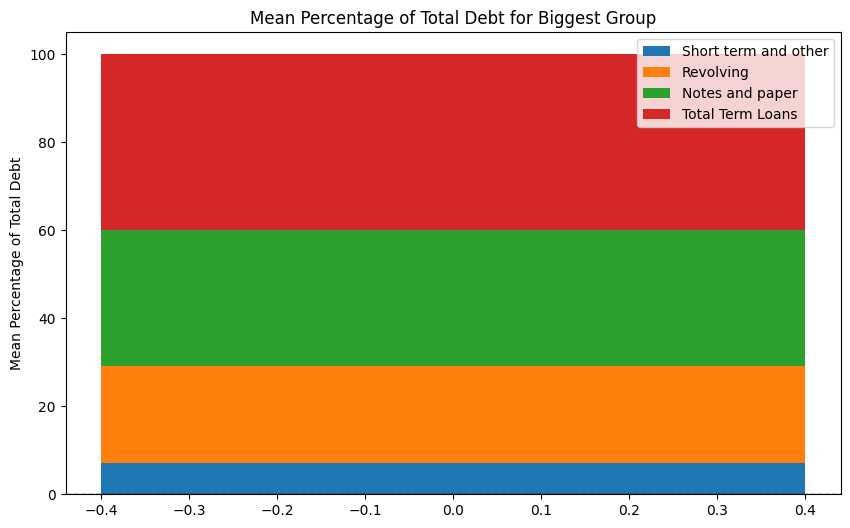

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 3:
                      count       mean        std        min  25%        50%  \
Short term and other  327.0   8.868469  20.042380 -66.360716  0.0   0.474675   
Revolving             327.0  21.899827  36.002024   0.000000  0.0   0.000000   
Notes and paper       327.0  31.073647  54.334530   0.000000  0.0   0.000000   
Total Term Loans      327.0  39.879413  41.872367   0.000000  0.0  22.340278   

                            75%         max  
Short term and other   7.744492  100.000000  
Revolving             33.326643  102.538289  
Notes and paper       58.070305  660.287073  
Total Term Loans      86.685579  133.983218  

Sum of the means: 100.0
                      Modified Means
Short term and other        7.147113
Revolving                  21.899827
Notes and paper            31.073647
Total Term Loans           39.879413


Short term and other  Revolving  Notes and paper  Total Term Loans
Group                                                                    
1                       NaN        NaN              NaN               NaN
2                       NaN        NaN              NaN               NaN
3                  7.147113  21.899827        31.073647         39.879413

In [ ]:
analyze(df19, class_3_19, 'Total Assets', 3)

#### Nonzero

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



For Group 1
Initial Means: [69.53820791052321, 30.461792089476784]
Total Mean: 100.0
Total Mean after adjustments: 100.0


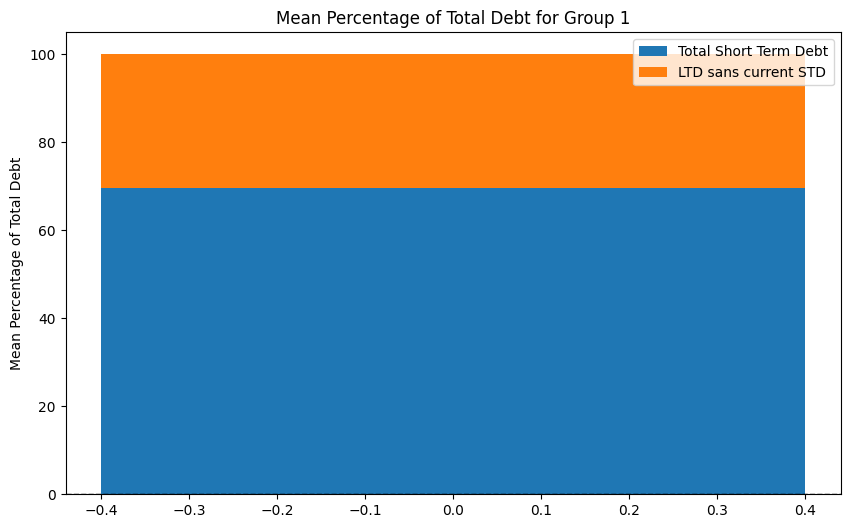

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 1:
                       count       mean        std        min        25%  \
Total Short Term Debt  115.0  69.538208  39.778365   0.000000  34.911006   
LTD sans current STD   115.0  30.461792  39.778365 -12.126601   0.000000   

                             50%         75%         max  
Total Short Term Debt  99.022549  100.000000  112.126601  
LTD sans current STD    0.977451   65.088994  100.000000  

Sum of the means: 100.0

For Group 2
Initial Means: [17.89516213942286, 82.10483794950504]
Total Mean: 100.0000000889279
Difference to be added: -8.892790503978176e-08
Total Mean after adjustments: 100.0000000889279
Means before setting negatives to 0: [17.89516213942286, 82.10483794950504]
Means after setting negatives to 0: [17.89516213942286, 82.10483794950504]
Normalized Means: [17.89516212350907, 82.10483787649093]


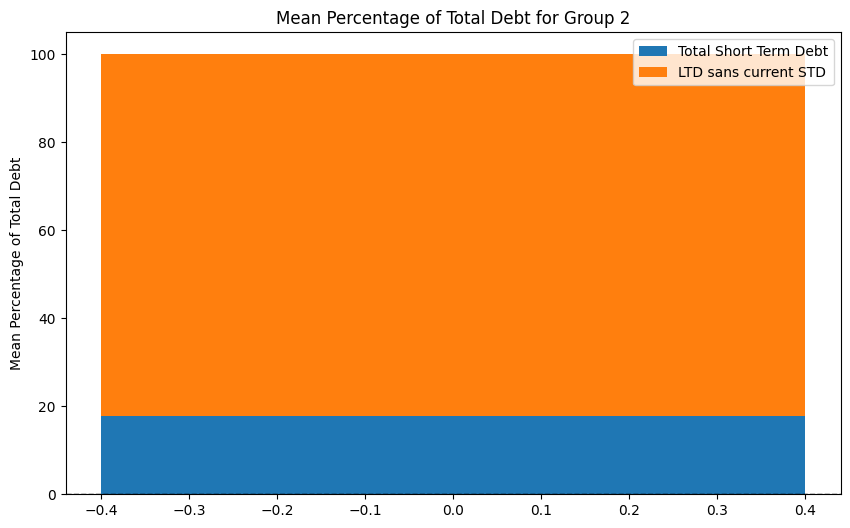

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 2:
                       count       mean        std  min        25%       50%  \
Total Short Term Debt  115.0  17.895162  28.184311  0.0   0.000000   3.98077   
LTD sans current STD   115.0  82.104838  28.184311  0.0  79.731903  96.01923   

                              75%    max  
Total Short Term Debt   20.268097  100.0  
LTD sans current STD   100.000000  100.0  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt       17.895162
LTD sans current STD        82.104838

For Group 3
Initial Means: [11.906665243201216, 88.09333456684021]
Total Mean: 99.99999981004143
Difference to be added: 1.899585697628936e-07
Total Mean after adjustments: 99.99999981004143
Means before setting negatives to 0: [11.906665243201216, 88.09333456684021]
Means after setting negatives to 0: [11.906665243201216, 88.09333456684021]
Normalized Means: [11.906665265818948, 

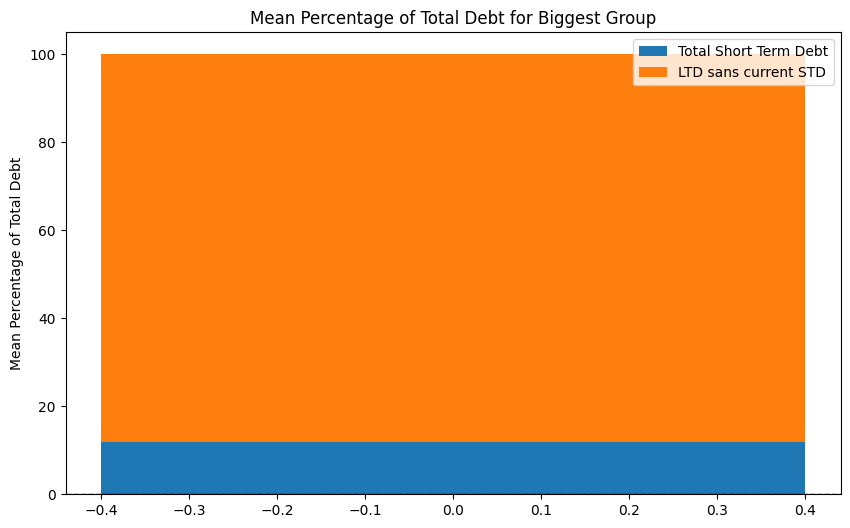

Summary Statistics for Index(['Total Short Term Debt', 'LTD sans current STD'], dtype='object') - Group 3:
                       count       mean        std       min        25%  \
Total Short Term Debt  114.0  11.906665  20.282391  0.000000   0.243386   
LTD sans current STD   114.0  88.093335  20.282391  6.587368  85.885999   

                             50%        75%         max  
Total Short Term Debt   2.442211  14.114001   93.412632  
LTD sans current STD   97.557789  99.756614  100.000000  

Sum of the means: 100.0
                       Modified Means
Total Short Term Debt       11.906665
LTD sans current STD        88.093335


In [ ]:
c1 = analyze(df19_nonzero, class_1_19, 'Total Assets', 3)


For Group 1
Initial Means: [63.07016316918928, 21.573834009498732, 4.361931370597379, 17.803837828287566]
Total Mean: 106.80976637757296
Difference to be added: -6.809766377572956
Before modification - Means for Total Other Debt: 17.803837828287566
After modification - Means for Total Other Debt: 10.99407145071461
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


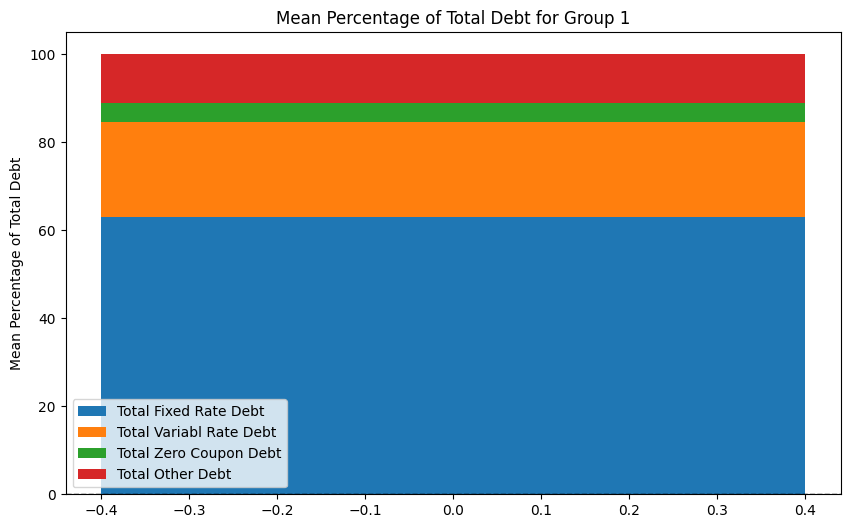

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 1:
                         count       mean        std         min       25%  \
Total Fixed Rate Debt    115.0  63.070163  59.087491    0.000000  6.582182   
Total Variabl Rate Debt  115.0  21.573834  34.586256    0.000000  0.000000   
Total Zero Coupon Debt   115.0   4.361931  16.747324    0.000000  0.000000   
Total Other Debt         115.0  17.803838  45.754537 -292.366693 -0.000023   

                               50%        75%         max  
Total Fixed Rate Debt    66.836734  99.748584  391.805736  
Total Variabl Rate Debt   0.000000  30.930944  101.214985  
Total Zero Coupon Debt    0.000000   0.000000  111.606511  
Total Other Debt          3.666097  40.366528  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         63.070163
Total Variabl Rate Debt       21.57

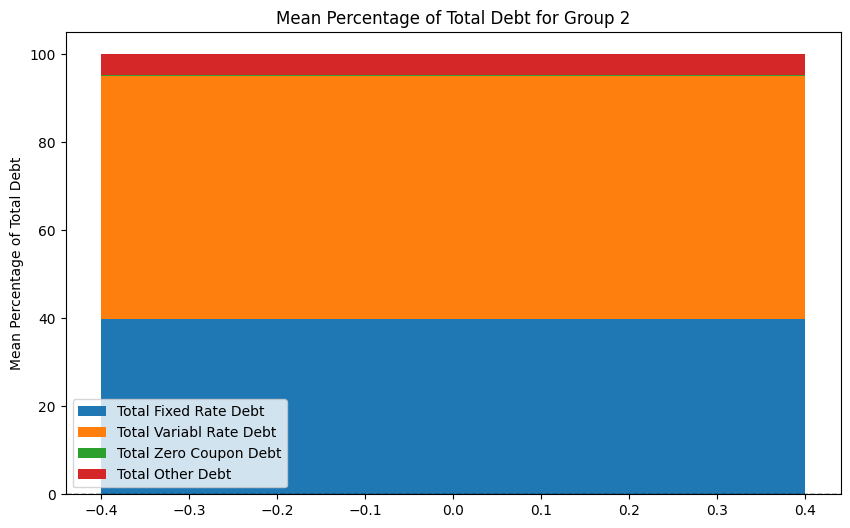

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 2:
                         count       mean        std        min       25%  \
Total Fixed Rate Debt    115.0  39.897853  44.945951   0.000000  0.000000   
Total Variabl Rate Debt  115.0  55.260559  42.181402   0.000000  7.828520   
Total Zero Coupon Debt   115.0   0.185301   1.981471   0.000000  0.000000   
Total Other Debt         115.0   0.040745  16.834108 -34.725497 -1.874172   

                               50%         75%         max  
Total Fixed Rate Debt    16.348081   86.146615  134.725497  
Total Variabl Rate Debt  58.837799  100.000000  111.304042  
Total Zero Coupon Debt    0.000000    0.000000   21.249358  
Total Other Debt         -0.060135    0.001760  100.000000  

Sum of the means: 100.0
                         Modified Means
Total Fixed Rate Debt         39.897853
Total Variabl Rate Debt       55.26

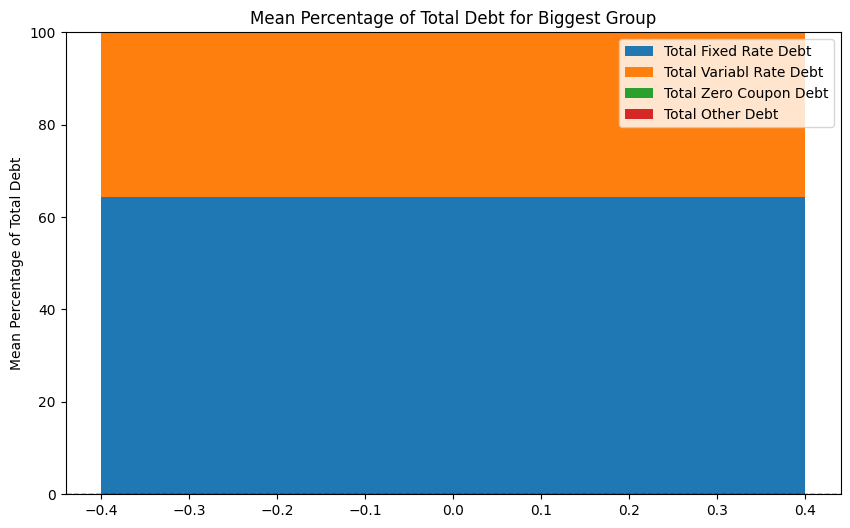

Summary Statistics for Index(['Total Fixed Rate Debt', 'Total Variabl Rate Debt',
       'Total Zero Coupon Debt', 'Total Other Debt'],
      dtype='object') - Group 3:
                         count       mean        std         min        25%  \
Total Fixed Rate Debt    114.0  65.791000  69.428923    0.000000  34.669053   
Total Variabl Rate Debt  114.0  36.440818  33.117676    0.000000   6.104178   
Total Zero Coupon Debt   114.0   0.034122   0.338059    0.000000   0.000000   
Total Other Debt         114.0  -6.668686  79.509166 -843.261453  -1.157979   

                               50%        75%         max  
Total Fixed Rate Debt    66.736932  88.654978  713.179574  
Total Variabl Rate Debt  26.218542  61.847360  110.754464  
Total Zero Coupon Debt    0.000000   0.000000    3.602945  
Total Other Debt         -0.618510   0.328127   59.778447  

Sum of the means: 100.00000000000001
                         Modified Means
Total Fixed Rate Debt         64.333248
Total Variabl Rat

In [ ]:
c2 = analyze(df19_nonzero, class_2_19, 'Total Assets', 3)


For Group 1
Initial Means: [37.45929512336818, 8.497188716811962, 29.85664160977423, 27.7467090442163]
Total Mean: 103.55983449417067
Difference to be added: -3.5598344941706728
Before modification - Means for Short term and other: 37.45929512336818
After modification - Means for Short term and other: 33.899460629197506
Total Mean after adjustments: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


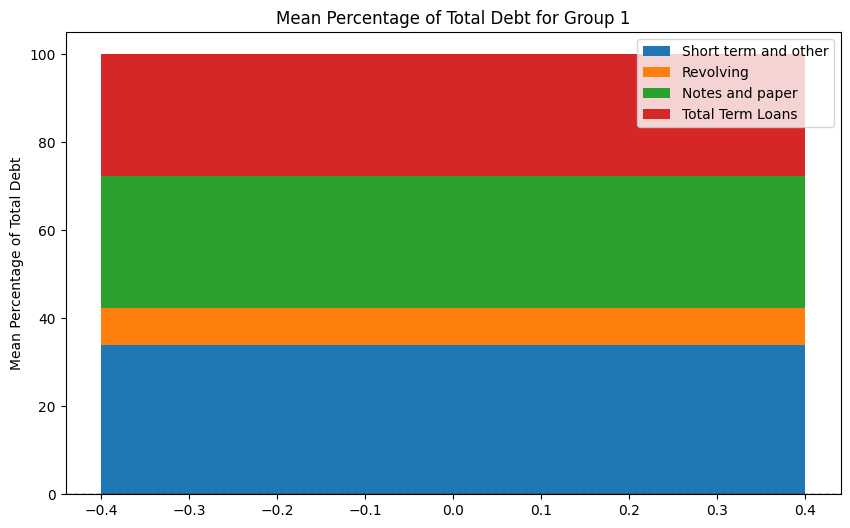

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 1:
                      count       mean        std        min       25%  \
Short term and other  115.0  37.459295  37.379216 -35.671133  1.675819   
Revolving             115.0   8.497189  25.254916   0.000000  0.000000   
Notes and paper       115.0  29.856642  56.298743   0.000000  0.000000   
Total Term Loans      115.0  27.746709  38.034822   0.000000  0.000000   

                            50%        75%         max  
Short term and other  33.333333  68.964725  100.000000  
Revolving              0.000000   0.000000  102.079018  
Notes and paper        1.674711  43.340729  391.805736  
Total Term Loans       0.387426  50.557804  113.086012  

Sum of the means: 100.0
                      Modified Means
Short term and other       33.899461
Revolving                   8.497189
Notes and paper            29.856642
Total Term Loans        

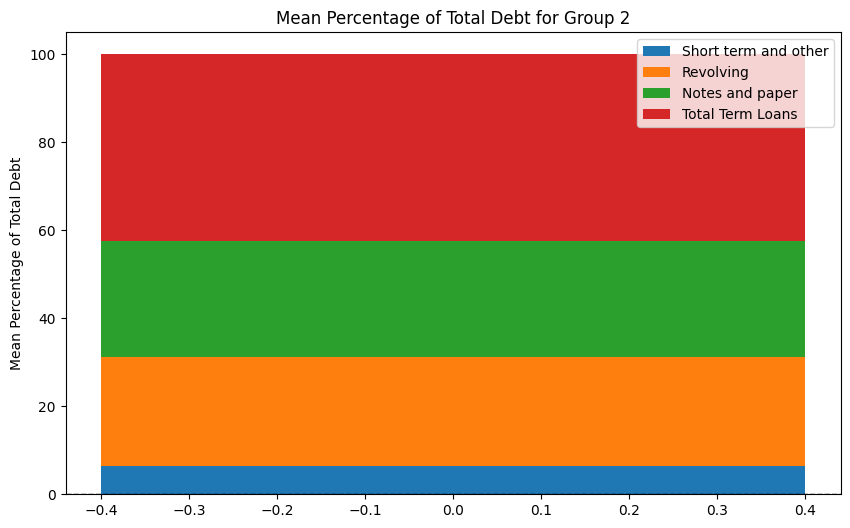

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 2:
                      count       mean        std      min  25%        50%  \
Short term and other  115.0   8.783514  20.001869 -1.00415  0.0   0.000000   
Revolving             115.0  24.753990  38.035367  0.00000  0.0   0.000000   
Notes and paper       115.0  26.289472  41.358769  0.00000  0.0   0.000000   
Total Term Loans      115.0  42.513621  43.588681  0.00000  0.0  35.987628   

                            75%         max  
Short term and other   5.391388  100.000000  
Revolving             43.963275  101.158963  
Notes and paper       44.985739  134.725497  
Total Term Loans      93.238494  133.983218  

Sum of the means: 100.0
                      Modified Means
Short term and other        6.442918
Revolving                  24.753990
Notes and paper            26.289472
Total Term Loans           42.513621

For Group 3
Initial M

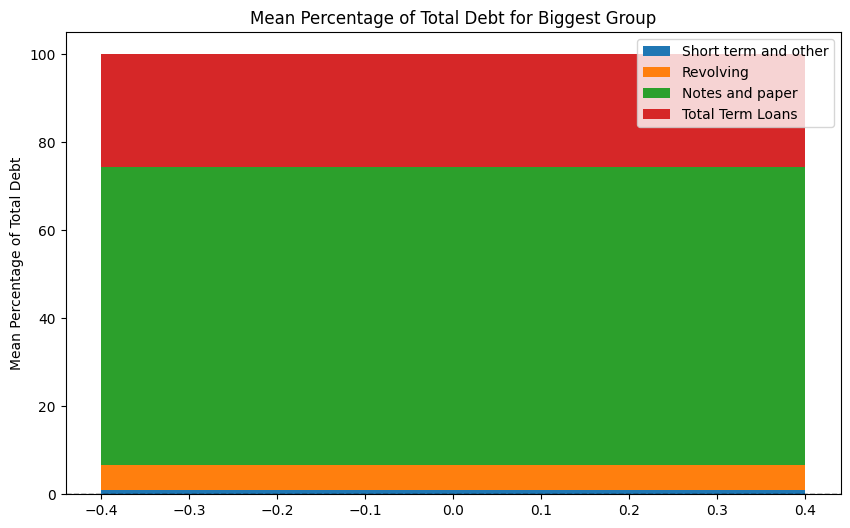

Summary Statistics for Index(['Short term and other', 'Revolving', 'Notes and paper',
       'Total Term Loans'],
      dtype='object') - Group 3:
                      count       mean        std        min        25%  \
Short term and other  114.0   3.845760  10.969027 -62.287621   0.000000   
Revolving             114.0   5.670646  11.634656   0.000000   0.000000   
Notes and paper       114.0  67.559349  72.049720   0.000000  35.413312   
Total Term Loans      114.0  25.724043  31.187813   0.000000   0.000000   

                            50%        75%         max  
Short term and other   1.019005   4.543592   51.091691  
Revolving              0.000000   5.190683   61.395094  
Notes and paper       68.179955  92.153739  742.176781  
Total Term Loans      10.988001  45.438261  114.994229  

Sum of the means: 100.0
                      Modified Means
Short term and other        1.045962
Revolving                   5.670646
Notes and paper            67.559349
Total Term Loans   

In [ ]:
c3 = analyze(df19_nonzero, class_3_19, 'Total Assets', 3)

#### Combined visual

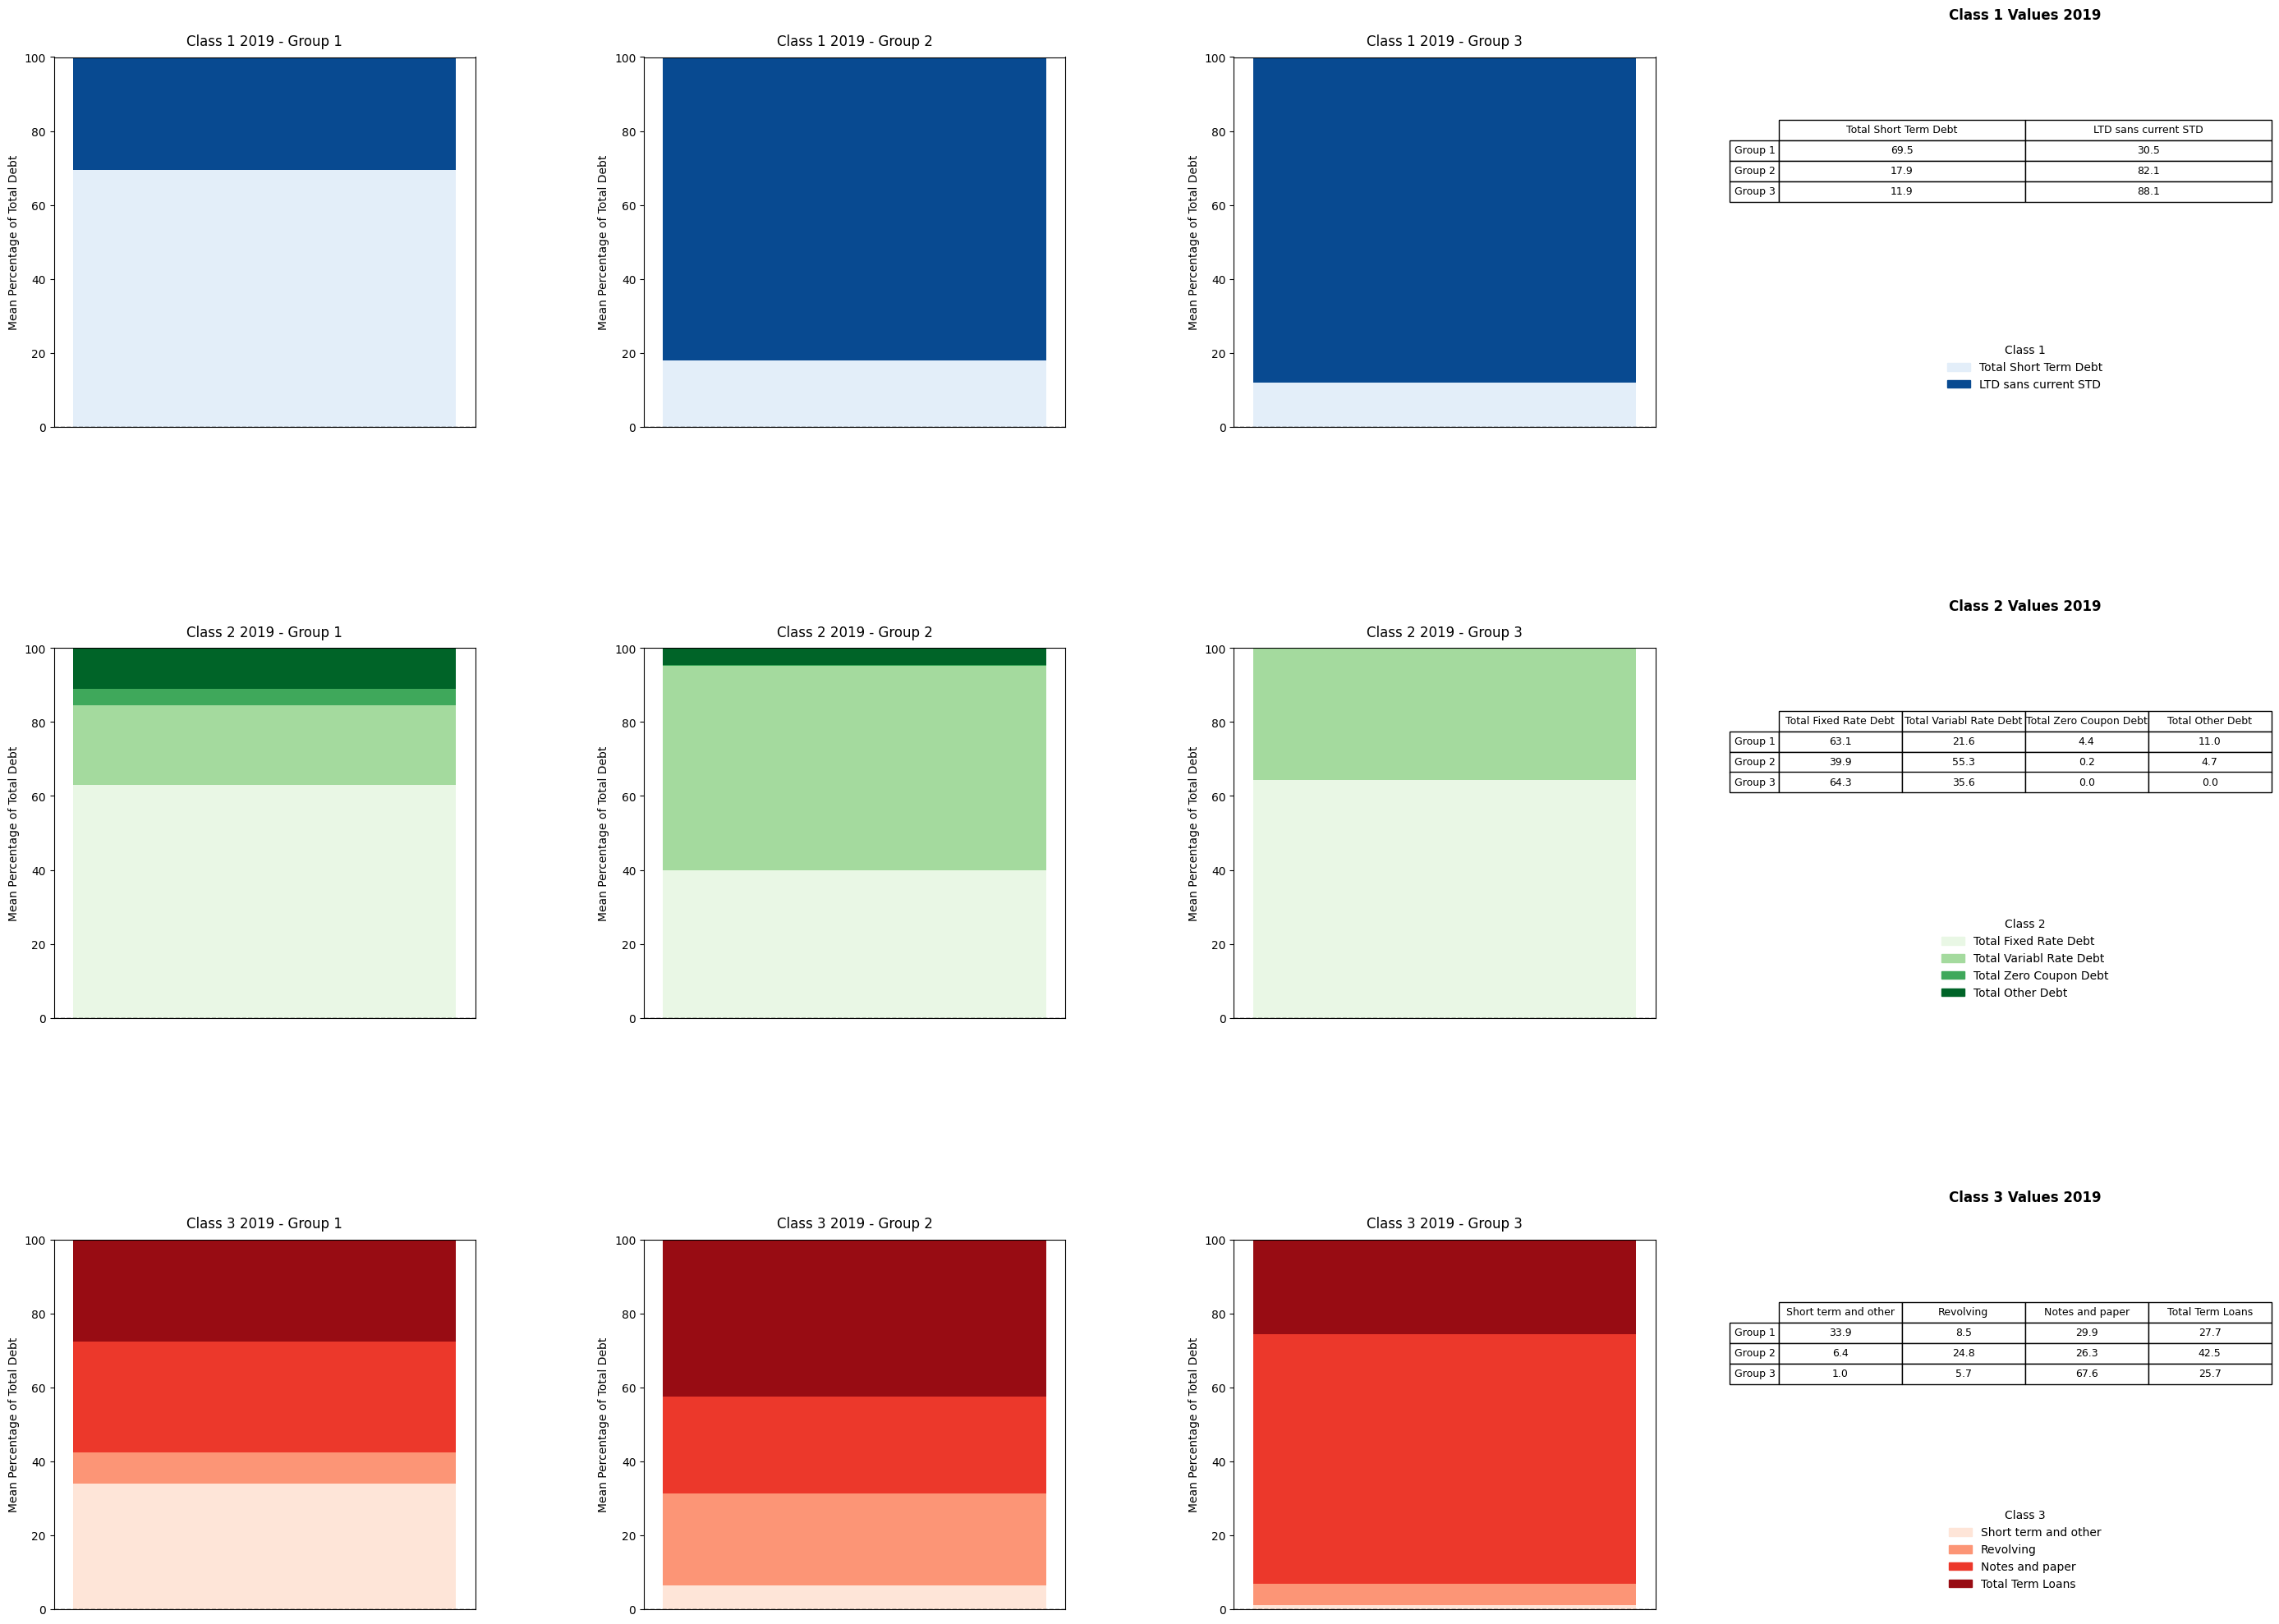

In [ ]:

import matplotlib.patches as mpatches


# Nice color palettes for consistency
colors_class1 = plt.cm.Blues(np.linspace(0.1, 0.9, len(class_1)))
colors_class2 = plt.cm.Greens(np.linspace(0.1, 0.9, len(class_2)))
colors_class3 = plt.cm.Reds(np.linspace(0.1, 0.9, len(class_3)))

combined_data = [c1, c2, c3]  # Combined data for ease of loop
colors_combined = [colors_class1, colors_class2, colors_class3]  # Corresponding colors
group_names = ['Class 1', 'Class 2', 'Class 3']  # Group names


#create grid
fig, axes = plt.subplots(3, 3, figsize=(30, 21))

fig.subplots_adjust(left=0.05, right=0.7, bottom=0.05, top=0.95, hspace=0.6, wspace = 0.4)

legend_handles = [[], [], []]


# Loop through each dataset (a1, a2, a3)
for i, (data, group_name, colors) in enumerate(zip(combined_data, group_names, colors_combined)):

    # Iterate through each row in the dataset
    for j in range(3):
        ax = axes[i, j]  # Access the correct subplot (3x3 grid)
        row_data = data.iloc[j].values  # Extract values for the j-th row of the i-th dataset
        bottom = 0  # Initialize bottom for stacking

        # Plot the stacked bars for the current row
        for k, value in enumerate(row_data):
            height = value
            ax.bar(0, height, bottom=bottom, color=colors[k], label=data.columns[k] if j == 0 else "")

            bottom += height

        ax.set_title(f'{group_name} 2019 - Group {j + 1}', pad=10)
        ax.set_ylabel('Mean Percentage of Total Debt')
        ax.set_xticks([])  # No x-ticks needed
        ax.axhline(0, color='black', linewidth=1, linestyle='--')  # Horizontal line at y=0
        ax.set_ylim(0, 100)  # Set y-axis limits to go from 0 to 100

        # Collect legend handles only for the first plot in each row (i.e., j == 0)
        if j == 0:
            for k in range(len(row_data)):
                legend_handles[i].append(mpatches.Patch(color=colors[k], label=data.columns[k]))

legend_ax = fig.add_axes([0.75, 0.1, 0.2, 0.8])
legend_ax.axis('off')

number_of_subplots = 3  # For each class
table_height = 0.12
legend_height = 0.06
legend_spacing = 0.03  # Reduced spacing between table and legend

# Calculate alignments for the top of each subplot
alignments_top_subplots = [ax.get_position().y1 for ax in axes[:,0]]

for i,(data ,group_name)in enumerate(zip(combined_data ,group_names)):
    # Table position aligned with subplot title
    table_pos=[ .75 ,alignments_top_subplots[i]-table_height , .2 ,table_height ]

    # Add table
    table_ax=fig.add_axes(table_pos)
    table_ax.axis('off')
    table=table_ax.table(cellText=data.values.round(1),colLabels=data.columns,rowLabels=[f'Group {j+1}'for j in range(3)],cellLoc='center',loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.,1.5)
    table_ax.set_title(f'{group_name} Values 2019',fontweight='bold', y=1.15) # Align table title with subplot title

    # Legend position directly below each table
    legend_pos = [0.75, table_pos[1] - legend_height - legend_spacing, 0.2, legend_height]

    legend_ax=fig.add_axes(legend_pos)
    legend_ax.axis('off')
    legend_ax.legend(handles=legend_handles[i],loc='center',title=group_name ,frameon=False)

plt.show()

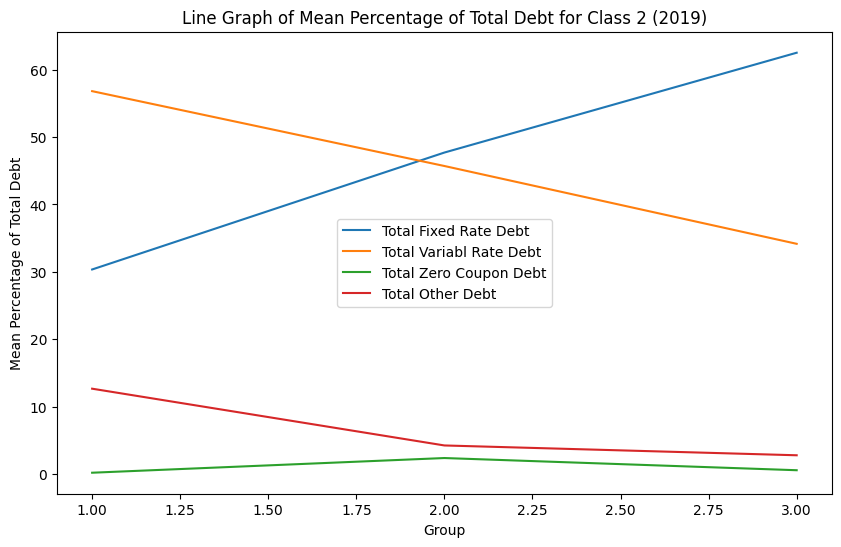

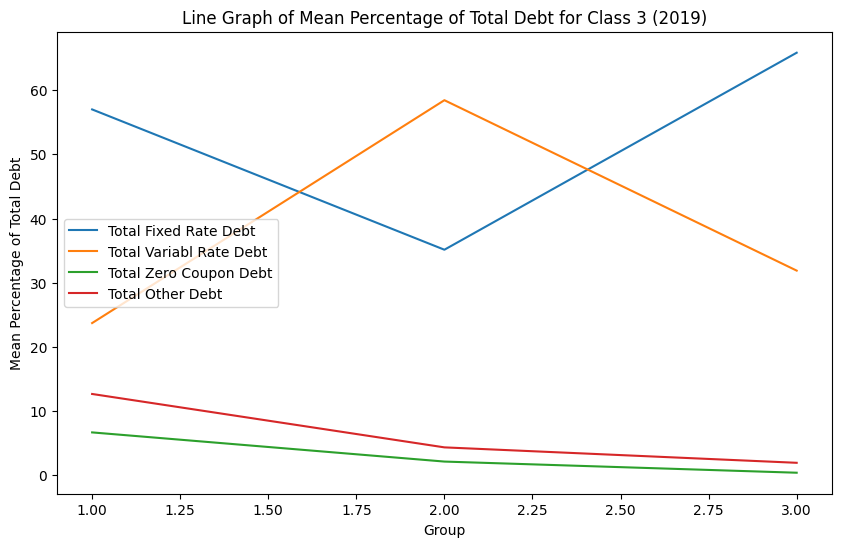

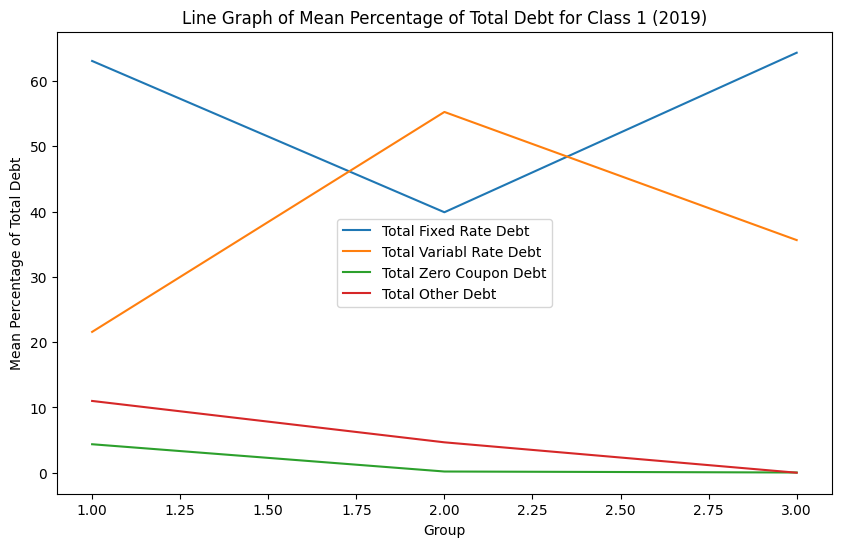

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in a2.columns:
    plt.plot(a2.index, a2[column], label=column)
plt.xlabel("Group")
plt.ylabel("Mean Percentage of Total Debt")
plt.title("Line Graph of Mean Percentage of Total Debt for Class 2 (2019)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for column in b2.columns:
    plt.plot(b2.index, b2[column], label=column)
plt.xlabel("Group")
plt.ylabel("Mean Percentage of Total Debt")
plt.title("Line Graph of Mean Percentage of Total Debt for Class 3 (2019)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for column in c2.columns:
    plt.plot(c2.index, c2[column], label=column)
plt.xlabel("Group")
plt.ylabel("Mean Percentage of Total Debt")
plt.title("Line Graph of Mean Percentage of Total Debt for Class 1 (2019)")
plt.legend()
plt.show()

#Part 4: Common companies

In [ ]:
# Find common symbols across all three DataFrames
common_symbols = list(set(df_nonzero['Symbol']) & set(df19_nonzero['Symbol']) & set(df21_nonzero['Symbol']))

# Filter each DataFrame to include only common symbols
df_filtered = df_nonzero[df_nonzero['Symbol'].isin(common_symbols)]
df19_filtered = df19_nonzero[df19_nonzero['Symbol'].isin(common_symbols)]
df21_filtered = df21_nonzero[df21_nonzero['Symbol'].isin(common_symbols)]

# Set 'Symbol' as the index for each DataFrame
df_filtered.set_index('Symbol', inplace=True)
df19_filtered.set_index('Symbol', inplace=True)
df21_filtered.set_index('Symbol', inplace=True)

# Rename columns to avoid duplicates
df19_filtered = df19_filtered.add_suffix('_2019')
df21_filtered = df21_filtered.add_suffix('_2021')

# Concatenate the DataFrames horizontally
df_combined = pd.concat([df_filtered, df19_filtered, df21_filtered], axis=1)

# Reset the index to make 'Symbol' a column again
df_combined.reset_index(inplace=True)

In [ ]:
df_combined.describe()

Total Short Term Debt  LTD sans current STD  Total Fixed Rate Debt  \
count            2236.000000          2.236000e+03           2.236000e+03   
mean             1442.807078          8.024878e+03           5.088042e+03   
std             17719.634210          1.137964e+05           6.768267e+04   
min                 0.000000          0.000000e+00           0.000000e+00   
25%                 0.000000          9.873050e+01           2.222808e+00   
50%                16.200000          6.380000e+02           3.500000e+02   
75%               250.000250          2.999705e+03           2.114220e+03   
max            439975.000000          4.206359e+06           3.147982e+06   

       Total Variabl Rate Debt  Total Zero Coupon Debt  Total Other Debt  \
count             2.236000e+03             2236.000000      2.236000e+03   
mean              3.433181e+03               12.331640      1.937076e+03   
std               8.864985e+04              123.795189      8.672499e+04   
min               0.000000e+00                0.000000     -1.021775e+05   
25%               2.395000e-01                0.000000     -1.425625e+01   
50%               1.346685e+02                0.000000     -9.997500e-01   
75%               6.645828e+02                0.000000      9.848002e-01   
max               4.124902e+06             3271.000000      4.096347e+06   

       Short term and other     Revolving  Notes and paper  Total Term Loans  \
count           2236.000000   2236.000000     2.236000e+03      2.236000e+03   
mean             403.121840    126.594089     5.780238e+03      2.549520e+03   
std             3205.805904    474.905349     7.093614e+04      8.670097e+04   
min            -5904.000000      0.000000     0.000000e+00      0.000000e+00   
25%                0.000000      0.000000     0.000000e+00      0.000000e+00   
50%                2.292132      0.000000     3.317640e+02      2.900000e+01   
75%               70.824750     50.262500     2.200000e+03      4.156910e+02   
max           114243.000000  11012.560000     3.255054e+06      4.096347e+06   

       ...  Total Variabl Rate Debt_2021  Total Zero Coupon Debt_2021  \
count  ...                  2.236000e+03                  2236.000000   
mean   ...                  3.025426e+03                    15.681470   
std    ...                  8.518441e+04                   138.404356   
min    ...                  0.000000e+00                     0.000000   
25%    ...                  0.000000e+00                     0.000000   
50%    ...                  9.397350e+01                     0.000000   
75%    ...                  5.294008e+02                     0.000000   
max    ...                  4.004166e+06                  2635.000000   

       Total Other Debt_2021  Short term and other_2021  Revolving_2021  \
count           2.236000e+03                2236.000000     2236.000000   
mean            1.747209e+03                 270.608080      104.748445   
std             8.269238e+04                1869.745407      511.278510   
min            -8.466456e+04               -4669.000000        0.000000   
25%            -1.533975e+01                   0.000000        0.000000   
50%            -1.041000e+00                   1.663000        0.000000   
75%             1.016078e+00                  37.625000       30.400000   
max             3.908014e+06               46532.000000    14100.000000   

       Notes and paper_2021  Total Term Loans_2021  Total Debt_2021  \
count          2.236000e+03           2.236000e+03     2.236000e+03   
mean           5.215877e+03           2.287151e+03     8.221759e+03   
std            6.334385e+04           8.266274e+04     1.098824e+05   
min            0.000000e+00          -7.164300e+01     2.444400e-02   
25%            0.000000e+00           0.000000e+00     1.210513e+02   
50%            3.000000e+02           1.810000e+01     6.740260e+02   
75%            2.019892e+03           3.519604e+02     2.902705e+03   
max  

In [ ]:
# prompt: export df_combined to xlsx

from google.colab import files

df_combined.to_excel('df_combined.xlsx', index=False)
files.download('df_combined.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Variance

##Scatterplots

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


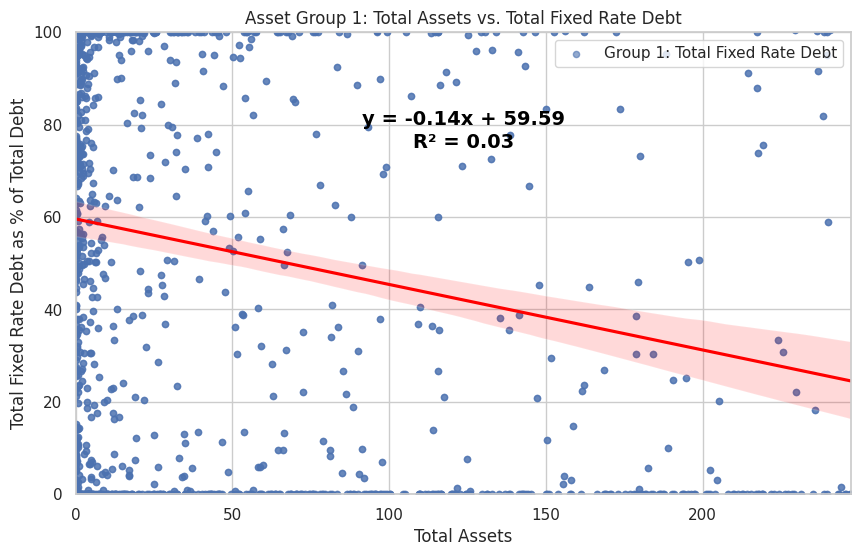

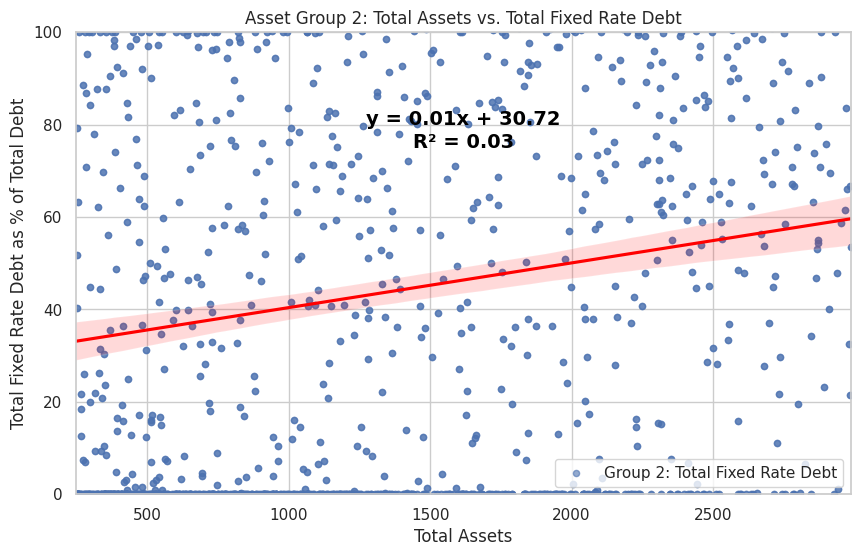

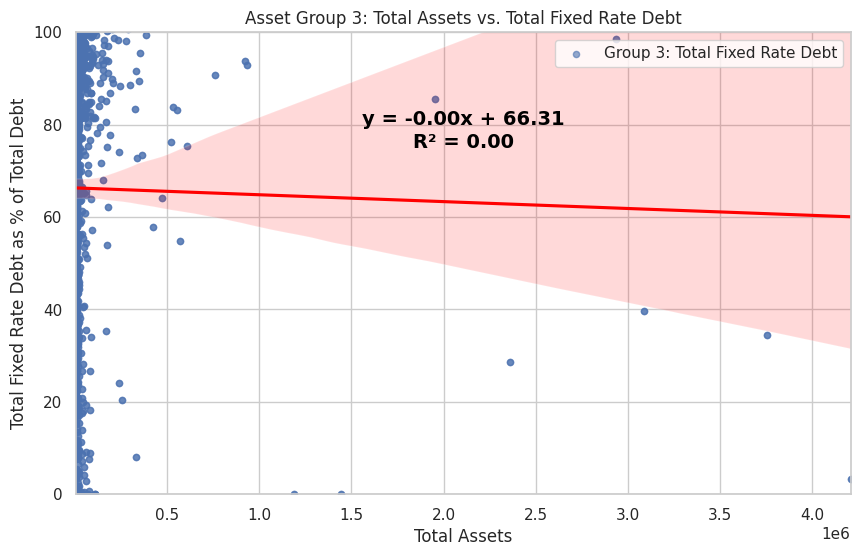

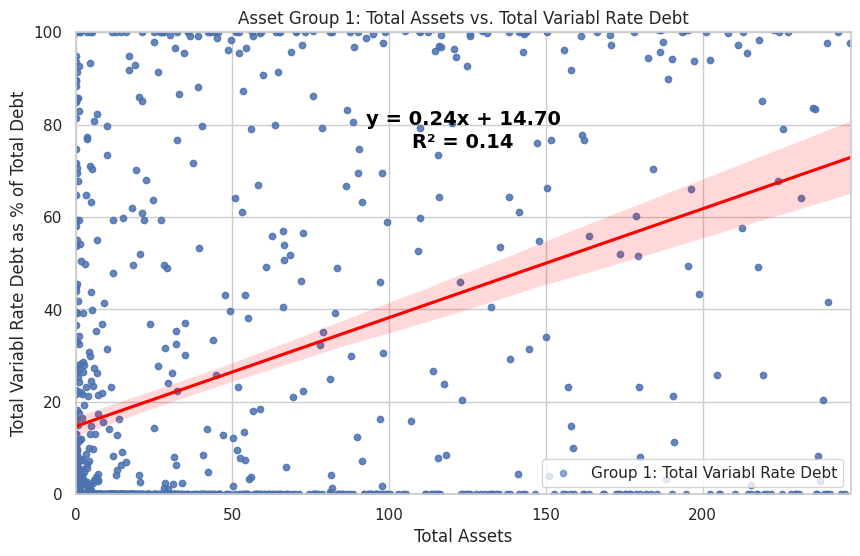

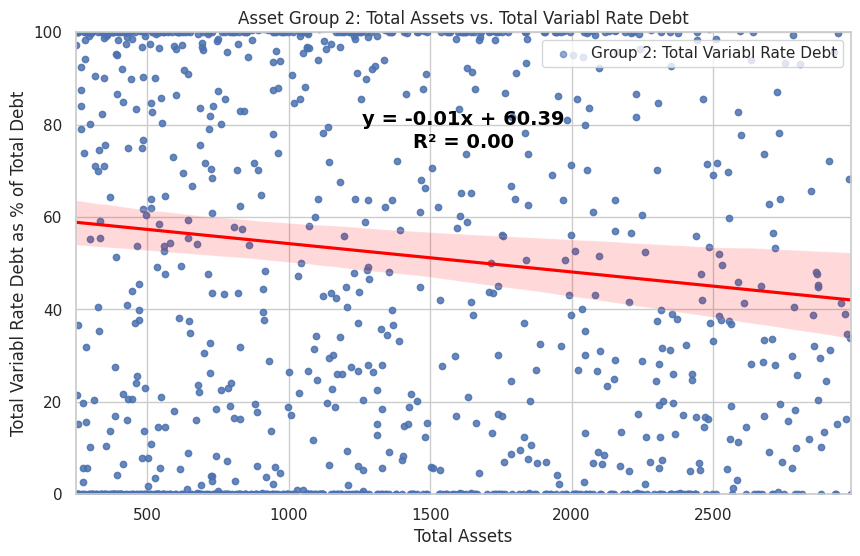

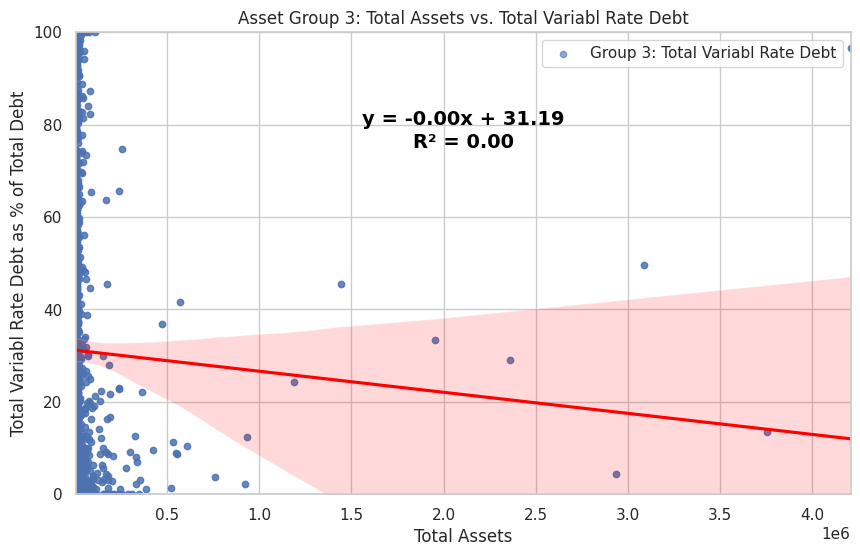

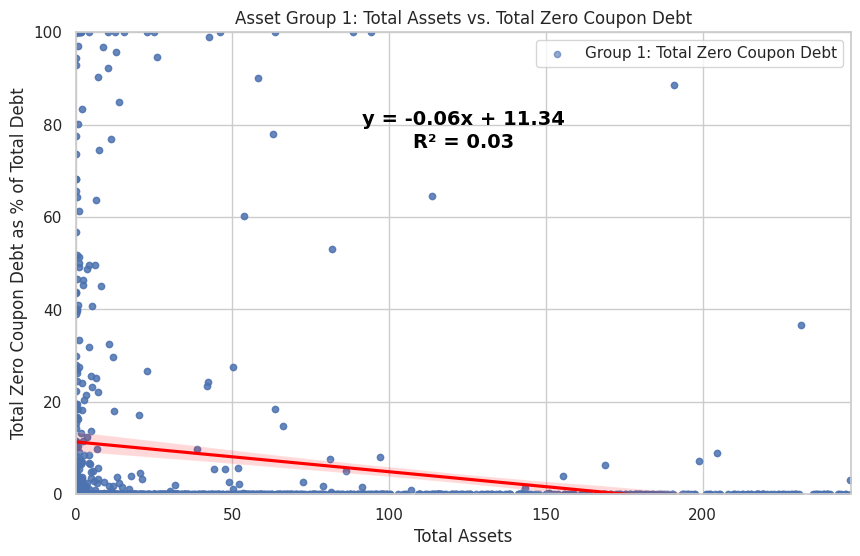

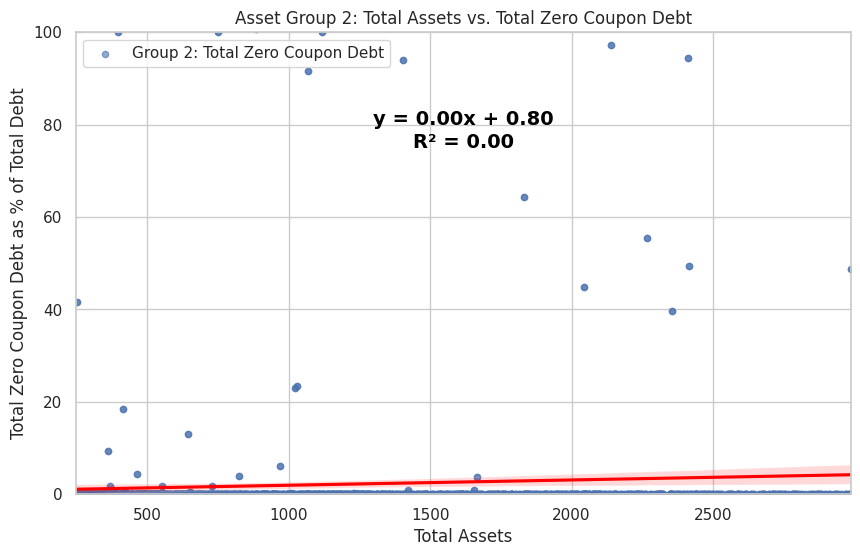

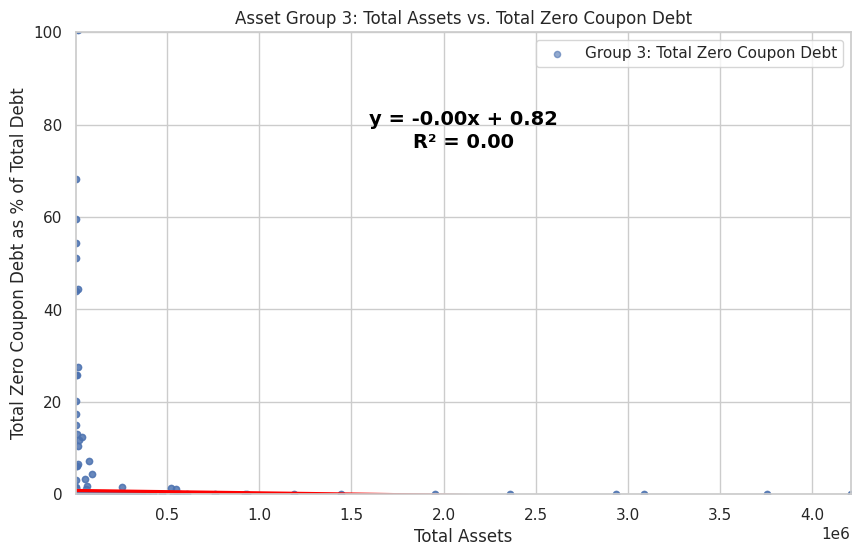

In [ ]:
# prompt: create function to plot asset size vs total fixed rate debt %, asset size vs total variable rate debt %, asset size vs total zero coupon rate debt %, and use df21_nonzero as an example

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


def plot_asset_vs_debt(df, y):
    """
    Plots asset size vs. different debt types.

    Args:
        df: DataFrame containing 'Total Assets', 'Total Fixed Rate Debt (%)',
            'Total Variable Rate Debt (%)', and 'Total Zero Coupon Rate Debt (%)'.
        title: Title for the plot.
    """
    a = divide_into_groups(df, 'Total Assets', 3)

    for i, group_df in enumerate(a):
      sns.set(style='whitegrid')
      plt.figure(figsize=(10, 6))

      plt.scatter(group_df['Total Assets'], group_df[y] / group_df['Total Debt']*100,
                    label=f'Group {i + 1}: {y}', alpha=0.6, s=20)

      sns.regplot(data=group_df, x='Total Assets', y=group_df[y] / group_df['Total Debt']*100, scatter_kws={'alpha': 0.6, 's': 20}, line_kws={'color': 'red'})
      slope, intercept, r_value, p_value, std_err = stats.linregress(group_df['Total Assets'], y=group_df[y] / group_df['Total Debt']*100)

      equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
      r_squared_text = f'R² = {r_value**2:.2f}'

      plt.text(0.5, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=14, color='black', ha='center', fontweight='bold')
      plt.text(0.5, 0.75, r_squared_text, transform=plt.gca().transAxes, fontsize=14, color='black', ha='center', fontweight='bold')



        # Dynamic title and labels
      plt.title(f"Asset Group {i + 1}: {'Total Assets'} vs. {y}")
      plt.xlabel(f"{'Total Assets'}")
      #plt.xscale('log')
      plt.ylabel(f"{y} as % of {'Total Debt'}")
      plt.xlim(group_df['Total Assets'].min(), group_df['Total Assets'].max())
      plt.ylim(0,100)
      plt.legend()
      plt.grid(True)

      plt.show()

# Example usage (assuming df21_nonzero has the required columns):
# Assuming 'Total Fixed Rate Debt (%)', 'Total Variable Rate Debt (%)', and
# 'Total Zero Coupon Rate Debt (%)' columns exist in df21_nonzero.
# If they don't exist, you'll need to calculate them first.


# Example usage
plot_asset_vs_debt(df21_nonzero, 'Total Fixed Rate Debt')
plot_asset_vs_debt(df21_nonzero, 'Total Variabl Rate Debt')
plot_asset_vs_debt(df21_nonzero, 'Total Zero Coupon Debt')

##Scatterplot sans Outlier

In [ ]:
def filter_outlier_scatter_points(df, x_column, y_column, x_threshold=None, y_threshold=None):

        x_Q1 = df[x_column].quantile(0.25)
        x_Q3 = df[x_column].quantile(0.75)
        x_IQR = x_Q3 - x_Q1
        x_lower_bound = x_Q1 - 1.5 * x_IQR
        x_upper_bound = x_Q3 + 1.5 * x_IQR

        # IQR method for y_column
        y_Q1 = df[y_column].quantile(0.25)
        y_Q3 = df[y_column].quantile(0.75)
        y_IQR = y_Q3 - y_Q1
        y_lower_bound = y_Q1 - 1.5 * y_IQR
        y_upper_bound = y_Q3 + 1.5 * y_IQR

        # Filter data
        return df[(df[x_column] >= x_lower_bound) & (df[x_column] <= x_upper_bound) &
                  (df[y_column] >= y_lower_bound) & (df[y_column] <= y_upper_bound)]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


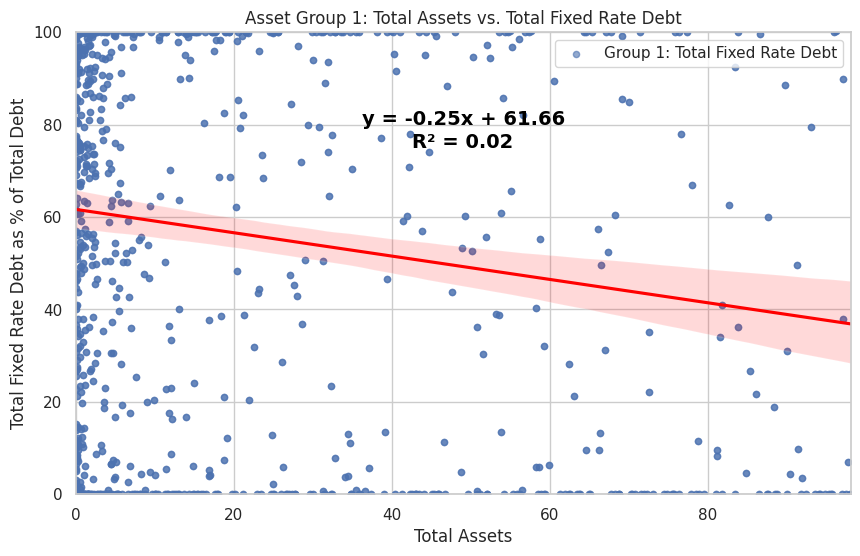

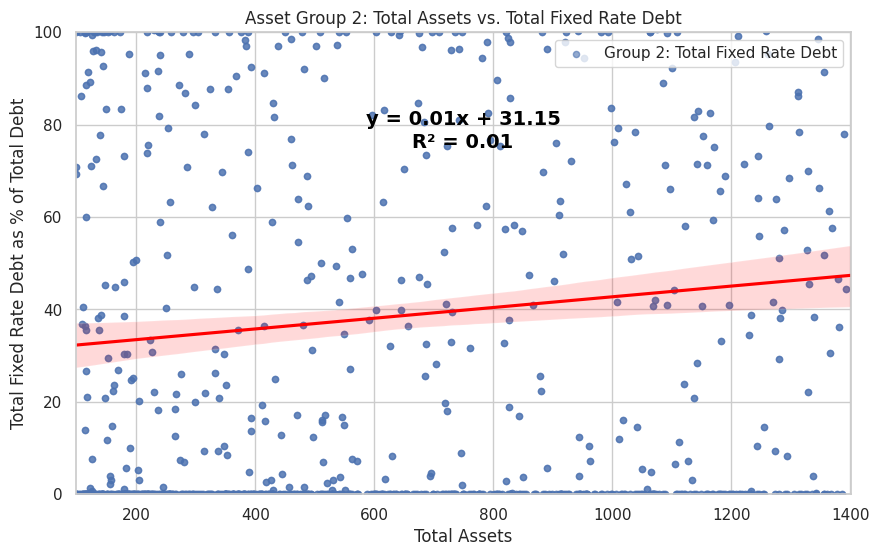

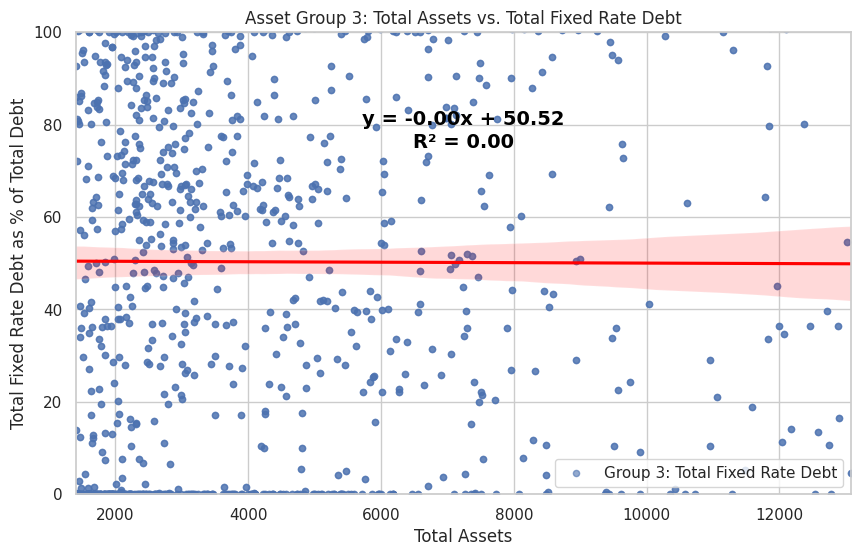

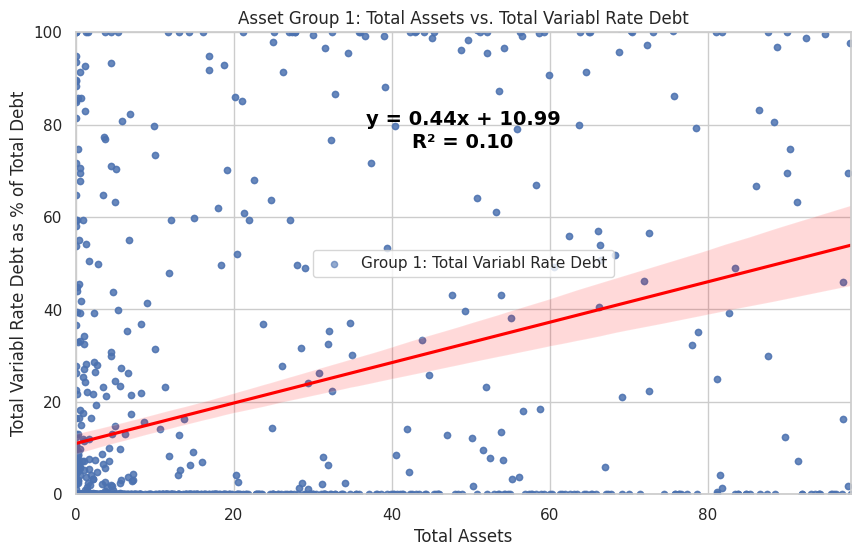

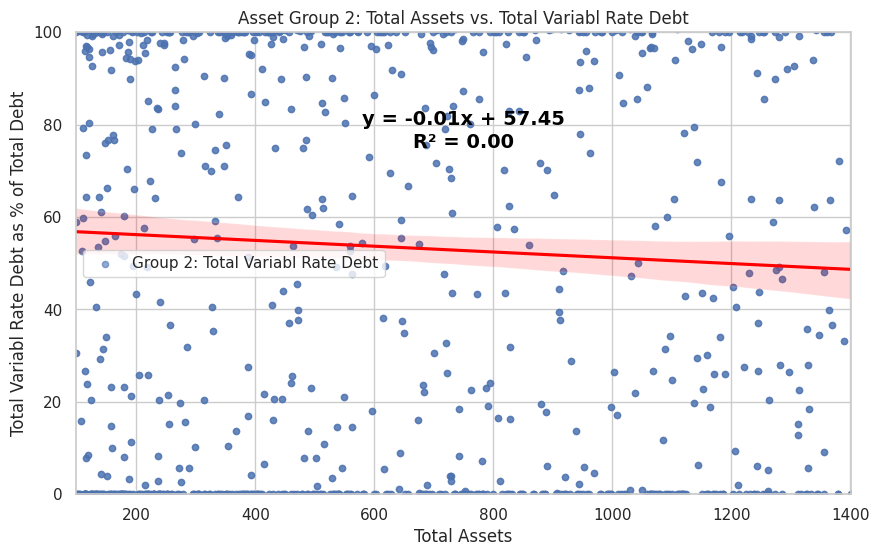

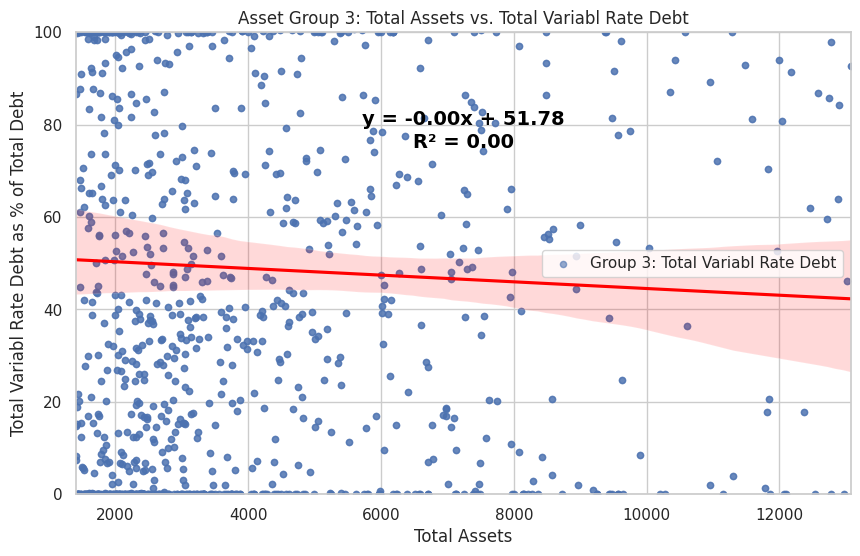

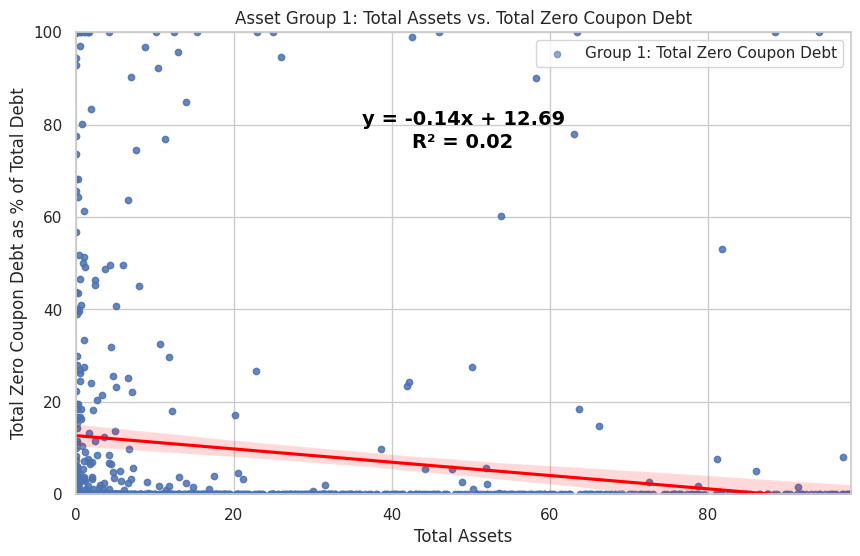

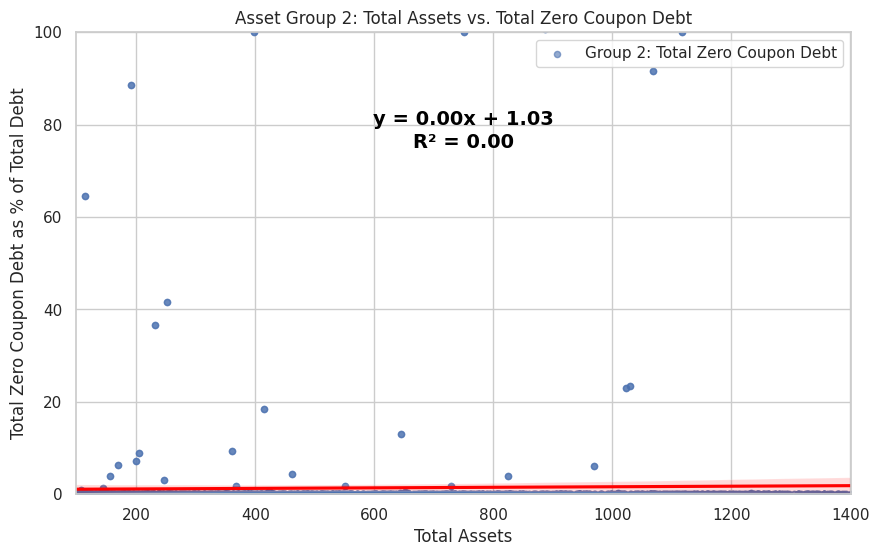

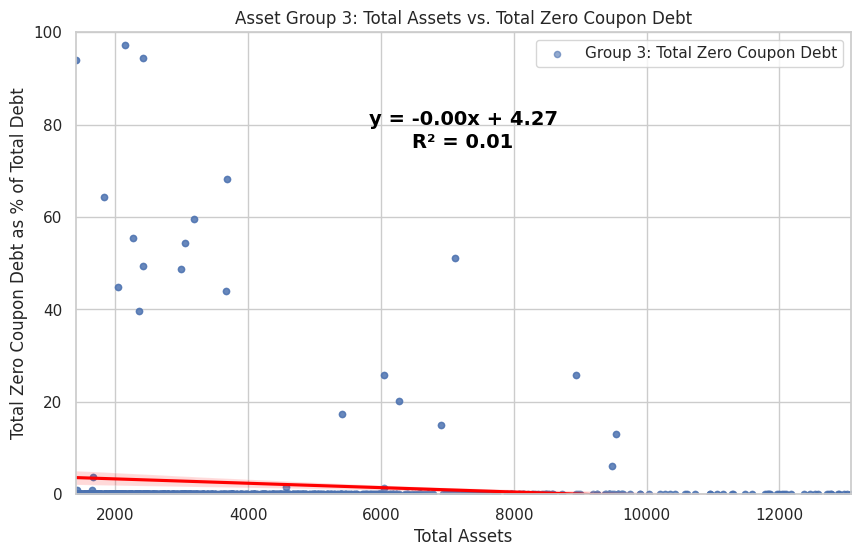

In [ ]:
df21_nonzero_nooutlier = filter_outlier_scatter_points(df21_nonzero,
                                            x_column='Total Assets',
                                            y_column='Total Fixed Rate Debt')

plot_asset_vs_debt(df21_nonzero_nooutlier, 'Total Fixed Rate Debt')
plot_asset_vs_debt(df21_nonzero_nooutlier, 'Total Variabl Rate Debt')
plot_asset_vs_debt(df21_nonzero_nooutlier, 'Total Zero Coupon Debt')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


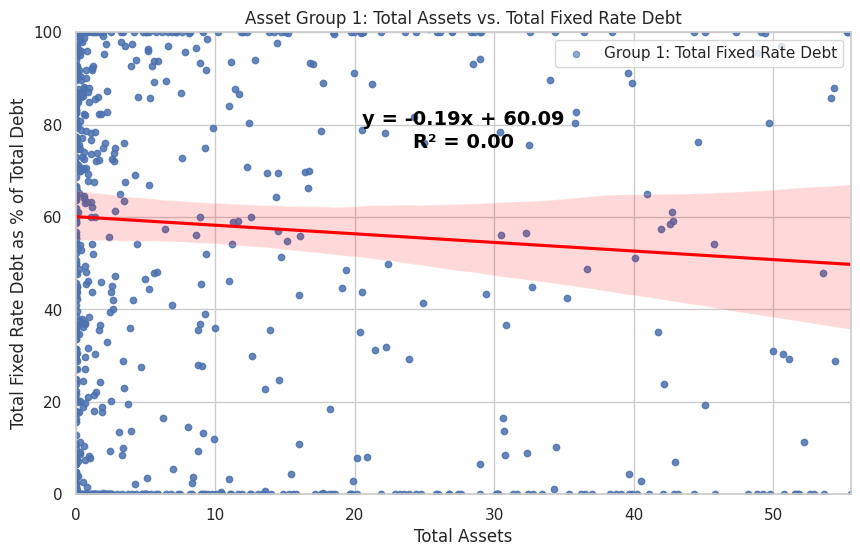

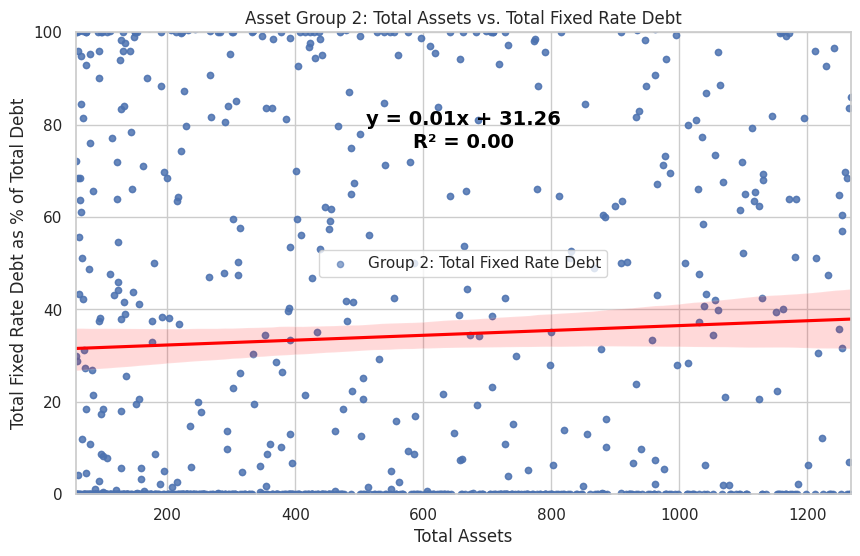

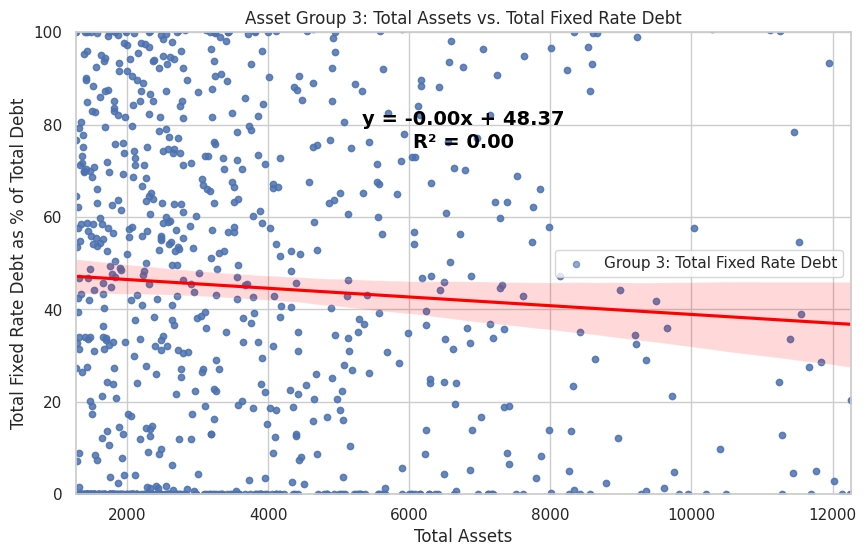

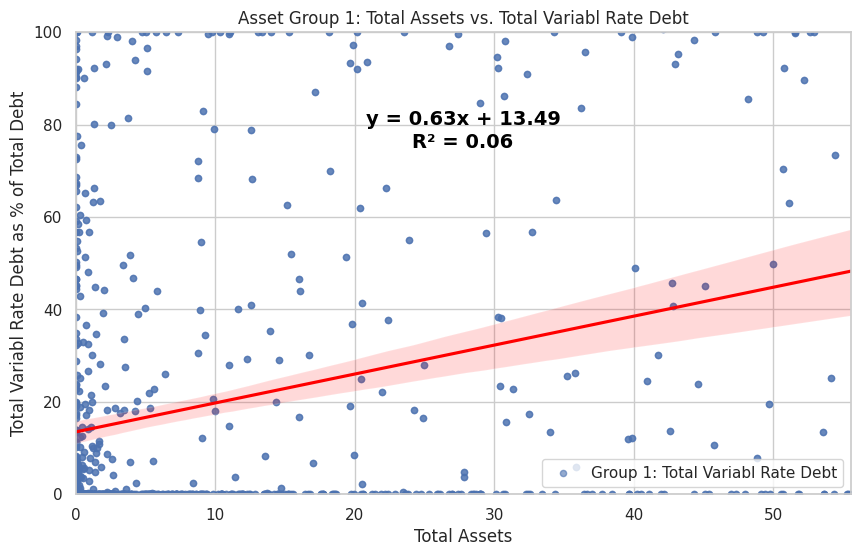

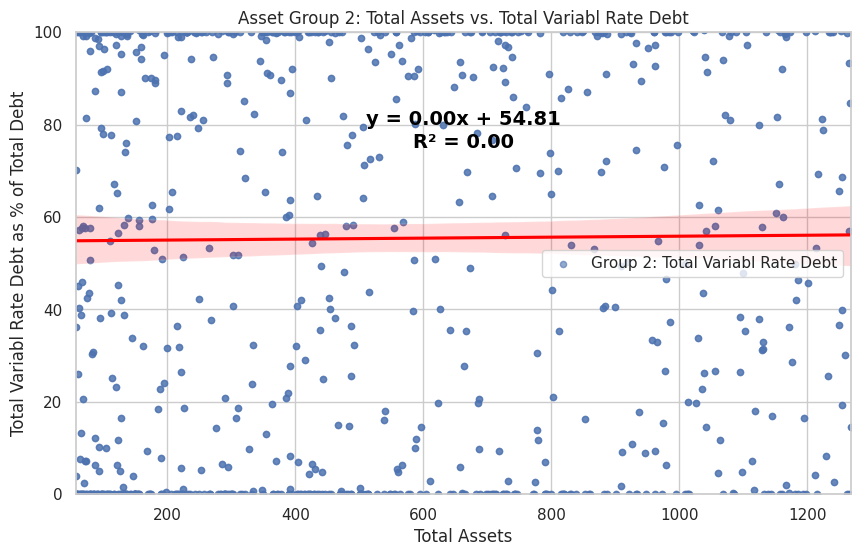

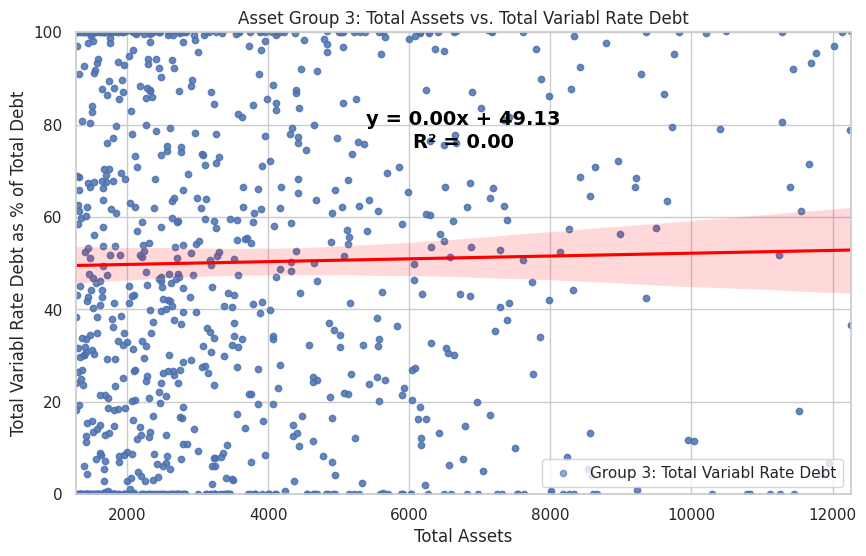

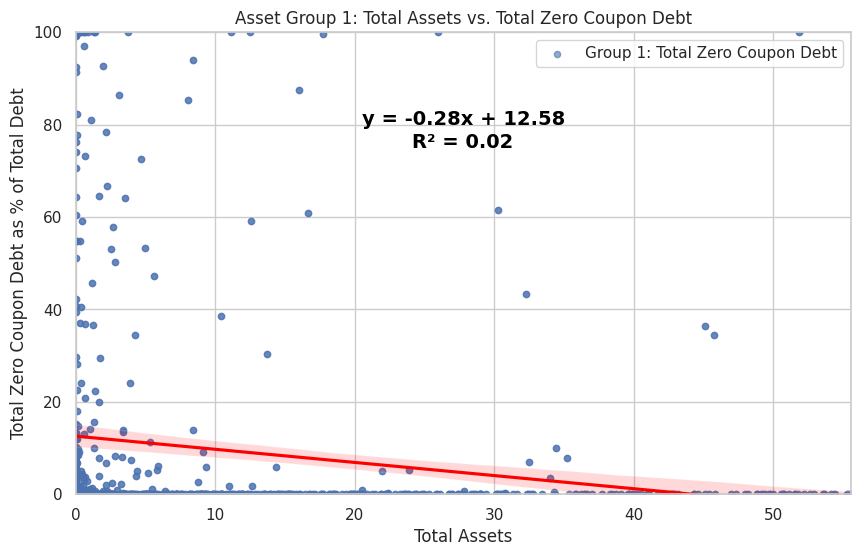

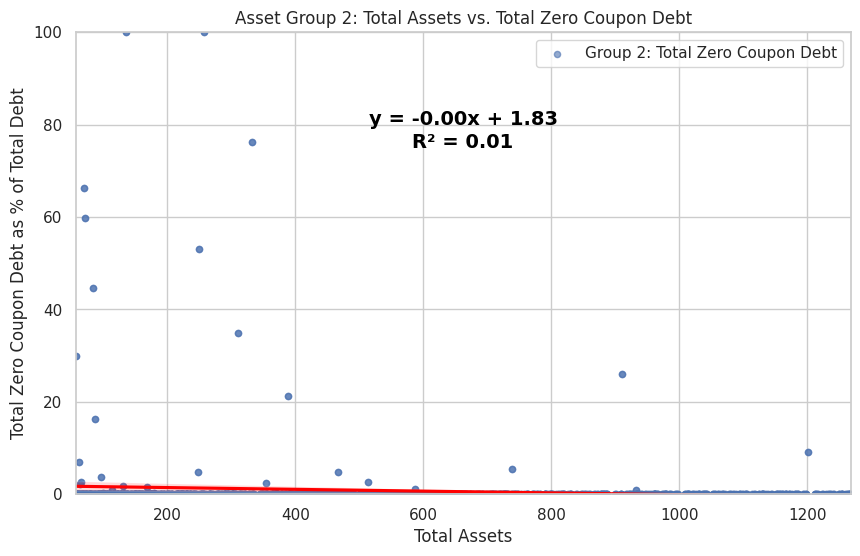

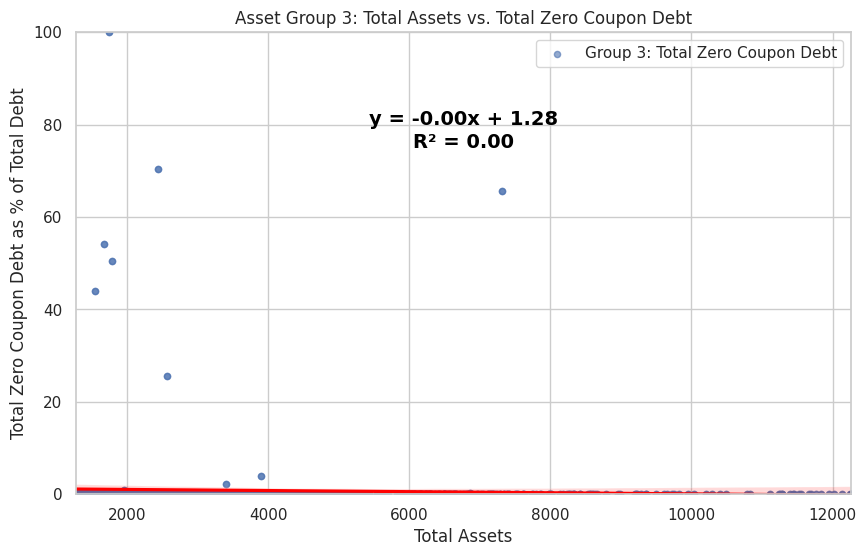

In [ ]:
df19_nonzero_nooutlier = filter_outlier_scatter_points(df19_nonzero,
                                            x_column='Total Assets',
                                            y_column='Total Fixed Rate Debt')

plot_asset_vs_debt(df19_nonzero_nooutlier, 'Total Fixed Rate Debt')
plot_asset_vs_debt(df19_nonzero_nooutlier, 'Total Variabl Rate Debt')
plot_asset_vs_debt(df19_nonzero_nooutlier, 'Total Zero Coupon Debt')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


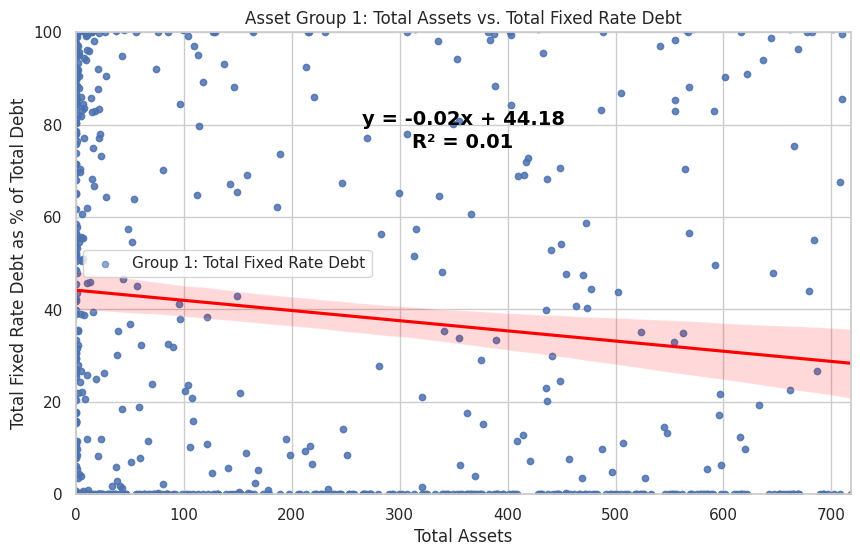

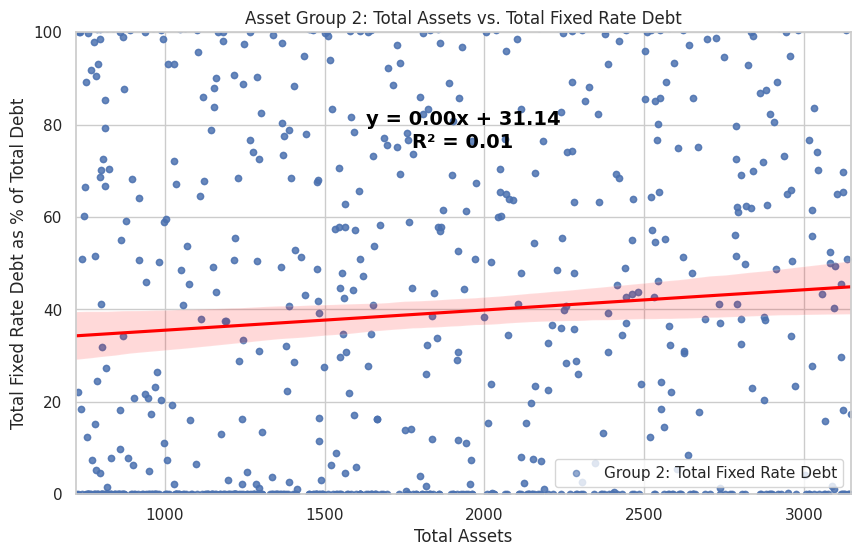

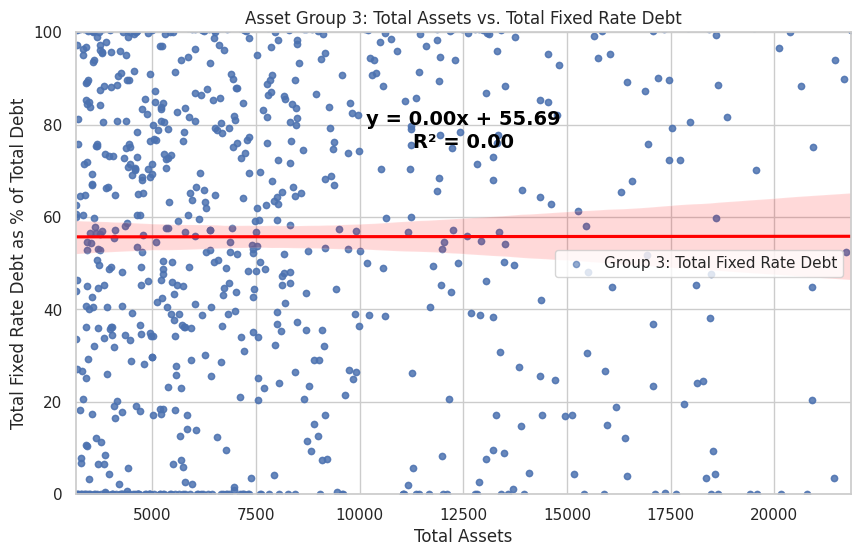

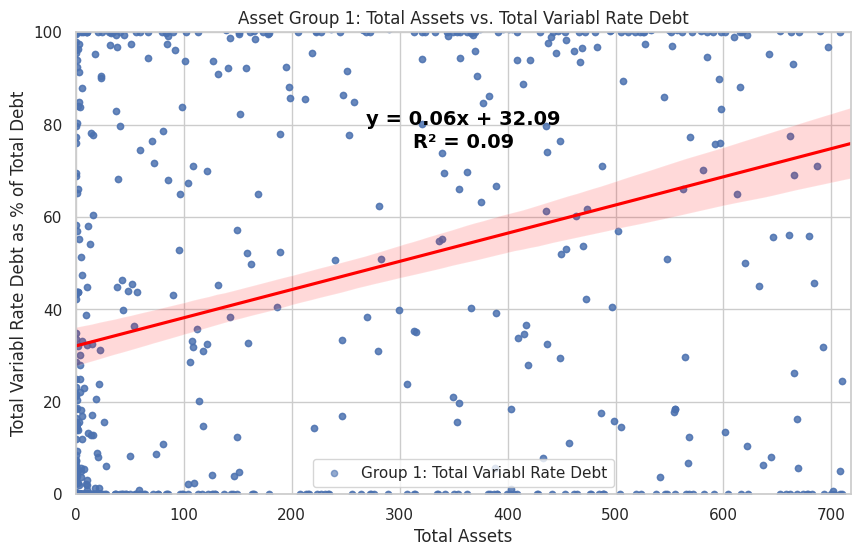

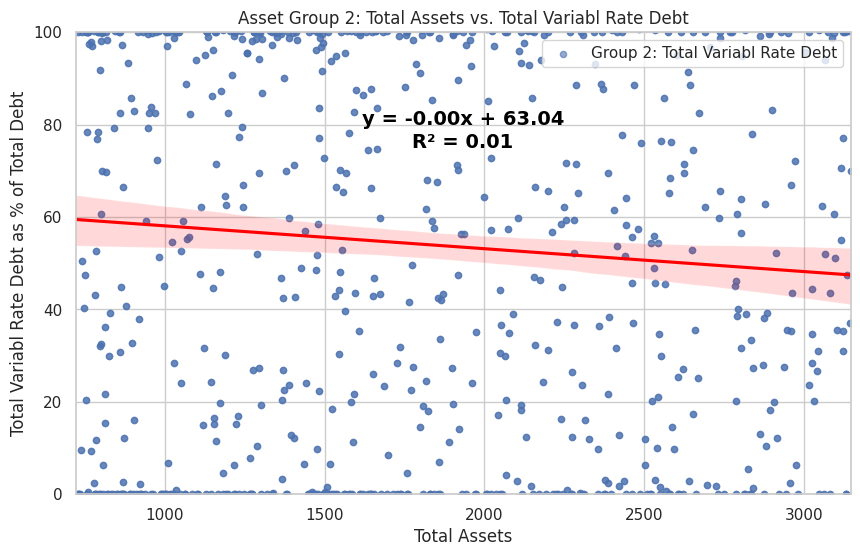

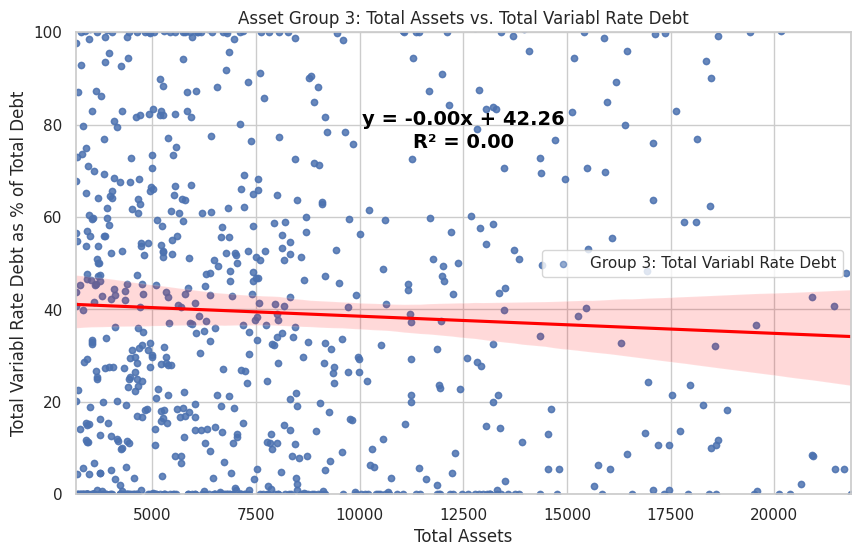

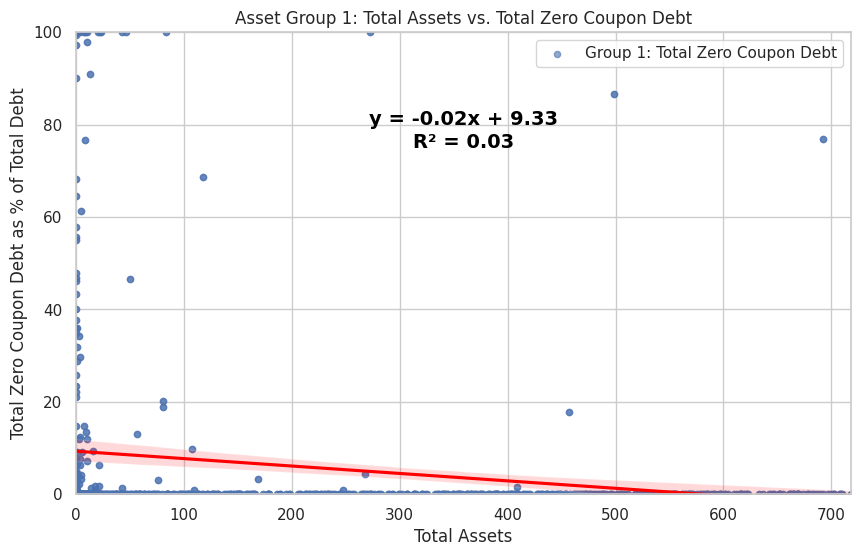

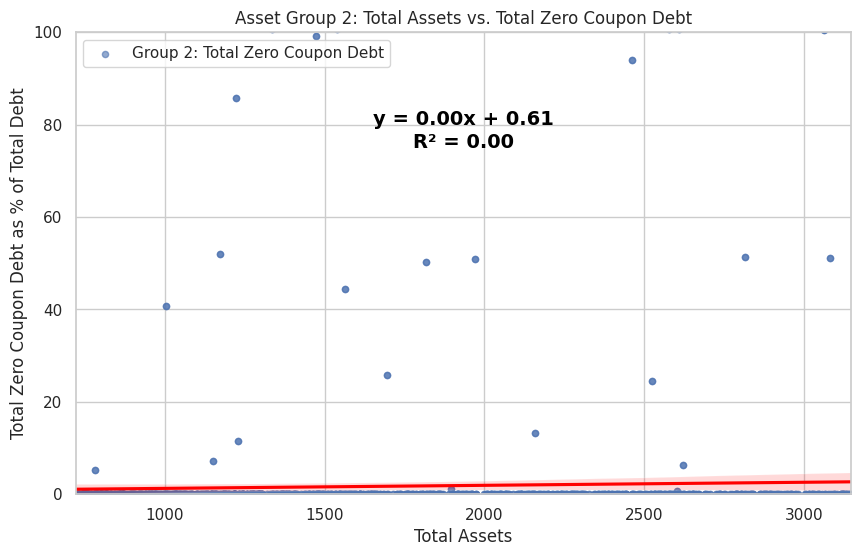

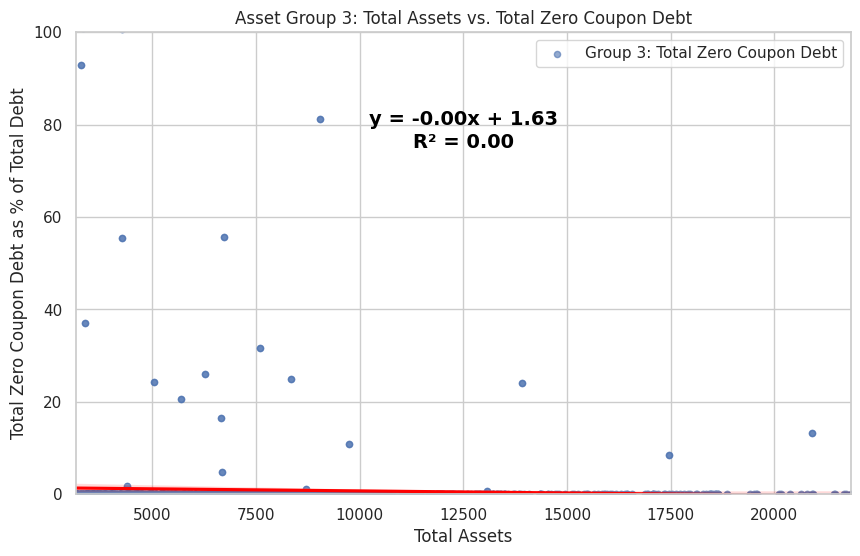

In [ ]:
df_nonzero_nooutlier = filter_outlier_scatter_points(df_nonzero,
                                            x_column='Total Assets',
                                            y_column='Total Fixed Rate Debt')

plot_asset_vs_debt(df_nonzero_nooutlier, 'Total Fixed Rate Debt')
plot_asset_vs_debt(df_nonzero_nooutlier, 'Total Variabl Rate Debt')
plot_asset_vs_debt(df_nonzero_nooutlier, 'Total Zero Coupon Debt')

In [ ]:
# prompt: get all unique names of gics sector name in df

unique_gics_sectors = df19['GICS Sector Name'].unique()
unique_gics_sectors

array(['@NA', 'Consumer Discretionary', 'Health Care', 'Consumer Staples',
       'Financials', 'Industrials', 'Energy', 'Communication Services',
       'Utilities', 'Materials', 'Information Technology', 'Real Estate'],
      dtype=object)

In [ ]:
# prompt: remove all those with gics sector name of @NA

# Remove rows where 'GICS Sector Name' is '@NA'
df_nonzero = df_nonzero[df_nonzero['GICS Sector Name'] != '@NA']
df19_nonzero = df19_nonzero[df19_nonzero['GICS Sector Name'] != '@NA']
df21_nonzero = df21_nonzero[df21_nonzero['GICS Sector Name'] != '@NA']


##Fixed Rate

In [ ]:
from scipy import stats
def plot_sector_vs_debt(df, y):

      df['perc'] = (df[y] / df['Total Debt']) * 100


      variance_df = df.groupby('GICS Sector Name')['perc'].var()

      plt.figure(figsize=(16, 10))

      sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')

      for i, sector in enumerate(df['GICS Sector Name'].unique()):
          plt.text(i, df['perc'].max() + 0.5, f'Var: {variance_df[sector]:.2f}',
             ha='center', fontsize=8, color='black', fontweight='bold')

      plt.title('Fixed Rate % vs GICS Sector', fontsize=16)
      plt.xlabel('GICS Sector', fontsize=12)
      plt.ylabel('Fixed Rate %', fontsize=12)
      plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
      plt.tight_layout()

      f_value, p_value = stats.f_oneway(*[df[df['GICS Sector Name'] == cat]['perc'] for cat in df['GICS Sector Name'].unique()])

      anova_text = f'ANOVA Result: F={f_value:.2f}, p={p_value:.4f}'
      plt.text(0.5, -.4, anova_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold', transform=plt.gca().transAxes)


      plt.show()

In [ ]:
def var_analysis(df, variable):
  plot_sector_vs_debt(df, variable)

  df['perc'] = (df[variable] / df['Total Debt']) * 100

  f_value, p_value = stats.f_oneway(*[df[df['GICS Sector Name'] == cat]['perc'] for cat in df['GICS Sector Name'].unique()])

  print(f'ANOVA Result: F-value = {f_value:.2f}, p-value = {p_value:.4f}')

  if p_value < 0.05:
    print("Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).")
  else:
    print("Interpretation: There is no statistically significant difference in the Fixed Rate % across the GICS Sectors (fail to reject the null hypothesis).")

2019


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


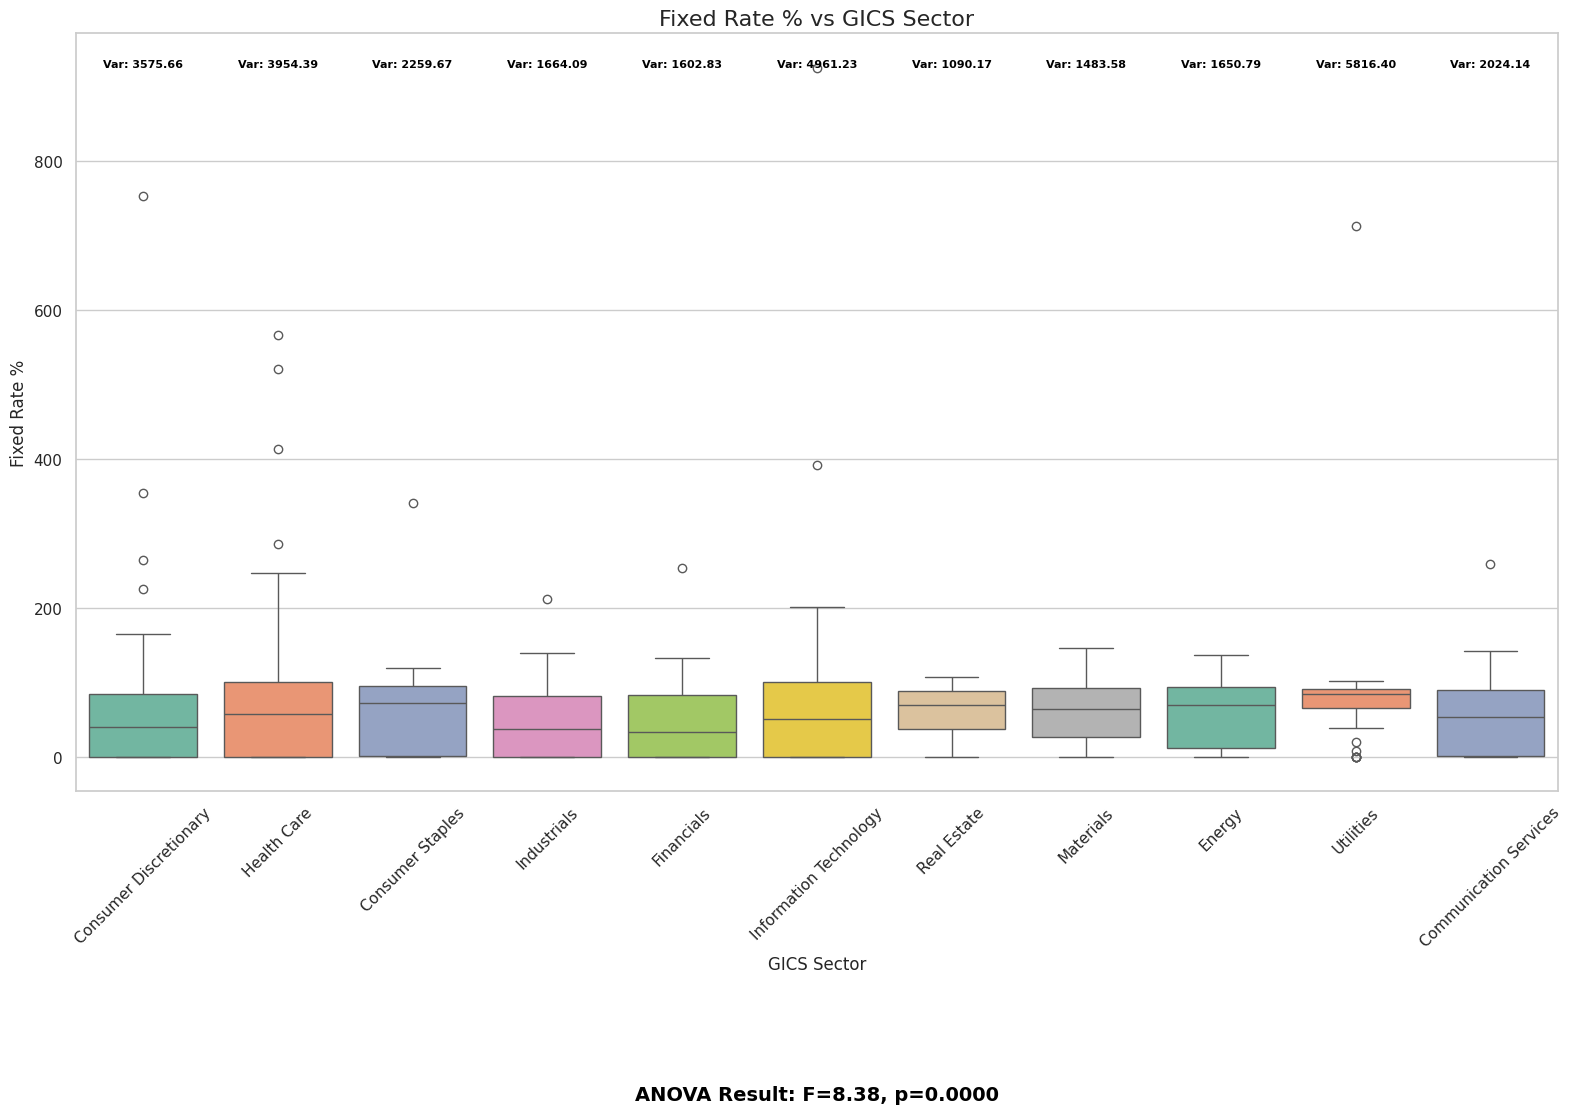

ANOVA Result: F-value = 8.38, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2019")
var_analysis(df19_nonzero, 'Total Fixed Rate Debt')

2021


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


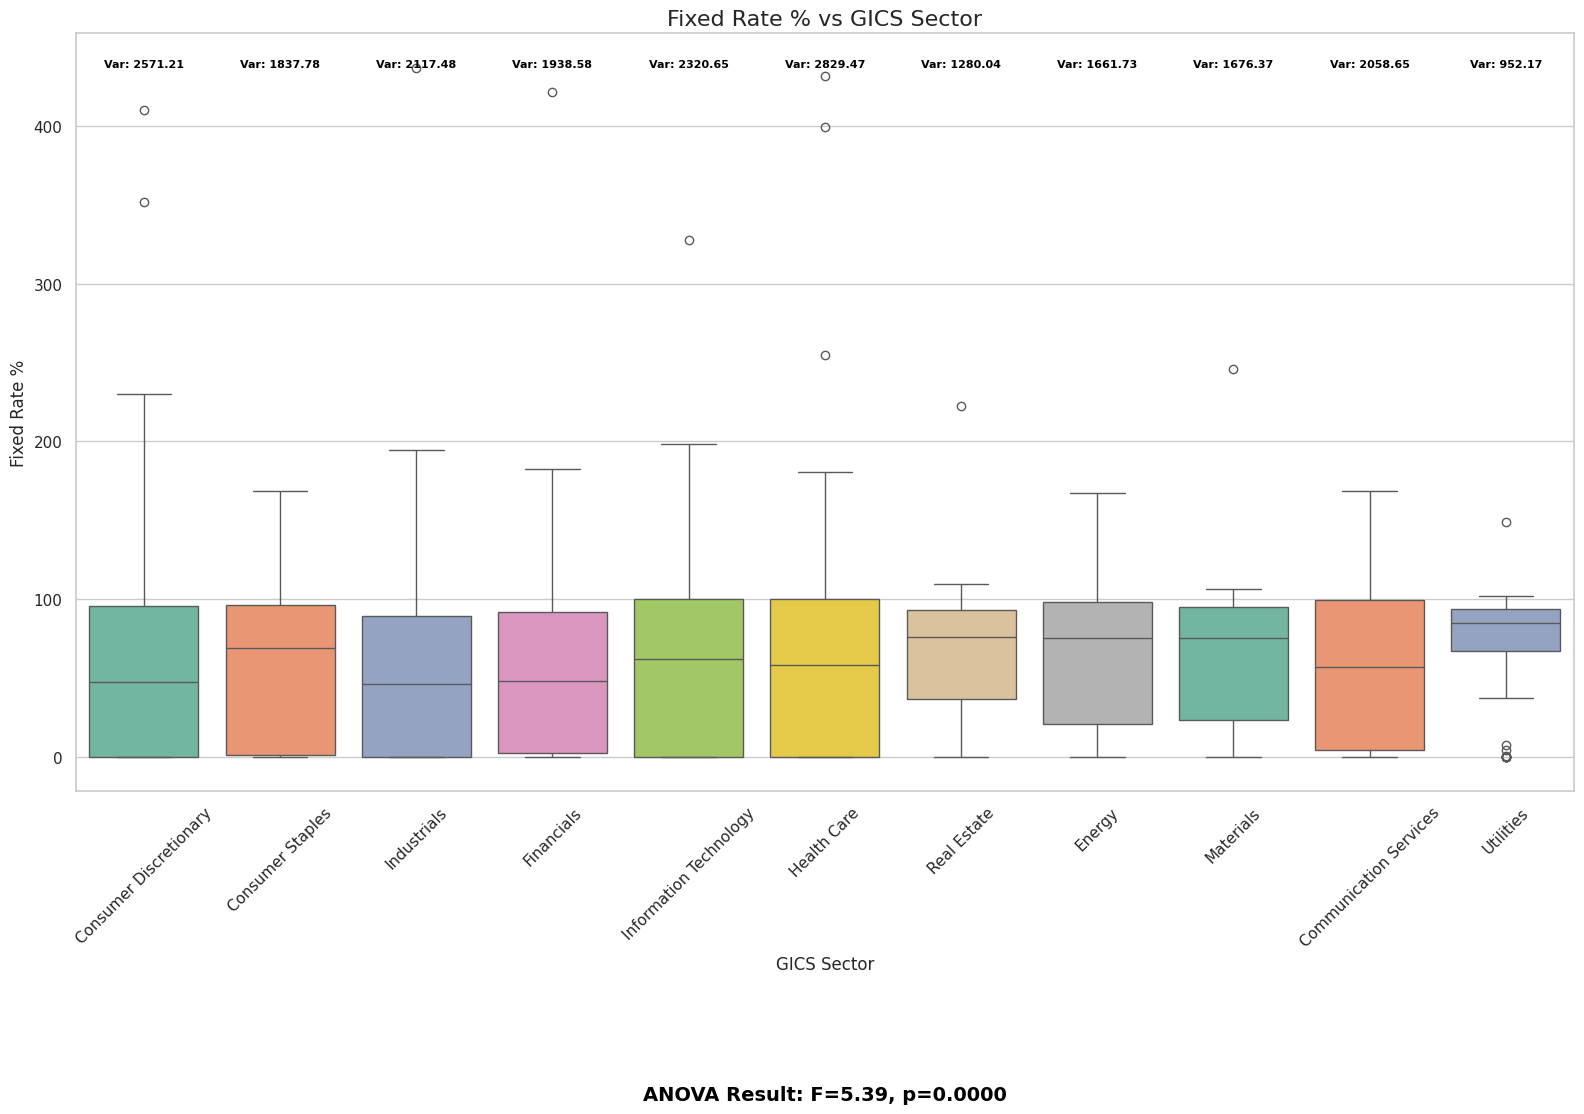

ANOVA Result: F-value = 5.39, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2021")
var_analysis(df21_nonzero, 'Total Fixed Rate Debt')

2024


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


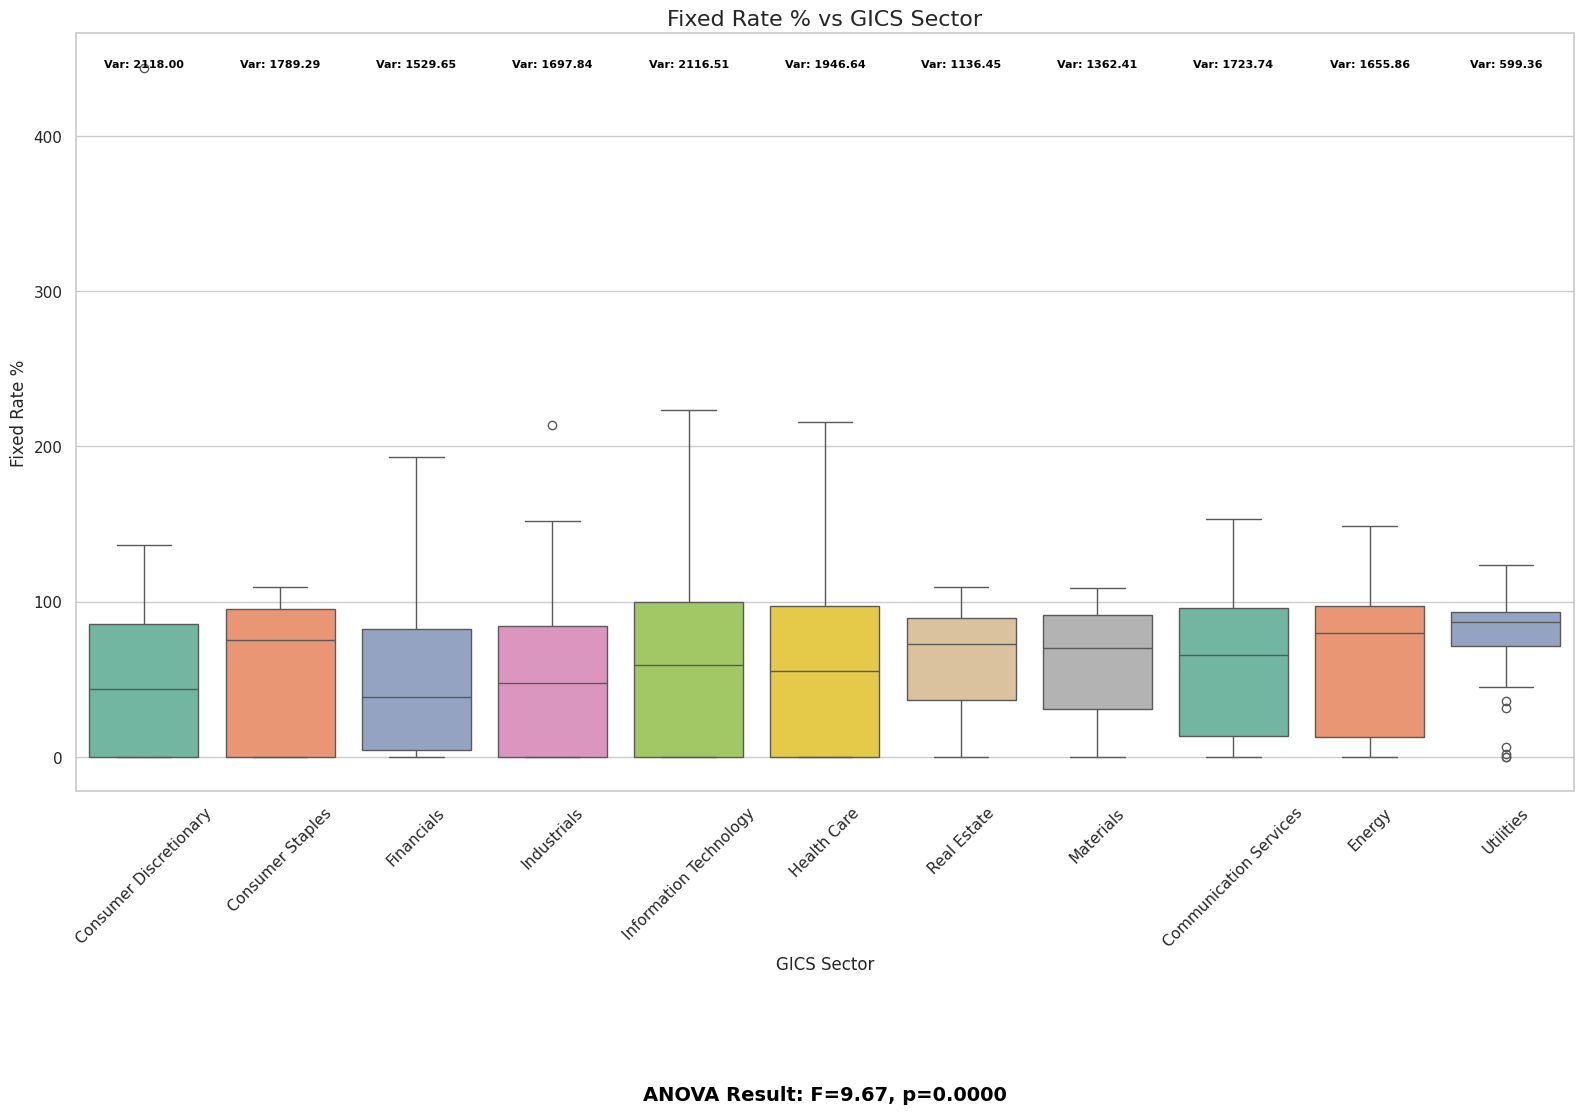

ANOVA Result: F-value = 9.67, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2024")
var_analysis(df_nonzero, 'Total Fixed Rate Debt')

##Variable Debt

2019


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


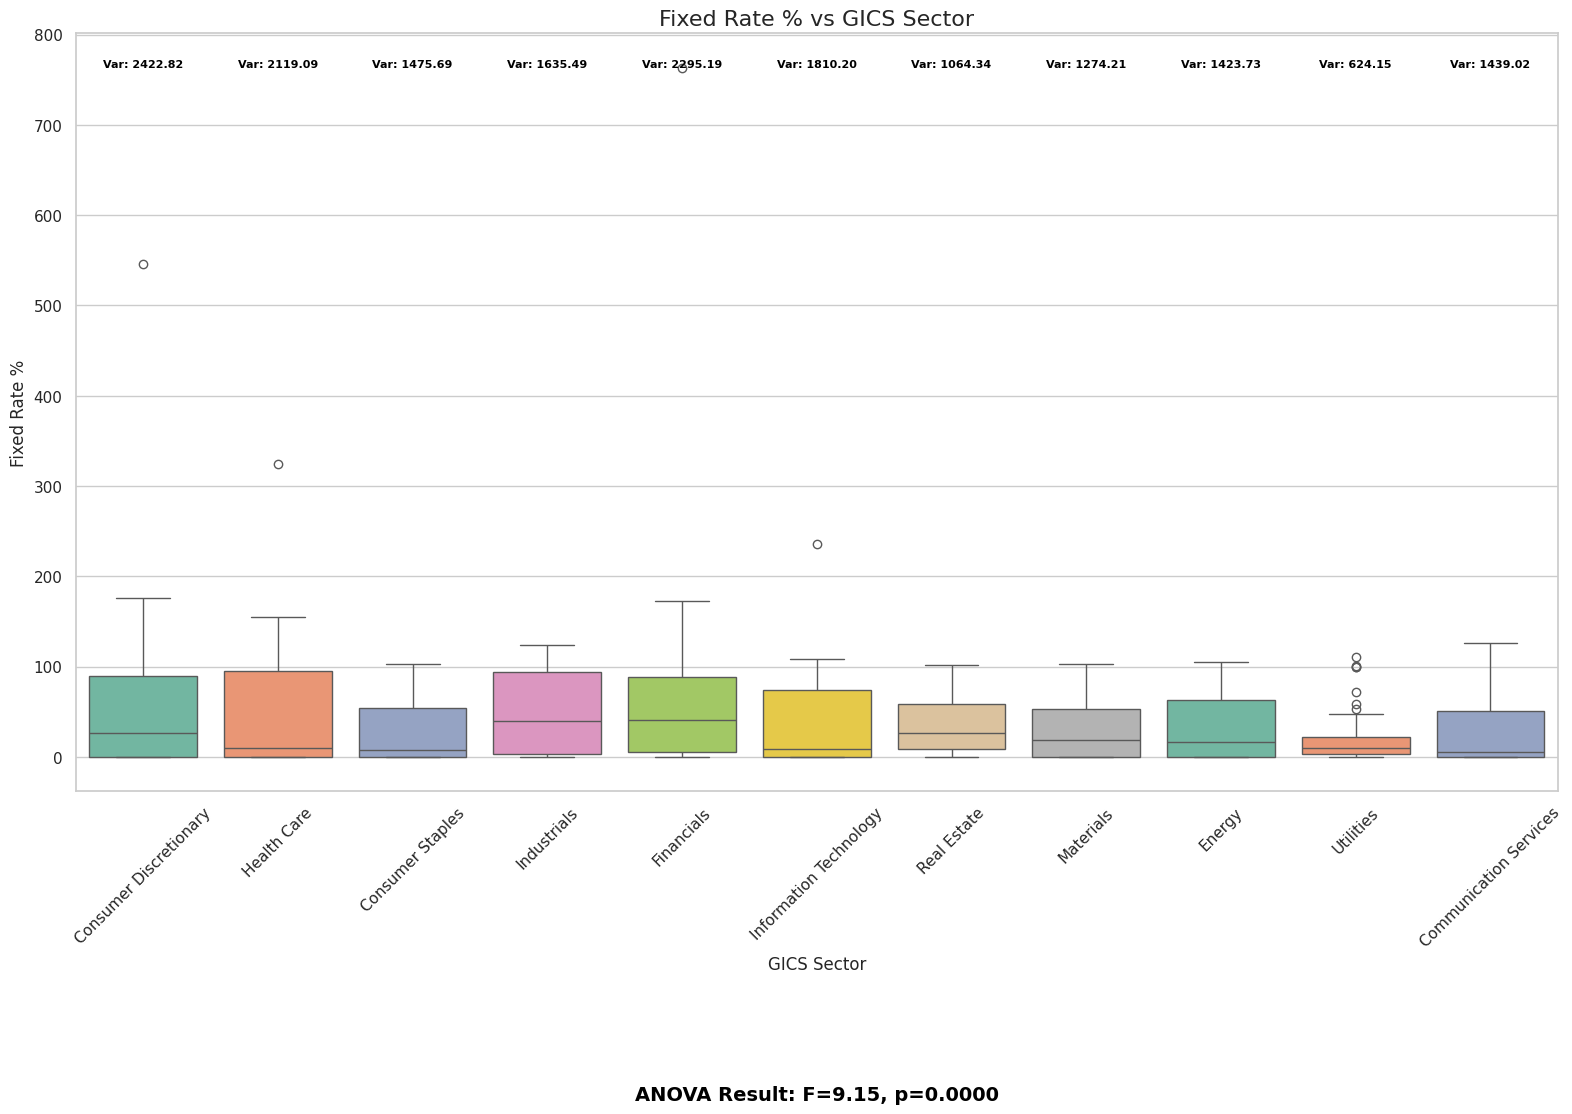

ANOVA Result: F-value = 9.15, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2019")
var_analysis(df19_nonzero, 'Total Variabl Rate Debt')

2021


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


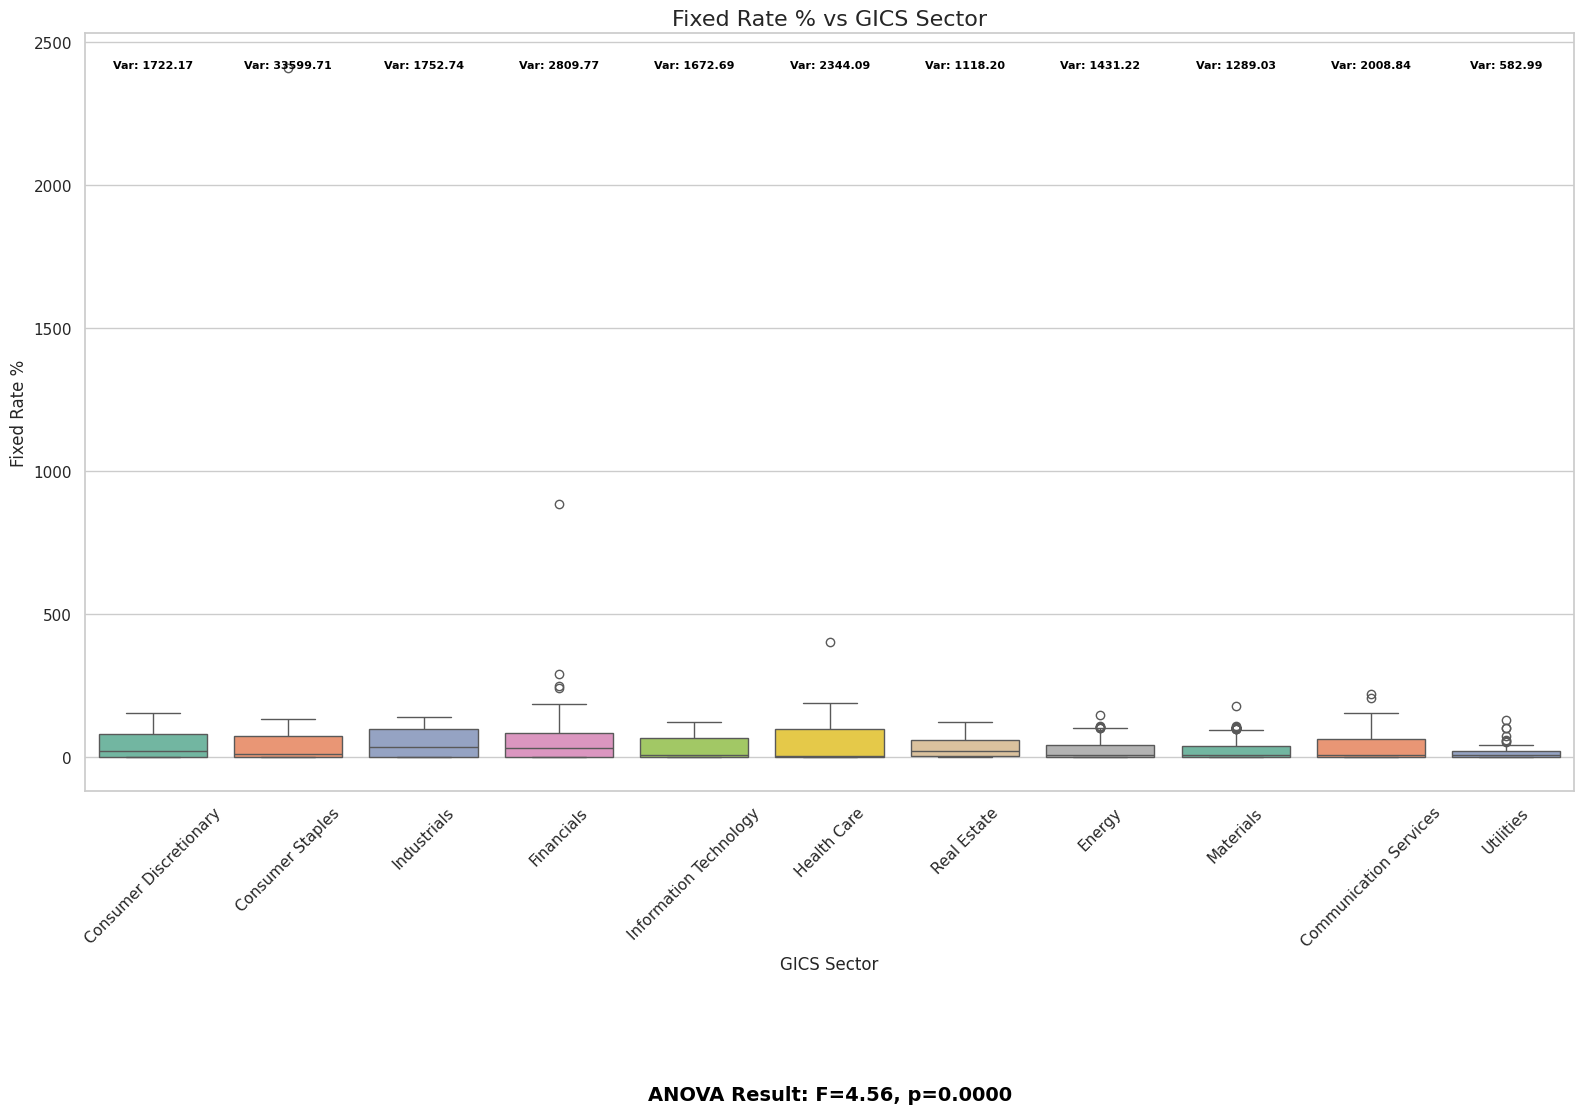

ANOVA Result: F-value = 4.56, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2021")
var_analysis(df21_nonzero, 'Total Variabl Rate Debt')

2024


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


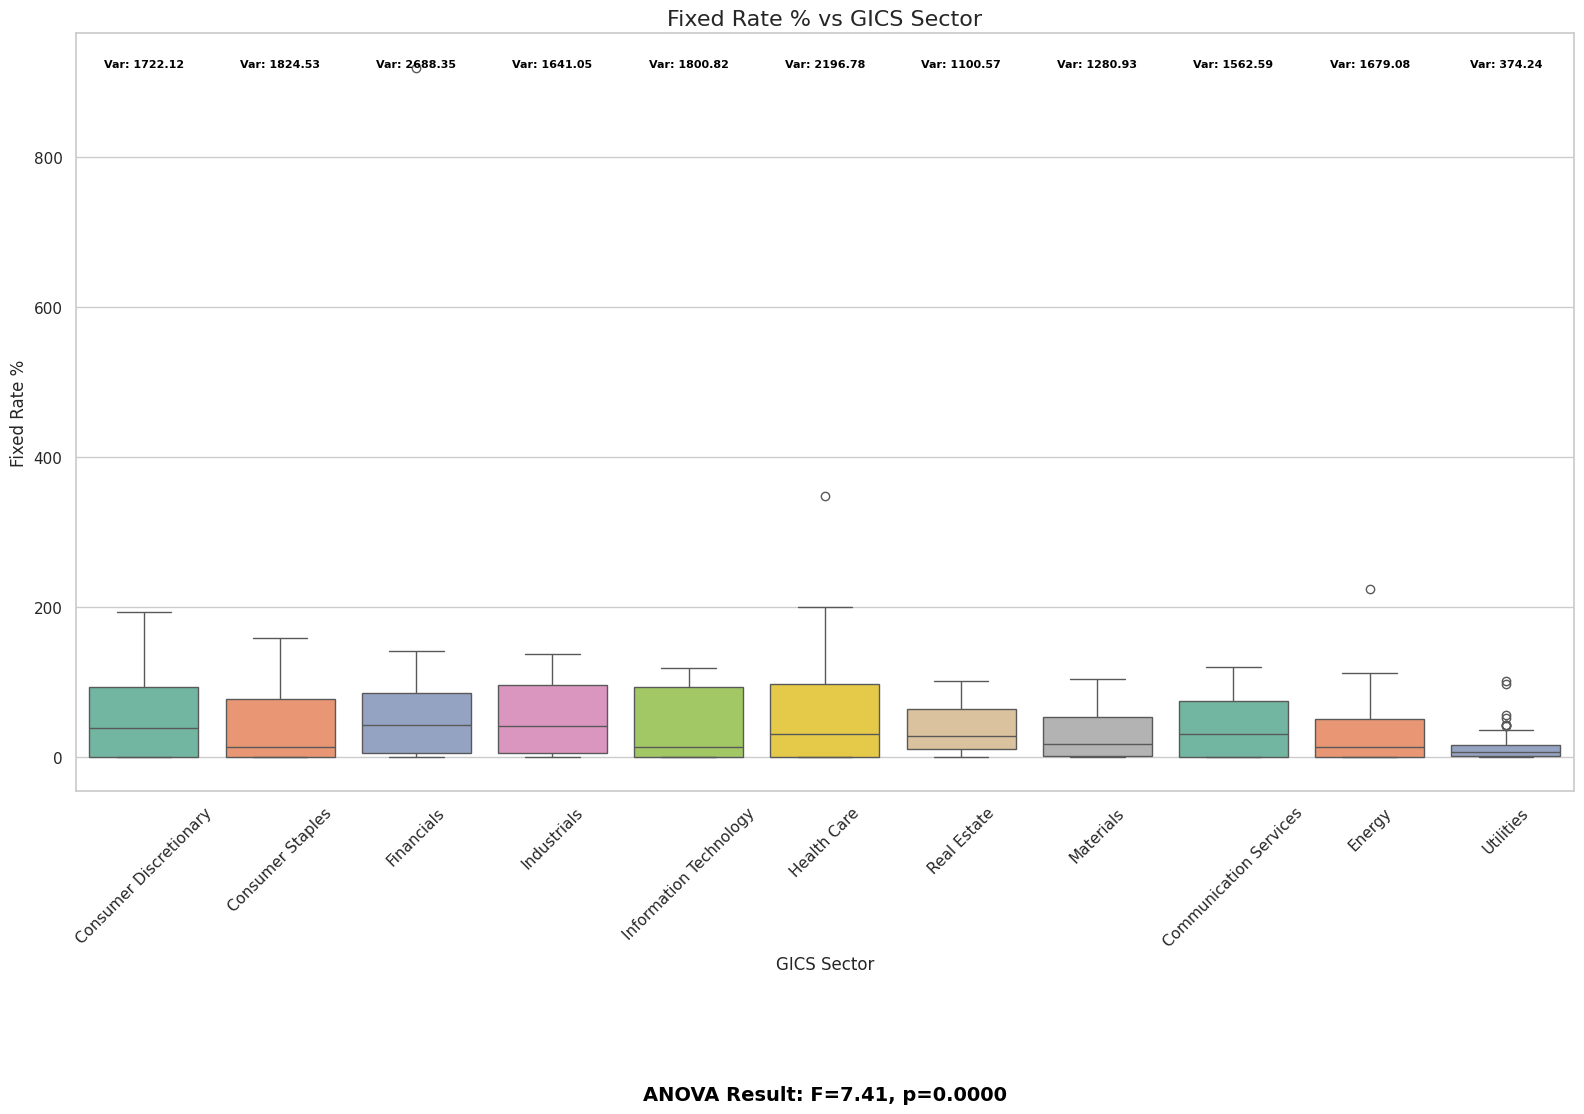

ANOVA Result: F-value = 7.41, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2024")
var_analysis(df_nonzero, 'Total Variabl Rate Debt')

##Zero Coupon

2019


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


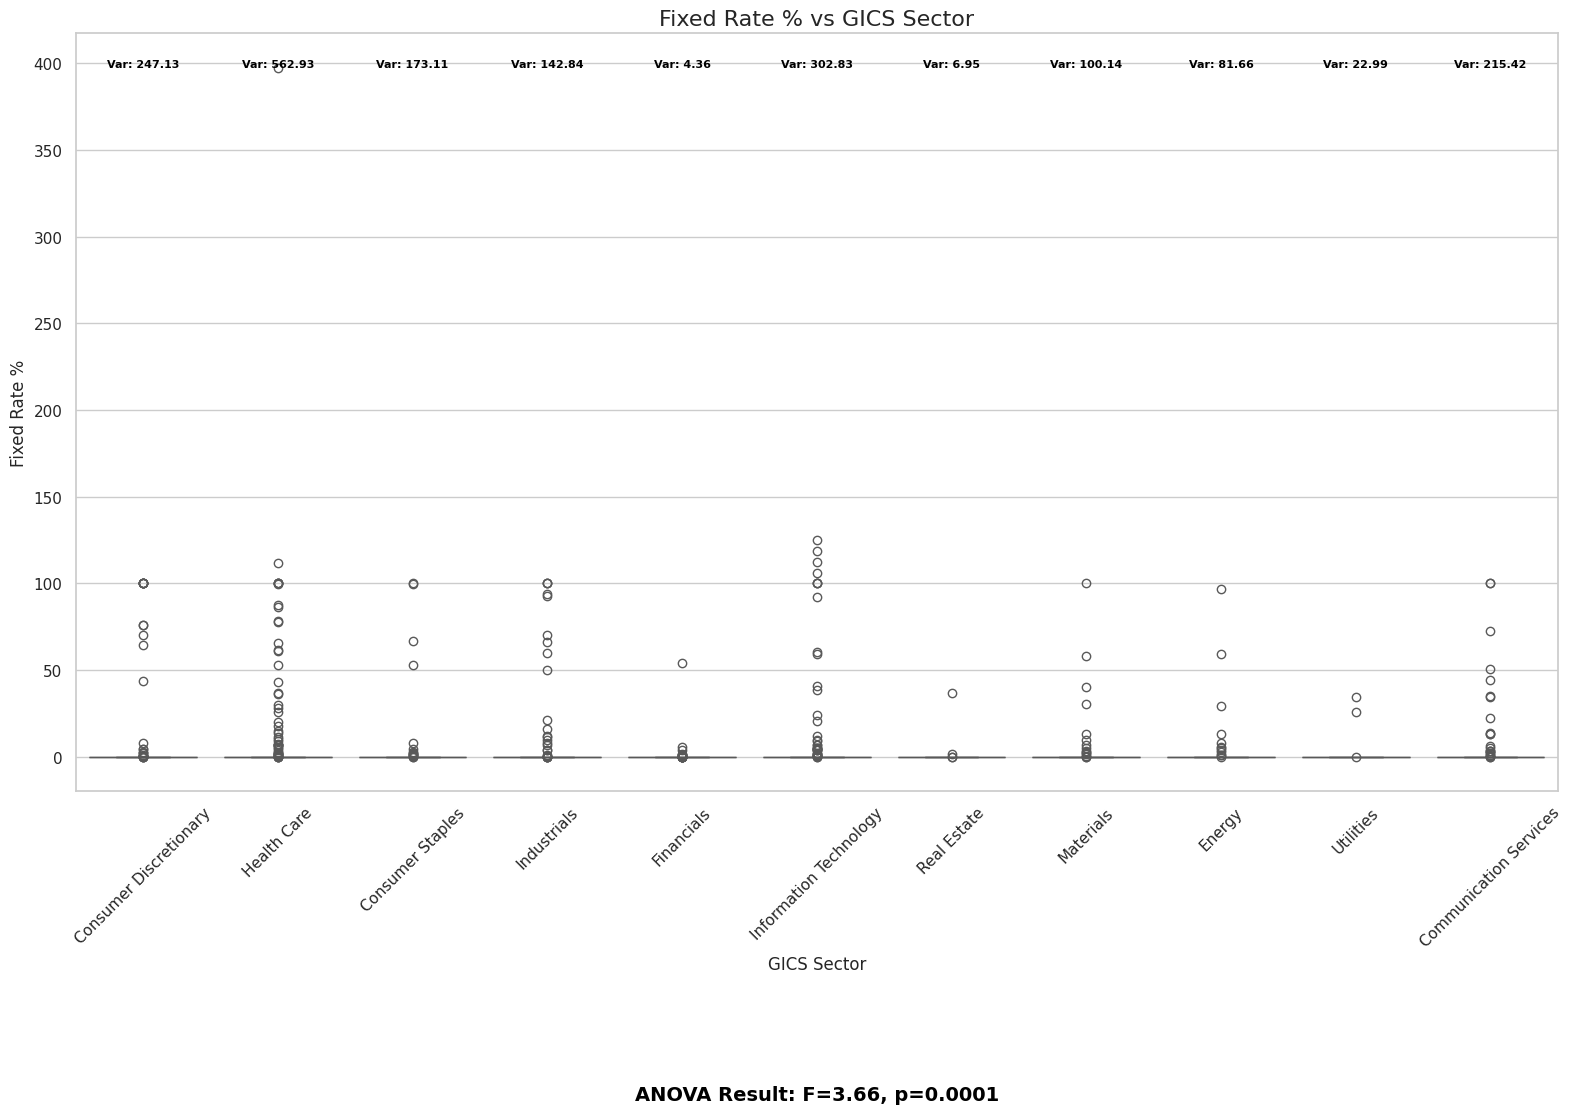

ANOVA Result: F-value = 3.66, p-value = 0.0001
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2019")
var_analysis(df19_nonzero, 'Total Zero Coupon Debt')

2021


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


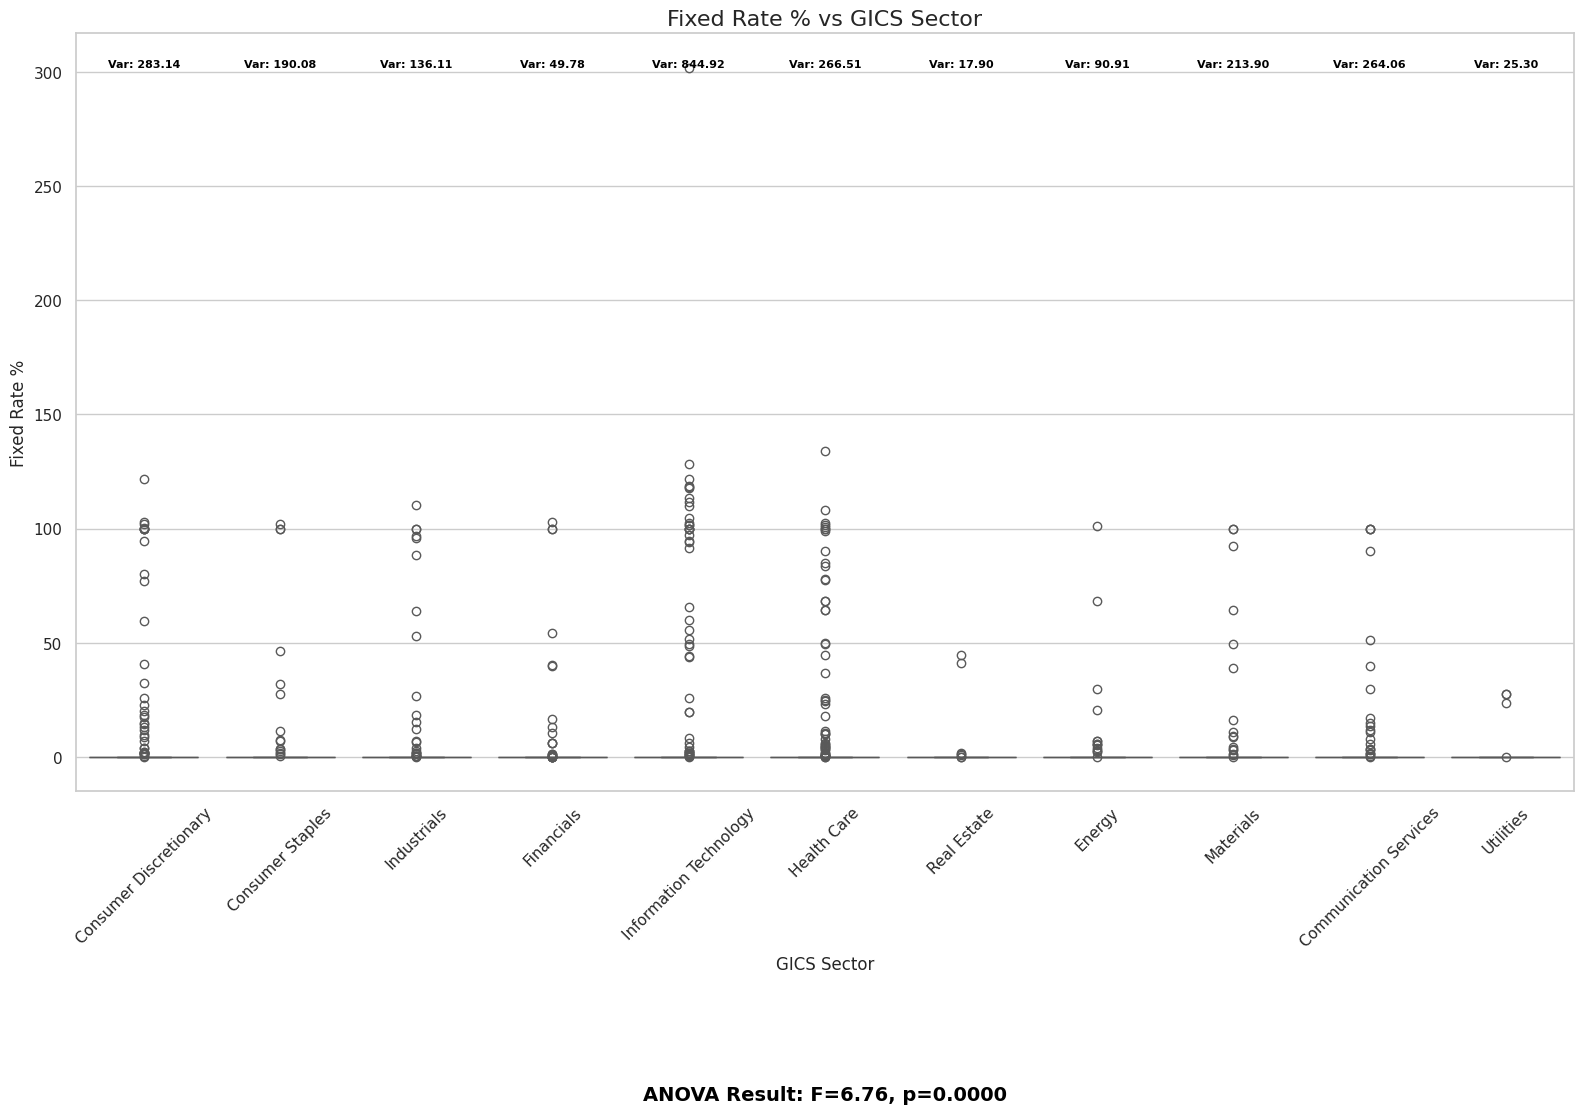

ANOVA Result: F-value = 6.76, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2021")
var_analysis(df21_nonzero, 'Total Zero Coupon Debt')

2024


<ipython-input-87-cbe02c2e3776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GICS Sector Name', y=df[y] / df['Total Debt']*100, data=df, palette='Set2')


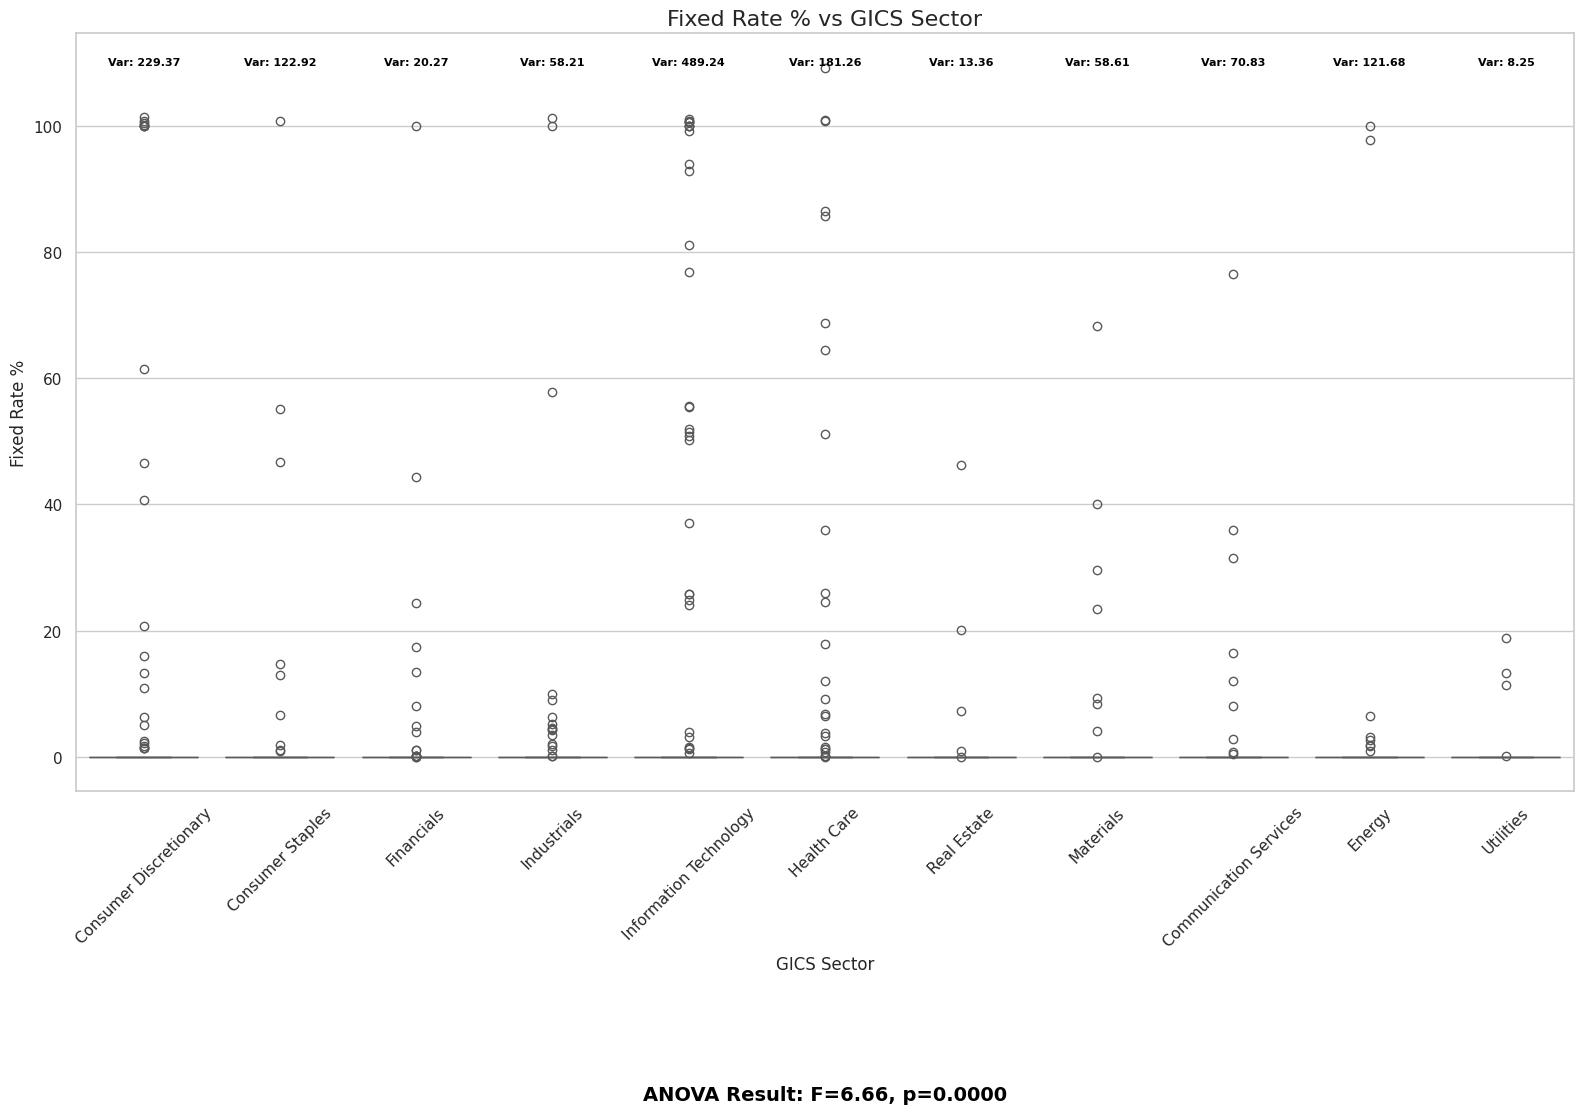

ANOVA Result: F-value = 6.66, p-value = 0.0000
Interpretation: There is a statistically significant difference in the Fixed Rate % across the GICS Sectors (reject the null hypothesis).


In [ ]:
print("2024")
var_analysis(df_nonzero, 'Total Zero Coupon Debt')

#Stepwise regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(X):


    if X.shape[1] <= 1:  # No VIF if only intercept or empty DataFrame
        return pd.Series(dtype=float)

    vif = pd.Series(
        [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
        index=X.columns,
    )
    return vif

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def stepwise(df, variable):

  df = pd.get_dummies(df, columns=["GICS Sector Name"], drop_first=True)

  df = df.astype({col: int for col in df.select_dtypes(include="bool").columns})
  df = df.apply(pd.to_numeric, errors="coerce")

  df['Log Total Assets'] = np.log1p(df['Total Assets'])

  X = df[["Log Total Assets"] + [col for col in df.columns if "GICS Sector Name_" in col]]
  X = sm.add_constant(X)  # Add intercept
  y = (df[variable] / df['Total Debt']) * 100

  threshold_in=0.05
  threshold_out=0.10
  vif_threshold = 10

  initial_features = X.columns.tolist()
  selected_features = []
  while True:
        changed = False

        excluded = list(set(initial_features) - set(selected_features))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            selected_features.append(best_feature)
            changed = True

        # Backward step: Remove the least significant variable in the model
        if selected_features:  # Only proceed if there are features to remove
            model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
            pvalues = model.pvalues.iloc[1:]  # Exclude intercept
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                selected_features.remove(worst_feature)
                changed = True

        if selected_features:
            vif = get_vif(X[selected_features])
            high_vif_features = vif[vif > vif_threshold].index.tolist()
            if high_vif_features:
                selected_features.remove(high_vif_features[0])
                changed = True

        # Break if no features were added or removed in this iteration
        if not changed:
            break
  if selected_features:  # Ensure there are features to model
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
  else:
        model = None  # No model if no features were selected

  return model, selected_features


In [ ]:
m, s = stepwise(df19_nonzero, 'Total Fixed Rate Debt')

print(m.summary())
print(s)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     18.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           5.23e-18
Time:                        21:22:58   Log-Likelihood:                -17106.
No. Observations:                3193   AIC:                         3.422e+04
Df Residuals:                    3187   BIC:                         3.426e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
m, s = stepwise(df21_nonzero, 'Total Fixed Rate Debt')

print(m.summary())
print(s)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.89
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.57e-16
Time:                        21:23:03   Log-Likelihood:                -18483.
No. Observations:                3524   AIC:                         3.698e+04
Df Residuals:                    3518   BIC:                         3.701e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
m, s = stepwise(df_nonzero, 'Total Fixed Rate Debt')

print(m.summary())
print(s)

##Multicollinearity